 # **AMINAT A OLAIYA**

#  **OLA22609267**

## **TOPIC**

# Detection of Alzheimer’s Disease Using Brain Magnetic Resonance Imaging (MRI)


## **CODE OVERVIEW**:

In this study, machine learning models were developed and evaluated to classify Alzheimer's disease using MRI data. The dataset, comprised of grayscale images, which was pre-processed by various step such as gussian smoothing, skull stripping among others before considering feature extractions(HOG,LBP &GLCM)

  Specifically, images were resized to 256x256 pixels for the Support Vector Machine (SVM) classifier, providing a higher resolution that facilitates capturing detailed features, which are critical for SVM's linear decision boundary. Conversely, for the k-Nearest Neighbours (k-NN) and Random Forest classifiers, images were resized to 64x64 pixels. This smaller resolution was chosen to reduce computational complexity and processing time, as these algorithms handle larger datasets more efficiently at lower resolutions.

The dataset was split into training and testing sets with an 80/20 ratio, applying stratified splitting to ensure that each subset proportionately represents the different classes. This approach maintains the integrity of the class distribution across both subsets, which is key for a fair evaluation of model performance and to prevent bias in training and testing.

Three different classifiers were evaluated: SVM, k-NN, and Random Forest. The SVM model was chosen with a linear kernel due to its effectiveness in high-dimensional spaces and its ability to create a clear margin of separation between classes. The k-NN classifier was optimised through grid search to determine the optimal number of neighbours, as this parameter significantly impacts the classifier's performance by influencing the decision boundaries based on local data points. The Random Forest classifier, known for its robustness and ability to handle high-dimensional data, was tuned for several hyperparameters including the number of trees, maximum depth, and minimum samples for splits and leaves. Hyperparameter optimisation for Random Forest was performed to enhance its predictive accuracy by finding the most suitable model.

The performance of the classifiers was assessed based on accuracy,specificity,sensitivity,F1 score.

These results were visualised through a bar plot, providing a clear comparative overview of the classifiers' effectiveness. This evaluation not only highlights the strengths and limitations of each model but also offers valuable insights for selecting appropriate classification algorithms of the analysis.


**Connecting to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING LIBRARIES**

These libraries and modules together enable the building, training, and evaluating machine learning models, process and manipulate images, and data visualisation


In [ ]:
#IMPORTING LIBRARIES
# Importing necessary libraries
import tensorflow as tf  # For  image processing tasks
import os  # For interacting with the operating system
import cv2  # For image processing
import imghdr  # For determining the type of image file
import numpy as np  # For numerical operations, especially with arrays
from matplotlib import pyplot as plt  # For plotting and visualising images
import random  # For generating random numbers and shuffling data
from skimage.feature import hog  # For extracting Histogram of Oriented Gradients (HOG) features
from PIL import Image  # For image processing tasks like opening, manipulating, and saving images


 **Setting GPU memory growth in TensorFlow**

 This allows multiple models to run simultaneously and better manages limited GPU resources, ensuring more efficient and stable usage of the GPU.

In [ ]:
# Avoid Out-Of-Memory (OOM) errors by setting GPU Memory Consumption Growth

# List all physical GPU devices available on the machine
gpus = tf.config.experimental.list_physical_devices('GPU')

# For each GPU available, set the memory growth option
for gpu in gpus:
    # Enable memory growth to allocate GPU memory as needed, avoiding OOM errors
    tf.config.experimental.set_memory_growth(gpu, True)


Identification and list all available GPU devices.

In [ ]:
# GPU Verification

# List all physical GPU devices available on the machine
tf.config.list_physical_devices('GPU')


[]

**DATA CLEANING**

 **Creating a data directory**

  This ensures easy access and management of the dataset for further processing and analysis in the script.

In [ ]:
#CREATING DATA DIRECTORY

alze_dir = r'/content/drive/MyDrive/Alzheimer_s Dataset'

In [ ]:
#verifying the directory
alze_dir

'/content/drive/MyDrive/Alzheimer_s Dataset'

**Verifying each image file's extension**


In [ ]:
#DEFINING IMAGE EXTENSION
image_exts = ['jpeg','jpg', 'bmp', 'png']

**Verifying checking images in a directory**

 This helps maintain a clean dataset by removing invalid or corrupt images.

In [ ]:
# Iterate over each class (subdirectory) in the Alzheimer's dataset directory
for image_class in os.listdir(alze_dir):

    # Iterate over each image in the current class directory
    for image in os.listdir(os.path.join(alze_dir, image_class)):

        # Construct the full path to the image
        image_path = os.path.join(alze_dir, image_class, image)

        try:
            # Read the image using OpenCV
            img = cv2.imread(image_path)

            # Determine the image type based on its file header
            tip = imghdr.what(image_path)

            # Check if the image type is in the list of valid extensions
            if tip not in image_exts:
                # If not, print a message and remove the image from the directory
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)

        except Exception as e:
            # If an exception occurs (e.g., file reading issue), print a message
            print('Issue with image {}'.format(image_path))


Issue with image /content/drive/MyDrive/Alzheimer_s Dataset/train/NonDemented
Issue with image /content/drive/MyDrive/Alzheimer_s Dataset/train/VeryMildDemented
Issue with image /content/drive/MyDrive/Alzheimer_s Dataset/train/MildDemented
Issue with image /content/drive/MyDrive/Alzheimer_s Dataset/train/ModerateDemented
Issue with image /content/drive/MyDrive/Alzheimer_s Dataset/test/ModerateDemented
Issue with image /content/drive/MyDrive/Alzheimer_s Dataset/test/MildDemented
Issue with image /content/drive/MyDrive/Alzheimer_s Dataset/test/VeryMildDemented
Issue with image /content/drive/MyDrive/Alzheimer_s Dataset/test/NonDemented


**Directory validation**

This is to ensure valid folders. If the directory does not exist, it prints an error message indicating that the directory was not found.

In [ ]:
import os  # Import the os module for interacting with the operating system

# Check if the directory exists
if os.path.exists(alze_dir):

    # List contents of the directory and print each item
    for image_class in os.listdir(alze_dir):
        print(image_class)

else:
    # If the directory does not exist, print an error message
    print(f"The directory '{alze_dir}' does not exist.")


train
test
Alzheimier's Disease Detection Dashboard.pdf


In [ ]:
#Building data pipline
data = tf.keras.utils.image_dataset_from_directory( r'/content/drive/MyDrive/Alzheimer_s Dataset')

Found 6400 files belonging to 2 classes.


In [ ]:
#acessing datapile line
data_iterator = data.as_numpy_iterator()

In [ ]:
#accessing datapine line itself
batch = data_iterator.next()

In [ ]:
#representing images and labels
len(batch)

2

In [ ]:
#representing images as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
#representing images as numpy arrays
batch[1]

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int32)

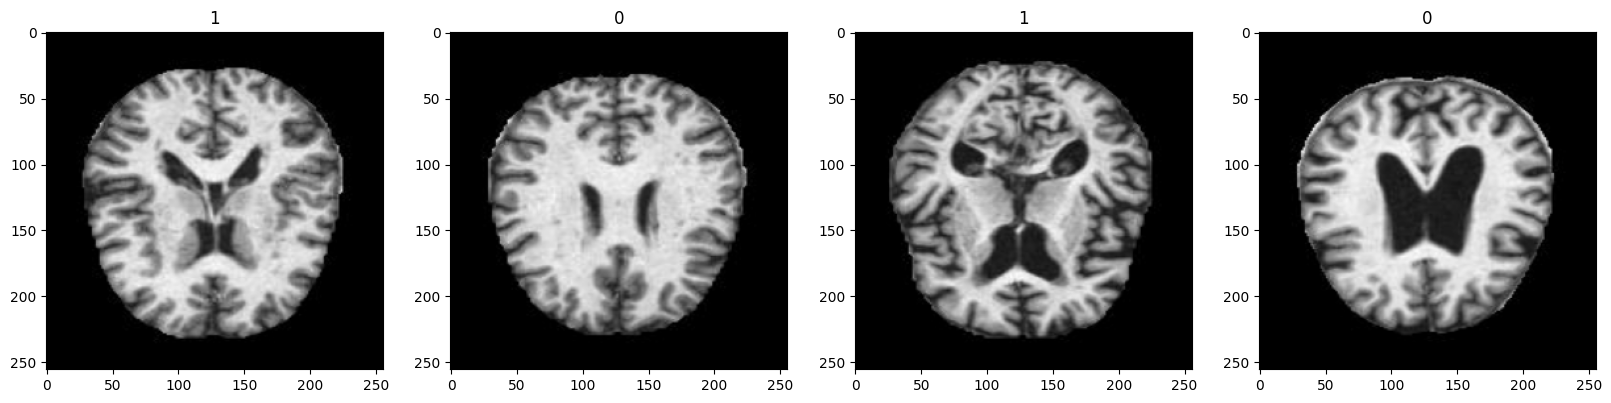

In [ ]:
# Create a figure with a grid of subplots
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Iterate over the first four images in the batch
for idx, img in enumerate(batch[0][:4]):

    # Display the image on the corresponding subplot
    ax[idx].imshow(img.astype(int))

    # Set the title of the subplot to the corresponding label from the batch
    ax[idx].title.set_text(batch[1][idx])


**TRAIN DATASET VISUALISATION**


The code analyses and visualises the distribution of images across different categories within a dataset directory(train). It counts the number of .png and .jpg images in each subfolder, stores these counts in a dictionary, and then generates a bar chart to display the total image count per category. The chart is annotated with the counts and customised with labels and a title for clarity.

This is useful for understanding the distribution of images among different categories, which is important for dataset balancing.

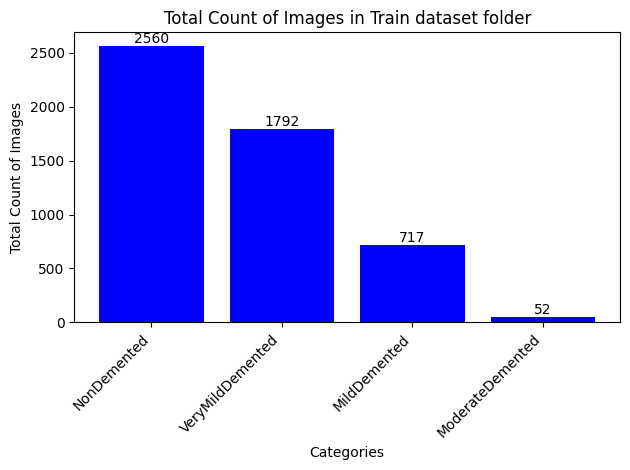

In [ ]:
# Directory containing images
alze_dir = r'/content/drive/MyDrive/Alzheimer_s Dataset/train'

# Dictionary to store the count of images in each subfolder
image_counts = {}

# Loop through subdirectories
for subdir in os.listdir(alze_dir):

    # Construct the full path to the subdirectory
    subdir_path = os.path.join(alze_dir, subdir)

    # Check if the path is indeed a directory
    if os.path.isdir(subdir_path):

        # Count the number of images in the subdirectory with .png or .jpg extensions
        num_images = len([filename for filename in os.listdir(subdir_path) if filename.endswith('.png') or filename.endswith('.jpg')])

        # Store the count of images in the dictionary, with the subdirectory name as the key
        image_counts[subdir] = num_images

# Prepare data for plotting: list of subfolder names and their corresponding image counts
subfolders = list(image_counts.keys())
counts = list(image_counts.values())

# Plot histogram bars with the total count of images in each subfolder
plt.bar(subfolders, counts, color='blue')

# Annotate bars with the total count of images
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

# Set the x-axis label
plt.xlabel('Categories')

# Set the y-axis label
plt.ylabel('Total Count of Images')

# Set the title of the plot
plt.title('Total Count of Images in Train dataset folder')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()



**TEST DATASET VISUALISATION**

The code analyses and visualises the distribution of images across different categories within a dataset directory(test). It counts the number of .png and .jpg images in each subfolder, stores these counts in a dictionary, and then generates a bar chart to display the total image count per category. The chart is annotated with the counts and customized with labels and a title for clarity.

This is useful for understanding the distribution of images among different categories, which is important for dataset balancing.

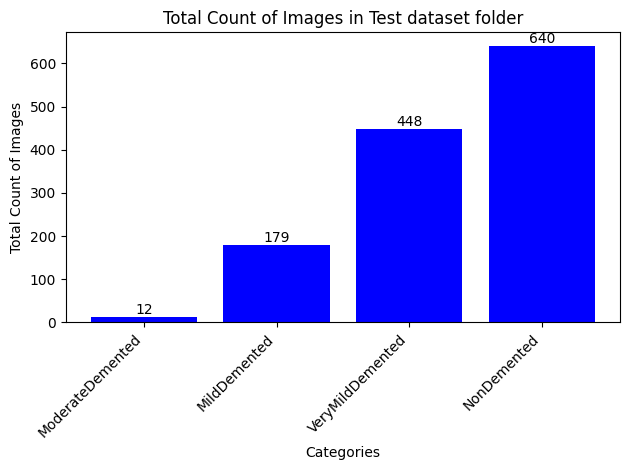

In [ ]:
# Directory containing images
alze_dir = r'/content/drive/MyDrive/Alzheimer_s Dataset/test'

# Dictionary to store the count of images in each subfolder
image_counts = {}

# Loop through subdirectories
for subdir in os.listdir(alze_dir):

    # Construct the full path to the subdirectory
    subdir_path = os.path.join(alze_dir, subdir)

    # Check if the path is a directory
    if os.path.isdir(subdir_path):

        # Count the number of images in the subdirectory with .png or .jpg extensions
        num_images = len([filename for filename in os.listdir(subdir_path) if filename.endswith('.png') or filename.endswith('.jpg')])

        # Store the count of images in the dictionary with the subdirectory name as the key
        image_counts[subdir] = num_images

# Prepare data for plotting: list of subfolder names and their corresponding image counts
subfolders = list(image_counts.keys())
counts = list(image_counts.values())

# Plot histogram bars with the total count of images in each subfolder
plt.bar(subfolders, counts, color='blue')

# Annotate bars with the total count of images
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

# Set the x-axis label
plt.xlabel('Categories')

# Set the y-axis label
plt.ylabel('Total Count of Images')

# Set the title of the plot
plt.title('Total Count of Images in Test dataset folder')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of tick labels
plt.tight_layout()

# Display the plot
plt.show()


**INITIAL DATA SPLITING FROM SOURCE**

This section analyse the distribution of images across the "train" and "test" subfolders within a dataset directory and visualises the results as a pie chart. It counts the number of .png and .jpg images in each specified subfolder, stores these counts in a dictionary, and checks if any images are found. If images are present, it generates a pie chart showing the percentage of images in each subfolder reprsenting the train and test split dataset.

This approach is effective for understanding the relative distribution of images between the training and testing sets, which is essential for evaluating dataset balance and ensuring appropriate model training and validation.

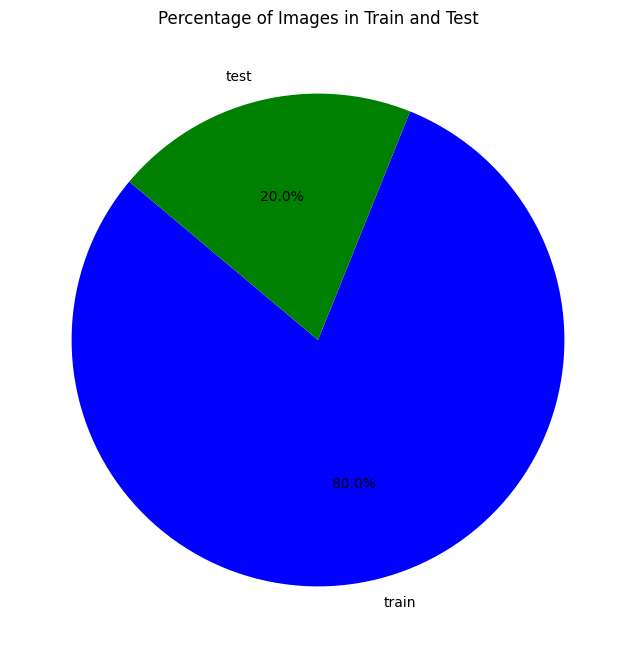

In [ ]:
import os  # Import the os module for interacting with the operating system
import matplotlib.pyplot as plt  # Import Matplotlib's pyplot module for plotting

# Directory containing the dataset
alze_dir = r'/content/drive/MyDrive/Alzheimer_s Dataset'

# Subfolders to consider
subfolders_to_count = ['train', 'test']

# Function to count images in a directory and its subdirectories
def count_images_in_directory(directory):
    count = 0  # Initialise image count to 0
    for root, _, files in os.walk(directory):
        # Count the number of image files (.png or .jpg) in the current directory
        count += len([filename for filename in files if filename.endswith('.png') or filename.endswith('.jpg')])
    return count  # Return the total count of images

# Dictionary to store the count of images in each specified subfolder
image_counts = {}

# Loop through the specified subdirectories
for subdir in subfolders_to_count:

    # Construct the full path to the subdirectory
    subdir_path = os.path.join(alze_dir, subdir)

    # Check if the path is a directory
    if os.path.isdir(subdir_path):

        # Count the number of images in the subdirectory and its subdirectories
        num_images = count_images_in_directory(subdir_path)

        # Store the count of images in the dictionary with the subdirectory name as the key
        image_counts[subdir] = num_images

# Check if there are any images in the specified subdirectories
if len(image_counts) == 0 or all(count == 0 for count in image_counts.values()):
    # If no images are found, print a message
    print("No images found in the specified subdirectories.")
else:
    # Prepare data for plotting: list of subfolder names and their corresponding image counts
    subfolders = list(image_counts.keys())
    counts = list(image_counts.values())

    # Plot pie chart with the total count of images in each specified subfolder
    plt.figure(figsize=(8, 8))  # Create a figure with a specified size
    plt.pie(counts, labels=subfolders, autopct='%1.1f%%', startangle=140, colors=['blue', 'green'])

    # Set the title of the pie chart
    plt.title('Percentage of Images in Train and Test')

    # Display the pie chart
    plt.show()


# DATA PREPROCESSING

This section aim to preprocess and explore all image dataset before feature extraction to increase the efficiency of further process. Image resize, skull striping,gussian smoothing etc were considered

**IMAGE RESIZING**

The code resizes images in a specified input directory and saves the resized images to a designated output directory while preserving the subdirectory structure. It checks if the output directory exists, creates it if necessary, and then iterates through all image files in the input directory, resizing each image to the specified dimensions. The resized images are saved in the corresponding subdirectories within the output directory.

This process justifies preparing a consistent dataset, especially when image dimensions need to be standardised for machine learning tasks. By preserving the subdirectory structure, it maintains the organisation of the dataset, ensuring that the resized images can be used in the same way as the original dataset.

In [ ]:
#IMAGE RESIZING

import os  # Import the os module for interacting with the operating system
from PIL import Image  # Import the Image class from the PIL (Pillow) library for image processing

# Function to resize images in a directory and save them to a new directory
def resize_images_in_directory(input_dir, output_dir, size):
    # Check if the output directory exists, and if not, create it
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Traverse the directory tree rooted at input_dir
    for root, _, files in os.walk(input_dir):
        # Loop through all files in the current directory
        for file in files:
            # Check if the file is an image by its extension (case-insensitive)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                # Construct the full path to the input image
                input_path = os.path.join(root, file)

                # Calculate the relative path of the image with respect to the input directory
                relative_path = os.path.relpath(input_path, input_dir)

                # Construct the full path to the output image, maintaining the directory structure
                output_path = os.path.join(output_dir, relative_path)

                # Determine the directory of the output image
                output_subdir = os.path.dirname(output_path)

                # Check if the output subdirectory exists, and if not, create it
                if not os.path.exists(output_subdir):
                    os.makedirs(output_subdir)

                # Open the image, resize it, and save it to the output directory
                with Image.open(input_path) as img:
                    # Resize the image to the specified size using the LANCZOS filter for high-quality downsampling
                    img_resized = img.resize(size, Image.Resampling.LANCZOS)

                    # Save the resized image to the output path
                    img_resized.save(output_path)

# Define the input directory containing the original images
input_dir = r'C:/content/drive/MyDrive/Alzheimer_s Dataset'

# Define the output directory to save the resized images
output_dir = r'C:/content/drive/MyDrive/Alzheimer_s Dataset Resized'

# Define the new size for the images as a tuple (width, height)
new_size = (256, 256)

# Call the function to resize images and save them in the specified output directory
resize_images_in_directory(input_dir, output_dir, new_size)


In [ ]:
#INSTALL LIBRARY
!pip install Pillow


This code is used to confirm no images was lost during resizing and simplifies the process of loading and preprocessing image data.

In [ ]:
#Building data pipline after resizing
data = tf.keras.utils.image_dataset_from_directory(r'/content/drive/MyDrive/Alzheimer_s Dataset Resized')

Found 6400 files belonging to 2 classes.


**SKULL STRIPPING**

Skull stripping was performed on the brain images,  a common preprocessing step in medical imaging, particularly in MRI analysis. Skull stripping removes non-brain tissues from the image, focusing on the brain itself. The process is applied to all images in a specified input directory, and the results are saved to an output directory, preserving the directory structure.


In [ ]:
import cv2  # Import OpenCV library for computer vision tasks
import numpy as np  # Import NumPy for numerical operations on arrays

# Function to perform skull stripping on an image
def skull_strip_image(image):

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to the grayscale image to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Otsu's thresholding to get a binary image
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Remove small noise by applying morphological opening
    kernel = np.ones((3, 3), np.uint8)  # Define a kernel for morphological operations
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Dilate the image to fill in gaps in the foreground
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Compute the distance transform to find the sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Convert sure_fg to uint8 type
    sure_fg = np.uint8(sure_fg)

    # Find the unknown region by subtracting the sure foreground from the sure background
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Label the connected components in the sure foreground
    _, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is labeled as 1
    markers = markers + 1

    # Mark the unknown region with zero
    markers[unknown == 255] = 0

    # Apply the watershed algorithm to segment the image
    markers = cv2.watershed(image, markers)

    # Mark the boundaries of the watershed algorithm as black
    image[markers == -1] = [0, 0, 0]

    # Return the image with skull stripped (background removed)
    return image

# Function to apply skull stripping to all images in a directory
def apply_skull_stripping(input_dir, output_dir):

    # Check if the output directory exists, and if not, create it
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Traverse the directory tree rooted at input_dir
    for root, _, files in os.walk(input_dir):
        # Loop through all files in the current directory
        for file in files:
            # Check if the file is an image based on its extension (case-insensitive)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                # Construct the full path to the input image
                input_path = os.path.join(root, file)

                # Calculate the relative path of the image with respect to the input directory
                relative_path = os.path.relpath(input_path, input_dir)

                # Construct the full path to the output image, maintaining the directory structure
                output_path = os.path.join(output_dir, relative_path)

                # Determine the directory of the output image
                output_subdir = os.path.dirname(output_path)

                # Check if the output subdirectory exists, and if not, create it
                if not os.path.exists(output_subdir):
                    os.makedirs(output_subdir)

                # Read the input image
                image = cv2.imread(input_path)

                # Check if the image was loaded successfully
                if image is not None:
                    # Perform skull stripping on the image
                    skull_stripped_image = skull_strip_image(image)

                    # Save the skull-stripped image to the output path
                    cv2.imwrite(output_path, skull_stripped_image)

# Define the input directory containing images to be processed
input_dir = r'/content/drive/MyDrive/Alzheimer_s Dataset Resized'

# Define the output directory to save the skull-stripped images
output_dir = r'/content/drive/MyDrive/Alzheimer_s DatasetSkull_Stripped'

# Call the function to apply skull stripping to all images in the input directory
apply_skull_stripping(input_dir, output_dir)


This section visualise all the steps in brian stripping

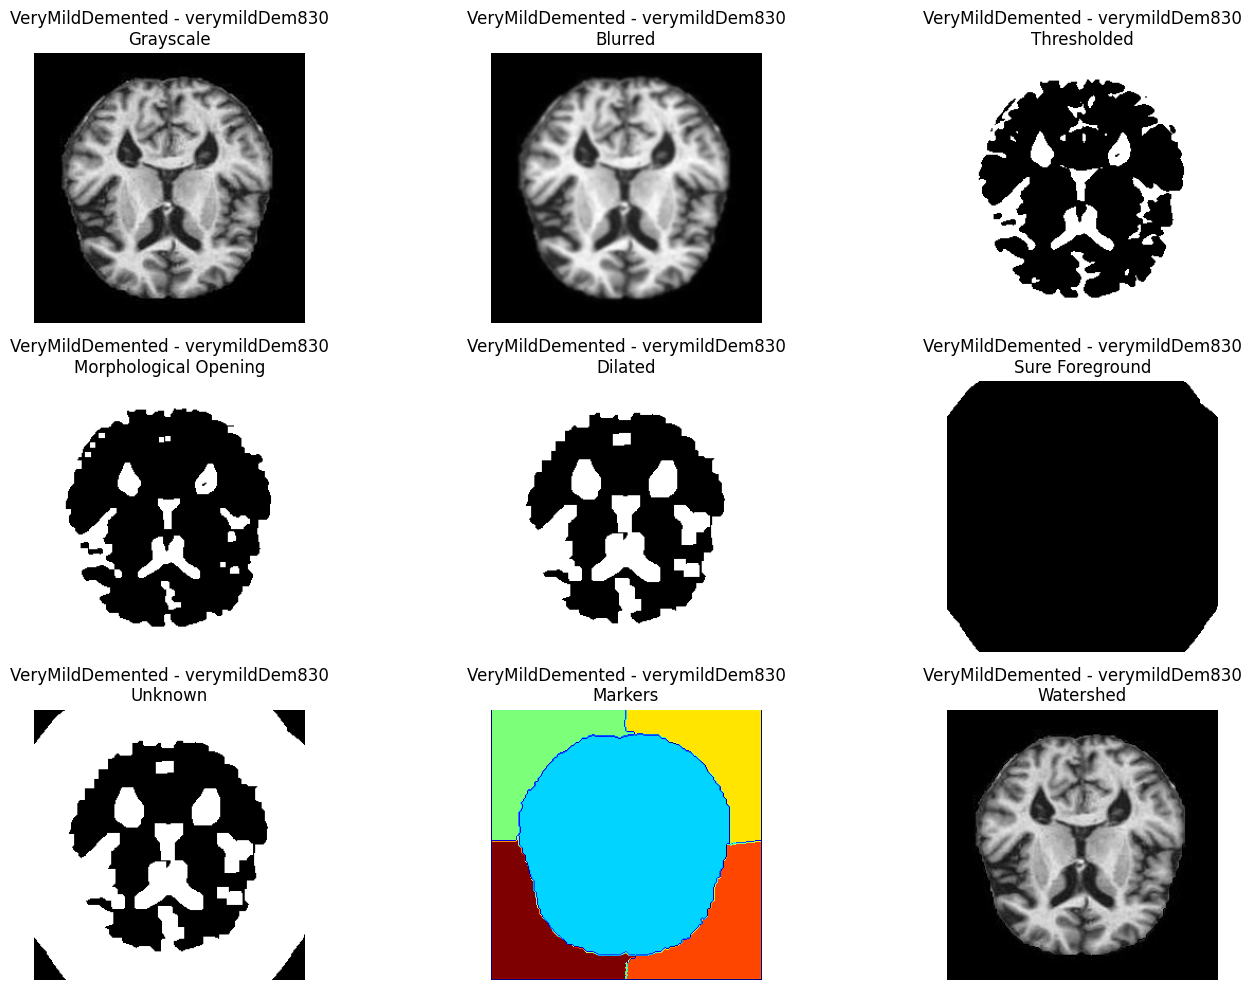

In [ ]:
import cv2  # Import OpenCV for image processing tasks
import numpy as np  # Import NumPy for numerical operations
import os  # Import os for file and directory operations
import matplotlib.pyplot as plt  # Import matplotlib for visualisation

def skull_strip_image(image):
    steps = {}  # Dictionary to store intermediate images for visualisation

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    steps['Grayscale'] = gray  # Save grayscale image to steps

    # Apply Gaussian blur to the grayscale image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    steps['Blurred'] = blurred  # Save blurred image to steps

    # Apply Otsu's thresholding to get a binary image
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    steps['Thresholded'] = thresh  # Save thresholded image to steps

    # Remove small noise using morphological opening
    kernel = np.ones((3, 3), np.uint8)  # Define a 3x3 kernel for morphological operations
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    steps['Morphological Opening'] = opening  # Save the result of morphological opening

    # Dilate the image to fill in gaps in the foreground
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    steps['Dilated'] = sure_bg  # Save dilated image to steps

    # Compute distance transform to find sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    steps['Sure Foreground'] = sure_fg  # Save sure foreground to steps

    # Find the unknown region by subtracting sure foreground from sure background
    sure_fg = np.uint8(sure_fg)  # Convert sure foreground to uint8
    unknown = cv2.subtract(sure_bg, sure_fg)
    steps['Unknown'] = unknown  # Save the unknown region to steps

    # Label connected components in sure foreground
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1  # Add 1 to all labels so that sure background is not 0
    markers[unknown == 255] = 0  # Mark the unknown region with zero
    steps['Markers'] = markers  # Save markers to steps

    # Apply the watershed algorithm to segment the image
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [0, 0, 0]  # Mark the boundaries with black color
    steps['Watershed'] = image  # Save the final watershed result to steps

    return image, steps  # Return the processed image and the dictionary of intermediate steps

def visualize_steps(steps, folder_name, image_label):
    plt.figure(figsize=(15, 10))  # Create a figure for visualisation
    num_steps = len(steps)  # Get the number of steps for subplot arrangement
    grid_size = int(np.ceil(np.sqrt(num_steps)))  # Determine grid size for subplots

    # Plot each step in a separate subplot
    for i, (title, step) in enumerate(steps.items(), 1):
        plt.subplot(grid_size, grid_size, i)  # Create a subplot
        if title == 'Markers':  # If the step is 'Markers'
            plt.imshow(step, cmap='jet')  # Use a color map for better visualization
        else:
            plt.imshow(step, cmap='gray' if len(step.shape) == 2 else None)  # Use grayscale for 2D images
        plt.title(f"{folder_name} - {image_label}\n{title}")  # Set subplot title
        plt.axis('off')  # Hide axes
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()  # Display the plots

def apply_skull_stripping(input_dir, output_dir):

    # Check if the output directory exists, and if not, create it
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Traverse the directory tree rooted at input_dir
    for root, _, files in os.walk(input_dir):
        # Check if the folder name is 'VeryMildDemented' (case-insensitive)
        if 'verymilddemented' in root.lower():
            # Process each file in the current directory
            for file in files:
                # Check if the file is an image based on its extension
                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                    # Construct the full path to the input image
                    input_path = os.path.join(root, file)
                    # Compute the relative path and construct the output path
                    relative_path = os.path.relpath(input_path, input_dir)
                    output_path = os.path.join(output_dir, relative_path)

                    # Determine the directory of the output image
                    output_subdir = os.path.dirname(output_path)
                    # Create the output subdirectory if it does not exist
                    if not os.path.exists(output_subdir):
                        os.makedirs(output_subdir)

                    # Read the input image
                    image = cv2.imread(input_path)
                    # Check if the image was loaded successfully
                    if image is not None:
                        # Perform skull stripping on the image
                        skull_stripped_image, steps = skull_strip_image(image)
                        # Save the skull-stripped image to the output path
                        cv2.imwrite(output_path, skull_stripped_image)

                        # Extract folder name and image label for visualization
                        folder_name = os.path.basename(root)
                        image_label = os.path.splitext(file)[0]

                        # Visualize the processing steps for the first image
                        visualize_steps(steps, folder_name, image_label)
                        return  # Only visualize the first image

# Define the input directory containing images to be processed
input_dir = r'/content/drive/MyDrive/Alzheimer_s Dataset Resized'

# Define the output directory to save the skull-stripped images
output_dir = r'/content/drive/MyDrive/Alzheimer_s DatasetSkull_Stripped'

# Call the function to apply skull stripping to all images in the input directory
apply_skull_stripping(input_dir, output_dir)


In [ ]:
#Building data pipline after resizing
data = tf.keras.utils.image_dataset_from_directory(r'/content/drive/MyDrive/Alzheimer_s DatasetSkull_Stripped')

Found 6400 files belonging to 2 classes.


**GUASSIAN SMOOTHING**

Gussian smoothing was considered for preparing images that need noise reduction before further processing, such as in image segmentation, edge detection. By reducing high-frequency noise, Gaussian smoothing can make certain features more prominent and improve the performance of subsequent image processing tasks

In [ ]:
#GUASSIAN SMOOTHING

import cv2  # Import OpenCV for image processing tasks
import os  # Import OS module for interacting with the file system

# Function to apply Gaussian smoothing to images in a directory
def apply_gaussian_smoothing(input_dir, output_dir, kernel_size=(5, 5)):

    # Check if the output directory exists; if not, create it
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Traverse the directory tree rooted at input_dir
    for root, _, files in os.walk(input_dir):
        # Process each file in the current directory
        for file in files:
            # Check if the file is an image based on its extension
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                # Construct the full path to the input image
                input_path = os.path.join(root, file)
                # Compute the relative path of the image with respect to the input directory
                relative_path = os.path.relpath(input_path, input_dir)
                # Construct the full path to the output image
                output_path = os.path.join(output_dir, relative_path)

                # Determine the directory for the output image
                output_subdir = os.path.dirname(output_path)
                # Create the output subdirectory if it does not exist
                if not os.path.exists(output_subdir):
                    os.makedirs(output_subdir)

                # Read the input image
                image = cv2.imread(input_path)
                # Check if the image was loaded successfully
                if image is not None:
                    # Apply Gaussian blur to the image using the specified kernel size
                    smoothed_image = cv2.GaussianBlur(image, kernel_size, 0)
                    # Save the smoothed image to the output path
                    cv2.imwrite(output_path, smoothed_image)

# Define the input directory containing images to be processed
input_dir = r'/content/drive/MyDrive/Alzheimer_s DatasetSkull_Stripped'

# Define the output directory to save the smoothed images
output_dir = r'/content/drive/MyDrive/Alzheimer_s_Dataset-Smoothed'

# Define the kernel size for Gaussian blur
kernel_size = (5, 5)  # Adjust kernel size as needed

# Call the function to apply Gaussian smoothing to all images in the input directory
apply_gaussian_smoothing(input_dir, output_dir, kernel_size)


In [ ]:
#Building data pipline after resizing
data = tf.keras.utils.image_dataset_from_directory(r'/content/drive/MyDrive/Alzheimer_s_Dataset-Smoothed')

Found 6400 files belonging to 2 classes.


**VISUALISATION OF GUSSIAN SMOOTHED IMAGES**

The visualisation of sample images from guassain smoothing helps ascertain the process application

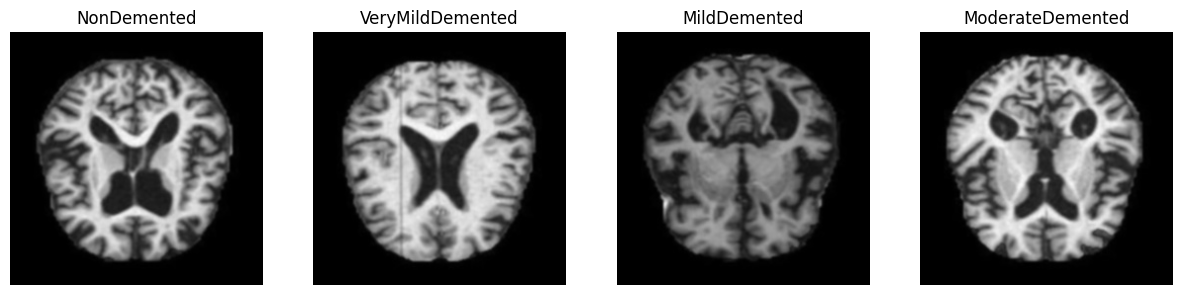

In [ ]:
#VISUALISATION OF GUSSIAN SMOOTHED IMAGES

import os  # Import OS module for file and directory operations
import cv2  # Import OpenCV for image processing tasks
import matplotlib.pyplot as plt  # Import matplotlib for displaying images

# Function to display sample images from the 'train' folder within the specified output directory
def display_sample_images_from_train_folder(output_dir):
    # Define the path to the 'train' folder inside the output directory
    train_dir = os.path.join(output_dir, "train")

    # Check if the 'train' directory exists
    if not os.path.exists(train_dir):
        print(f"The directory {train_dir} does not exist.")  # Print an error message if the directory is missing
        return  # Exit the function if the directory is not found

    # Lists to store paths of images and their respective folder names
    folder_images = []
    folder_names = []

    # Traverse the directory tree rooted at train_dir
    for root, dirs, files in os.walk(train_dir):
        added_image = False  # Flag to check if an image has been added from the current folder
        # Process each file in the current directory
        for file in files:
            # Check if the file is an image based on its extension
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                # Add the image path to the list
                folder_images.append(os.path.join(root, file))
                # Add the name of the folder (parent directory) to the list
                folder_names.append(os.path.basename(root))
                added_image = True  # Set the flag indicating an image has been added
                break  # Exit the loop to only take the first image from this folder
        if added_image:
            continue  # Continue to the next directory if an image was added

    # Display the images using matplotlib
    num_samples = len(folder_images)  # Determine the number of sample images to display
    plt.figure(figsize=(15, 10))  # Create a figure with a specific size
    for i, image_path in enumerate(folder_images, 1):
        # Read the image from the path
        image = cv2.imread(image_path)
        # Convert the image from BGR to RGB for correct color representation in matplotlib
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Create a subplot for each image
        plt.subplot(1, num_samples, i)
        plt.imshow(image)  # Display the image
        plt.title(folder_names[i-1])  # Set the title of the subplot to the folder name
        plt.axis('off')  # Hide the axis for a cleaner display

    plt.show()  # Display the figure with all the images

# Define the path to the output directory containing the 'train' folder
output_dir = r'/content/drive/MyDrive/Alzheimer_s_Dataset-Smoothed'
# Call the function to display sample images from the 'train' folder
display_sample_images_from_train_folder(output_dir)


**MASKED**

Masking is considered by applying a binary mask, created using Otsu's thresholding, and then saves the masked images to an output directory. The masked images highlight the regions of interest by setting irrelevant parts of the image to zero (black).

In [ ]:
# MASK

import os  # Import the OS module for interacting with the file system
import numpy as np  # Import NumPy for numerical operations, particularly with arrays
from skimage import io, filters  # Import image I/O and filtering functions from the scikit-image library

# Step 1: Define the function to apply masking
def apply_mask(image):
    # Compute Otsu's threshold value for the image
    threshold = filters.threshold_otsu(image)
    # Create a binary mask where pixels above the threshold are True
    mask = image > threshold
    return mask  # Return the binary mask

# Step 2: Process all images in the input directory and save the masked images
def process_images(input_dir, output_dir):
    # Check if the output directory exists, create it if it doesn't
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Traverse through the directory tree rooted at input_dir
    for root, _, files in os.walk(input_dir):
        # Iterate over each file in the current directory
        for file in files:
            # Check if the file is an image based on its extension
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                try:
                    # Construct the full path to the file
                    file_path = os.path.join(root, file)

                    # Load the image as grayscale
                    image = io.imread(file_path, as_gray=True)

                    # Apply the masking function to the image
                    mask = apply_mask(image)
                    # Apply the mask to the image (element-wise multiplication)
                    masked_image = image * mask

                    # Compute the relative path of the file with respect to the input directory
                    relative_path = os.path.relpath(file_path, input_dir)
                    # Construct the output path for the masked image
                    output_path = os.path.join(output_dir, relative_path)

                    # Ensure that the output directory exists
                    os.makedirs(os.path.dirname(output_path), exist_ok=True)

                    # Save the masked image to the output path, scaling the values to the range [0, 255]
                    io.imsave(output_path, (masked_image * 255).astype(np.uint8))

                except Exception as e:
                    # If an exception occurs, it is caught and ignored
                    pass

# Define input and output directories
input_dir = r'/content/drive/MyDrive/Alzheimer_s_Dataset-Smoothed'  # Path to the input directory containing images
output_dir = r'/content/drive/MyDrive/Alzheimer_s_Datasetmasked'  # Path to the output directory to save masked images

# Process the images by calling the process_images function
process_images(input_dir, output_dir)


**VISUALISATION OF MASK**

This help to ascertain the mask has been applied to the images

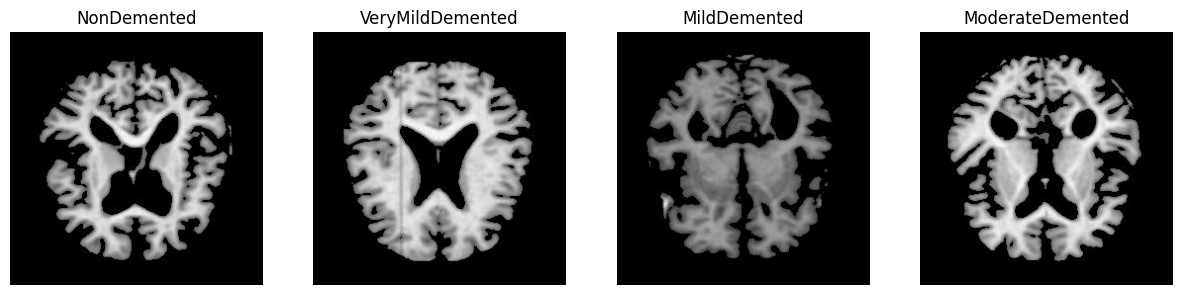

In [ ]:
#VISUALISATION OF MASK

import os  # Import the OS module for file system operations
import cv2  # Import OpenCV for image processing
import matplotlib.pyplot as plt  # Import matplotlib for plotting images

# Function to display sample images from the "train" folder within the output directory
def display_sample_images_from_train_folder(output_dir):
    # Construct the path to the 'train' directory within the output directory
    train_dir = os.path.join(output_dir, "train")

    # Check if the 'train' directory exists
    if not os.path.exists(train_dir):
        print(f"The directory {train_dir} does not exist.")  # Print an error message if it does not exist
        return  # Exit the function if the directory is not found

    # Initialize lists to store paths to images and their corresponding folder names
    folder_images = []
    folder_names = []

    # Walk through the directory tree rooted at 'train_dir'
    for root, dirs, files in os.walk(train_dir):
        added_image = False  # Flag to track if an image has been added from the current directory
        for file in files:
            # Check if the file is an image based on its extension
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                folder_images.append(os.path.join(root, file))  # Add the image path to the list
                folder_names.append(os.path.basename(root))  # Add the folder name to the list
                added_image = True  # Set the flag to True indicating an image has been added
                break  # Only take the first image from this folder
        if added_image:
            continue  # Skip to the next directory if an image was added

    # Display the images using matplotlib
    num_samples = len(folder_images)  # Get the number of images to display
    plt.figure(figsize=(15, 10))  # Create a figure with specified size for displaying images
    for i, image_path in enumerate(folder_images, 1):
        image = cv2.imread(image_path)  # Read the image from the file path
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB for matplotlib
        plt.subplot(1, num_samples, i)  # Create a subplot for each image
        plt.imshow(image)  # Display the image
        plt.title(folder_names[i-1])  # Set the title of the subplot to the folder name
        plt.axis('off')  # Turn off the axis labels and ticks

    plt.show()  # Show the plot with the images

# Define the path to the directory containing masked images
output_dir = r'/content/drive/MyDrive/Alzheimer_s_Datasetmasked'

# Call the function to display sample images from the 'train' folder within the output directory
display_sample_images_from_train_folder(output_dir)


**SEGEMENTATION**

Tissue segmentation was performed on previously masked images, and then saves the segmented tissues as color-coded images. The segmentation distinguishes different tissue types, such as gray matter (GM), white matter (WM), and cerebrospinal fluid (CSF), using a Gaussian Mixture Model (GMM) and morphological operations for refinement. The use of color-coding enhances the visualisation of segmented tissues, making it easier to identify and analyse specific regions of the brain.

In [ ]:
#SEGEMENTATION

import os  # Import the OS module for file and directory operations
import numpy as np  # Import NumPy for numerical operations and array handling
from skimage import io, img_as_float  # Import skimage functions for image I/O and conversion
from skimage.filters import gaussian  # Import Gaussian filter for image denoising
from skimage.restoration import estimate_sigma  # Import function to estimate noise sigma
from sklearn.mixture import GaussianMixture  # Import Gaussian Mixture Model for clustering
from skimage.morphology import closing, opening, disk  # Import morphological operations for post-processing

# Define directories
input_dir = '/content/drive/MyDrive/Alzheimer_s_Datasetmasked'  # Path to the directory containing masked images
output_dir = '/content/drive/MyDrive/Alzheimer_s_Segmentation_Output'  # Path to the directory where segmented images will be saved

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)  # Create the output directory

# Function to preprocess and segment tissues
def tissue_segmentation(image_path):
    # Read the image
    image = io.imread(image_path)  # Load the image from the file path
    image = img_as_float(image)  # Convert the image to float (necessary for filtering)

    # Handle grayscale and RGB images
    if len(image.shape) == 2:  # Check if the image is grayscale
        image_denoised = gaussian(image, sigma=1)  # Apply Gaussian blur to grayscale image
    else:  # Image is RGB
        # Estimate the noise level for each color channel
        sigma_est = np.mean([estimate_sigma(image[:, :, i]) for i in range(image.shape[2])])
        # Apply Gaussian blur to each color channel separately
        image_denoised = np.stack([gaussian(image[:, :, i], sigma=sigma_est) for i in range(image.shape[2])], axis=-1)

    # Feature extraction: use the pixel intensities directly
    pixels = image_denoised.reshape(-1, 3 if image_denoised.ndim == 3 else 1)  # Reshape image for clustering

    # Gaussian Mixture Model for clustering into 3 tissues
    gmm = GaussianMixture(n_components=3, random_state=0)  # Initialize GMM with 3 components
    gmm.fit(pixels)  # Fit the GMM to the pixel intensities
    segmented = gmm.predict(pixels).reshape(image_denoised.shape[:2])  # Predict cluster labels and reshape to image dimensions

    # Post-processing: morphological operations to refine the segmentation
    segmented_refined = opening(closing(segmented, disk(2)), disk(2))  # Apply closing and opening operations to refine the segmentation

    return segmented_refined  # Return the refined segmented image

# Function to create a single color-coded image for all tissue types
def create_color_image(segmented_image):
    # Initialize a color image (RGB) for the combined segmentation
    color_image = np.zeros((*segmented_image.shape, 3), dtype=np.uint8)  # Create an empty RGB image

    # Define colors (RGB)
    colors = {
        0: [255, 0, 0],  # Red for GM (Gray Matter)
        1: [0, 255, 0],  # Green for WM (White Matter)
        2: [0, 0, 255]   # Blue for CSF (Cerebrospinal Fluid)
    }

    # Map segmented labels to colors
    for label, color in colors.items():
        color_image[segmented_image == label] = color  # Assign colors to segmented regions based on labels

    return color_image  # Return the color-coded image

# Function to save the combined color-coded image
def save_segmented_image(input_path, output_path):
    # Perform segmentation
    segmented_image = tissue_segmentation(input_path)  # Get the segmented image

    # Create the combined color-coded image
    color_image = create_color_image(segmented_image)  # Convert segmented image to color-coded image

    # Create output file path
    base_filename = os.path.splitext(os.path.basename(input_path))[0]  # Get the base filename without extension
    output_file_path = os.path.join(output_path, f"{base_filename}_segmentation.jpeg")  # Construct the output file path

    # Save the combined color-coded image
    io.imsave(output_file_path, color_image)  # Save the color image to the output path

# Process each image in the directory
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith('.jpeg') or file.lower().endswith('.jpg'):  # Check for JPEG or JPG files
            input_file_path = os.path.join(root, file)  # Construct the full path to the input file

            # Create the corresponding output path
            relative_path = os.path.relpath(root, input_dir)  # Get the relative path of the current directory
            output_folder_path = os.path.join(output_dir, relative_path)  # Construct the output directory path

            # Ensure the output directory exists
            os.makedirs(output_folder_path, exist_ok=True)  # Create the output directory if it doesn't exist

            # Save the combined color-coded image
            save_segmented_image(input_file_path, output_folder_path)  # Perform segmentation and save the result


**VISUALISATION OF SEGEMENTATION**

Sample images were visualised to see the segementation effect

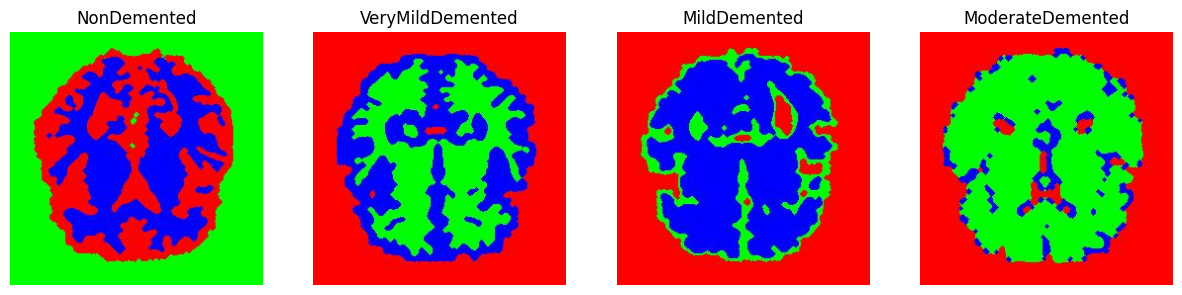

In [ ]:
#VISUALISATION OF SEGEMENTATION

import os  # Import the OS module for file and directory operations
import cv2  # Import OpenCV for image processing
import matplotlib.pyplot as plt  # Import Matplotlib for plotting images

def display_sample_images_from_train_folder(output_dir):
    # Define the directory path for training images
    train_dir = os.path.join(output_dir, "train")  # Create the full path to the "train" subdirectory
    if not os.path.exists(train_dir):
        # Check if the "train" directory exists
        print(f"The directory {train_dir} does not exist.")  # Print a message if the directory is not found
        return  # Exit the function if the directory does not exist

    folder_images = []  # Initialize a list to store paths to images
    folder_names = []  # Initialize a list to store folder names

    # Walk through the directory tree
    for root, dirs, files in os.walk(train_dir):
        added_image = False  # Flag to check if an image has been added
        for file in files:
            # Check for image file extensions
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                folder_images.append(os.path.join(root, file))  # Add image path to the list
                folder_names.append(os.path.basename(root))  # Add folder name to the list
                added_image = True  # Set the flag to True indicating an image has been added
                break  # Only take the first image from this folder
        if added_image:
            continue  # Continue to the next directory

    # Display the images
    num_samples = len(folder_images)  # Get the number of sample images
    plt.figure(figsize=(15, 10))  # Create a new figure with specified size for plotting
    for i, image_path in enumerate(folder_images, 1):
        image = cv2.imread(image_path)  # Read the image using OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
        plt.subplot(1, num_samples, i)  # Create a subplot for each image
        plt.imshow(image)  # Display the image in the subplot
        plt.title(folder_names[i-1])  # Set the title of the subplot to the folder name
        plt.axis('off')  # Turn off the axis for better visualization

    plt.show()  # Show the plotted images

# Define the output directory path
output_dir = r'/content/drive/MyDrive/Alzheimer_s_Segmentation_Output'
display_sample_images_from_train_folder(output_dir)  # Call the function to display sample images


**SMOOTHING**

 Smoothing is reapplied to a batch of images using Gaussian filtering, which is useful for reducing noise and detail in images. By systematically processing each image and saving the results in a structured manner.

In [ ]:
#SMOOTHING

import os  # Import the OS module for file and directory operations
import numpy as np  # Import NumPy for numerical operations and array manipulations
from skimage import io, img_as_float  # Import skimage functions for reading images and converting image types
from skimage.filters import gaussian  # Import the Gaussian filter function from skimage.filters

# Define directories
input_dir = '/content/drive/MyDrive/Alzheimer_s_Segmentation_Output'  # Set the path to the input directory containing segmented images
output_dir = '/content/drive/MyDrive/Alzheimer_s_Smoothing_Output'  # Set the path to the output directory where smoothed images will be saved

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)  # Create the output directory, including any intermediate directories if they don't exist

# Function to perform smoothing
def smooth_image(image_path, output_path, sigma=1):
    # Read the image
    image = io.imread(image_path)  # Read the image from the specified path
    image = img_as_float(image)  # Convert the image to a float format for processing

    # Check if the image is grayscale or RGB
    if len(image.shape) == 2:  # If the image has only two dimensions (grayscale)
        smoothed_image = gaussian(image, sigma=sigma)  # Apply Gaussian smoothing
    else:  # If the image has three dimensions (RGB)
        smoothed_image = np.zeros_like(image)  # Initialize an empty array with the same shape as the input image
        for i in range(image.shape[2]):  # Loop over the color channels
            smoothed_image[:, :, i] = gaussian(image[:, :, i], sigma=sigma)  # Apply Gaussian smoothing to each channel

    # Save the smoothed image
    base_filename = os.path.splitext(os.path.basename(image_path))[0]  # Get the base filename without extension
    output_file_path = os.path.join(output_path, f"{base_filename}_smoothed.jpeg")  # Define the path for saving the smoothed image
    io.imsave(output_file_path, (smoothed_image * 255).astype(np.uint8))  # Save the smoothed image, scaling it back to 0-255 range

# Process each image in the directory
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith(('.jpeg', '.jpg', '.png')):  # Check if the file is an image with supported extensions
            input_file_path = os.path.join(root, file)  # Construct the full path to the input image file

            # Create the corresponding output path
            relative_path = os.path.relpath(root, input_dir)  # Get the relative path of the current directory from the input directory
            output_folder_path = os.path.join(output_dir, relative_path)  # Define the path for saving the output image

            # Ensure the output directory exists
            os.makedirs(output_folder_path, exist_ok=True)  # Create the output directory, including any intermediate directories if they don't exist

            # Smooth and save the image
            smooth_image(input_file_path, output_folder_path)  # Call the function to smooth the image and save it


**VISUALISATION OF SMOOTHING**

SMOOTHED IMAGES WERE VISUALISED TO ARCERTAIN THE EFFECT.

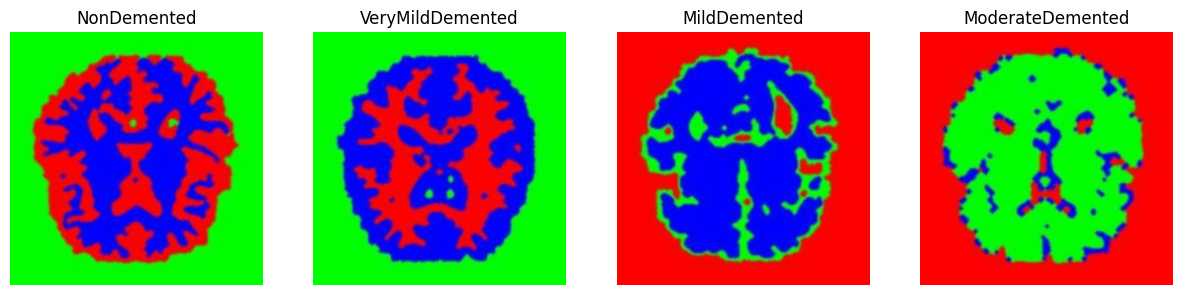

In [ ]:
#VISUALISATION OF SMOOTHING

def display_sample_images_from_train_folder(output_dir):
    # Define the path to the 'train' directory inside the output directory
    train_dir = os.path.join(output_dir, "train")

    # Check if the 'train' directory exists
    if not os.path.exists(train_dir):
        print(f"The directory {train_dir} does not exist.")  # Print an error message if the directory is not found
        return  # Exit the function if the directory does not exist

    folder_images = []  # Initialize a list to store paths of the images to display
    folder_names = []  # Initialize a list to store the names of folders (or classes) corresponding to images

    # Walk through the directory tree starting from 'train_dir'
    for root, dirs, files in os.walk(train_dir):
        added_image = False  # Flag to indicate if an image has been added from the current folder
        # Iterate through the files in the current directory
        for file in files:
            # Check if the file is an image with supported extensions
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                folder_images.append(os.path.join(root, file))  # Add the image file path to the list
                folder_names.append(os.path.basename(root))  # Add the name of the current folder (class) to the list
                added_image = True  # Set the flag to True indicating an image has been added
                break  # Break the loop after finding the first image in this folder
        if added_image:
            continue  # Move to the next directory if an image was added from the current directory

    # Display the images
    num_samples = len(folder_images)  # Get the number of images to display
    plt.figure(figsize=(15, 10))  # Create a new figure with specified size for displaying images

    # Loop through each image path and its index
    for i, image_path in enumerate(folder_images, 1):
        image = cv2.imread(image_path)  # Read the image using OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the image from BGR (OpenCV format) to RGB (matplotlib format)
        plt.subplot(1, num_samples, i)  # Create a subplot in a single row with 'num_samples' columns
        plt.imshow(image)  # Display the image in the subplot
        plt.title(folder_names[i-1])  # Set the title of the subplot to the folder name (class) of the image
        plt.axis('off')  # Hide the axis of the subplot

    plt.show()  # Display the figure with all the images

# Define the path to the output directory
output_dir = r'/content/drive/MyDrive/Alzheimer_s_Smoothing_Output'
display_sample_images_from_train_folder(output_dir)  # Call the function to display sample images from the 'train' folder


**GUSSIAN SMOOTHING**

Gaussian smoothing was reperformed  on the segmented images and the images were converted to grayscale

In [ ]:
#GUSSIAN SMOOTHING

import os  # Import the 'os' module for interacting with the operating system (e.g., file and directory operations)
import numpy as np  # Import 'numpy' for numerical operations and array handling
from skimage import io, img_as_float, color  # Import 'io' for image I/O, 'img_as_float' to convert images to float format, 'color' for color space transformations
from skimage.filters import gaussian  # Import 'gaussian' filter for smoothing images

# Define directories
input_dir = '/content/drive/MyDrive/Alzheimer_s_Segmentation_Output'  # Directory containing input images
output_dir = '/content/drive/MyDrive/Alzheimer_s_Smoothinggrayscale_Output'  # Directory to save processed images

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):  # Check if the output directory does not exist
    os.makedirs(output_dir)  # Create the output directory

# Function to perform smoothing
def smooth_image(image_path, output_path, sigma=1):  # Define a function to apply Gaussian smoothing to an image
    # Read the image
    image = io.imread(image_path)  # Read the image from the file path
    image = img_as_float(image)  # Convert image to floating-point format for processing

    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:  # Check if the image is RGB (has 3 channels)
        image = color.rgb2gray(image)  # Convert RGB image to grayscale

    # Apply Gaussian smoothing
    smoothed_image = gaussian(image, sigma=sigma)  # Apply Gaussian filter with specified sigma to smooth the image

    # Save the smoothed grayscale image
    base_filename = os.path.splitext(os.path.basename(image_path))[0]  # Extract base filename without extension
    output_file_path = os.path.join(output_path, f"{base_filename}_smoothed.jpeg")  # Construct the output file path
    io.imsave(output_file_path, (smoothed_image * 255).astype(np.uint8))  # Save the smoothed image as JPEG, scaling pixel values to [0, 255]

# Process each image in the directory
for root, dirs, files in os.walk(input_dir):  # Walk through the directory tree starting from 'input_dir'
    for file in files:  # Iterate over each file in the current directory
        if file.lower().endswith(('.jpeg', '.jpg', '.png')):  # Check if the file is an image with supported extensions
            input_file_path = os.path.join(root, file)  # Construct the full path to the input file

            # Create the corresponding output path
            relative_path = os.path.relpath(root, input_dir)  # Get the relative path of the current directory from the input directory
            output_folder_path = os.path.join(output_dir, relative_path)  # Construct the output directory path

            # Ensure the output directory exists
            os.makedirs(output_folder_path, exist_ok=True)  # Create the output directory if it doesn't already exist

            # Smooth and save the image
            smooth_image(input_file_path, output_folder_path)  # Apply smoothing to the image and save the result


**VISUALISATION OF SMOOTHED SEGEMENTED IMAGAES**

TO AFFIRM THE EFFECT OF THE SMOOTHING SAMPLE IMAGES WERE VISULAISED.



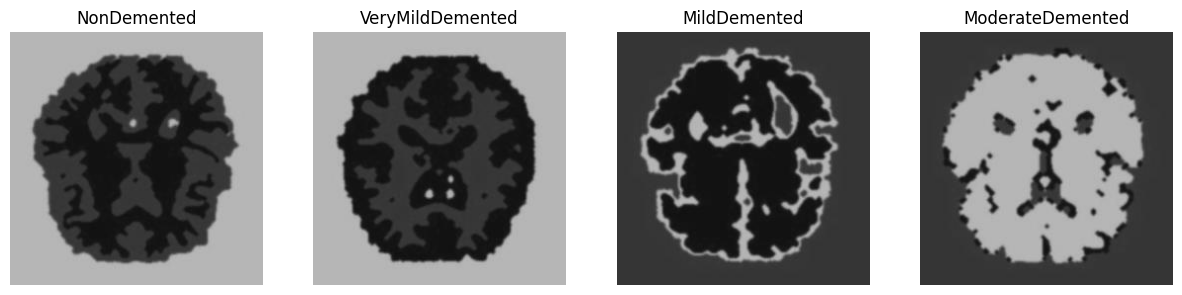

In [ ]:
#VISUALISATION OF SMOOTHED SEGEMENTED IMAGAES

import os  # Import the 'os' module for interacting with the operating system
import cv2  # Import OpenCV for image reading and color conversion
import matplotlib.pyplot as plt  # Import matplotlib for plotting images

# Function to display sample images from the specified directory
def display_sample_images_from_train_folder(output_dir):
    # Construct the path to the 'train' directory inside the output directory
    train_dir = os.path.join(output_dir, "train")

    # Check if the 'train' directory exists
    if not os.path.exists(train_dir):
        print(f"The directory {train_dir} does not exist.")  # Print an error message if the directory does not exist
        return  # Exit the function if the directory does not exist

    folder_images = []  # List to store paths of images
    folder_names = []  # List to store names of folders

    # Walk through the directory tree starting from 'train_dir'
    for root, dirs, files in os.walk(train_dir):
        added_image = False  # Flag to indicate if an image has been added from the current folder
        # Iterate over each file in the current directory
        for file in files:
            # Check if the file has a valid image extension
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                folder_images.append(os.path.join(root, file))  # Add the image path to the list
                folder_names.append(os.path.basename(root))  # Add the name of the current folder to the list
                added_image = True  # Set the flag to True indicating an image was added
                break  # Break the loop to only take the first image from this folder
        if added_image:
            continue  # Continue to the next directory

    # Display the images
    num_samples = len(folder_images)  # Get the number of images to display
    plt.figure(figsize=(15, 10))  # Create a new figure for displaying images

    # Iterate over the collected image paths
    for i, image_path in enumerate(folder_images, 1):
        image = cv2.imread(image_path)  # Read the image from the file path
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR image to RGB for correct color display with matplotlib
        plt.subplot(1, num_samples, i)  # Create a subplot for each image
        plt.imshow(image)  # Display the image
        plt.title(folder_names[i-1])  # Set the title of the subplot to the folder name
        plt.axis('off')  # Hide the axis

    plt.show()  # Show the figure with all subplots

# Define the output directory containing the images
output_dir = r'/content/drive/MyDrive/Alzheimer_s_Smoothinggrayscale_Output'
# Call the function to display sample images from the output directory
display_sample_images_from_train_folder(output_dir)


**THRESHOLDING, BINARY IMAGE ROI**

To ensure accurate and effective image segmentation perfect for the specific task needs thresholding was reapplied.

In [ ]:
#THRESHOLDING, BINARY IMAGE ROI

import os  # Import the 'os' module for interacting with the operating system
import numpy as np  # Import numpy for numerical operations and array manipulations
from skimage import io, img_as_float, color  # Import functions from scikit-image for image input/output, conversion, and color manipulation
from skimage.filters import threshold_otsu  # Import the Otsu's thresholding method from scikit-image
from skimage import img_as_ubyte  # Import function to convert image to 8-bit unsigned byte format

# Define directories
input_dir = '/content/drive/MyDrive/Alzheimer_s_Smoothinggrayscale_Output'  # Directory containing the input images
output_dir = '/content/drive/MyDrive/Alzheimer_s_Threshold_ROI_Output'  # Directory where the thresholded images will be saved

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):  # Check if the output directory does not exist
    os.makedirs(output_dir)  # Create the output directory

# Function to perform thresholding
def threshold_image(image_path, output_path):
    # Read the image
    image = io.imread(image_path)  # Load the image from the file path
    image = img_as_float(image)  # Convert the image to floating-point format for processing

    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:  # Check if the image is RGB (i.e., has 3 channels)
        image = color.rgb2gray(image)  # Convert the RGB image to grayscale

    # Apply thresholding
    threshold = threshold_otsu(image)  # Compute the Otsu's threshold value for binarization
    binary_image = image > threshold  # Create a binary image where pixels above the threshold are set to True (1) and others are False (0)

    # Save the binary image
    base_filename = os.path.splitext(os.path.basename(image_path))[0]  # Extract the base filename without extension
    output_file_path = os.path.join(output_path, f"{base_filename}_binary.jpeg")  # Create the full output file path with a "_binary" suffix
    io.imsave(output_file_path, img_as_ubyte(binary_image))  # Save the binary image as an 8-bit unsigned byte JPEG

# Process each image in the directory
for root, dirs, files in os.walk(input_dir):  # Walk through the directory tree starting from the input directory
    for file in files:  # Iterate over each file in the current directory
        if file.lower().endswith(('.jpeg', '.jpg', '.png')):  # Check if the file is an image with one of the specified extensions
            input_file_path = os.path.join(root, file)  # Construct the full file path of the input image

            # Create the corresponding output path
            relative_path = os.path.relpath(root, input_dir)  # Compute the relative path of the current directory from the input directory
            output_folder_path = os.path.join(output_dir, relative_path)  # Construct the corresponding output directory path

            # Ensure the output directory exists
            os.makedirs(output_folder_path, exist_ok=True)  # Create the output directory if it does not exist

            # Threshold and save the image
            threshold_image(input_file_path, output_folder_path)  # Apply thresholding to the image and save the result


**VISUALISATION OF THRESHOLDING, BINARY IMAGE ROI**

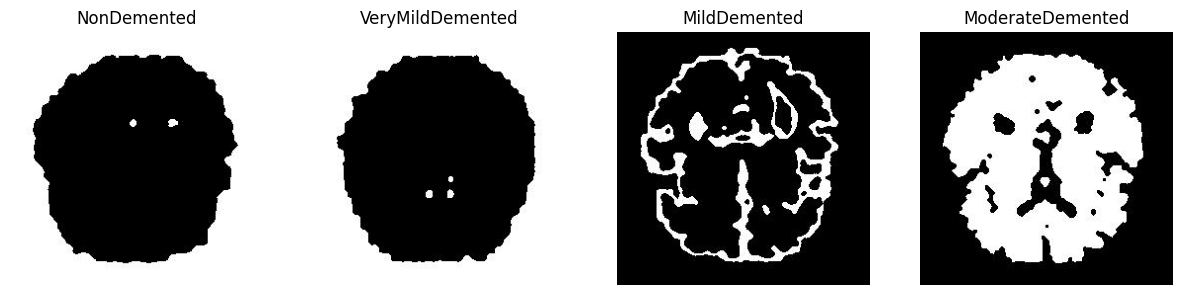

In [ ]:
#VISUALISATION OF THRESHOLDING, BINARY IMAGE ROI

def display_sample_images_from_train_folder(output_dir):
    # Define the directory path where the images are stored
    train_dir = os.path.join(output_dir, "train")

    # Check if the directory exists
    if not os.path.exists(train_dir):
        # Print a message if the directory does not exist
        print(f"The directory {train_dir} does not exist.")
        # Exit the function if the directory is not found
        return

    # Lists to store the paths of images and their corresponding folder names
    folder_images = []
    folder_names = []

    # Traverse the directory tree starting from 'train_dir'
    for root, dirs, files in os.walk(train_dir):
        # Flag to check if an image has been added from this folder
        added_image = False
        for file in files:
            # Check if the file is an image with the specified extensions
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                # Add the full path of the image to the list
                folder_images.append(os.path.join(root, file))
                # Add the name of the folder to the list
                folder_names.append(os.path.basename(root))
                # Set the flag to True indicating that an image has been added
                added_image = True
                # Break out of the loop after adding the first image
                break
        # Continue to the next directory if an image was added
        if added_image:
            continue

    # Display the images
    num_samples = len(folder_images)  # Number of images to display
    plt.figure(figsize=(15, 10))  # Create a new figure for plotting with a specified size

    # Iterate over the list of images and display them
    for i, image_path in enumerate(folder_images, 1):
        # Read the image from the file
        image = cv2.imread(image_path)
        # Convert the image from BGR to RGB color space for correct display
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Create a subplot for each image
        plt.subplot(1, num_samples, i)
        # Display the image
        plt.imshow(image)
        # Set the title of the subplot to the folder name
        plt.title(folder_names[i-1])
        # Hide the axes for a cleaner display
        plt.axis('off')

    # Show the plotted images
    plt.show()

# Define the output directory where the processed images are stored
output_dir = r'/content/drive/MyDrive/Alzheimer_s_Threshold_ROI_Output'
# Call the function to display sample images from the specified directory
display_sample_images_from_train_folder(output_dir)


**GUSSIAN SMOOTHING**

Gaussian smoothing was reapplied to reduce noise in binary images

In [ ]:
#GUSSIAN SMOOTHING

import os  # Import the os module for interacting with the operating system
import numpy as np  # Import numpy for numerical operations
from skimage import io, img_as_float, img_as_ubyte  # Import functions from skimage for image processing
from skimage.filters import gaussian  # Import Gaussian filter for smoothing

# Define directories
input_dir = '/content/drive/MyDrive/Alzheimer_s_Threshold_ROI_Output'  # Path to the input directory containing binary images
output_dir = '/content/drive/MyDrive/Alzheimer_s_Smoothed_Binary_Output'  # Path to the output directory to save smoothed images

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):  # Check if the output directory does not exist
    os.makedirs(output_dir)  # Create the output directory

# Function to perform Gaussian smoothing on the binary image
def smooth_binary_image(image_path, output_path, sigma=1):
    # Read the binary image
    image = io.imread(image_path)  # Load the image from the given path
    image = img_as_float(image)  # Convert image data to float for processing

    # Apply Gaussian smoothing
    smoothed_image = gaussian(image, sigma=sigma)  # Apply Gaussian smoothing with the specified sigma

    # Convert smoothed image back to binary
    smoothed_binary_image = smoothed_image > 0.5  # Convert the smoothed image back to binary (thresholding at 0.5)

    # Save the smoothed binary image
    base_filename = os.path.splitext(os.path.basename(image_path))[0]  # Get the base filename without extension
    output_file_path = os.path.join(output_path, f"{base_filename}_smoothed.jpeg")  # Define the path to save the smoothed image
    io.imsave(output_file_path, img_as_ubyte(smoothed_binary_image))  # Save the smoothed binary image as JPEG

# Process each image in the directory
for root, dirs, files in os.walk(input_dir):  # Walk through the directory tree
    for file in files:  # Iterate over each file
        if file.lower().endswith(('.jpeg', '.jpg', '.png')):  # Check if the file is an image with the specified extensions
            input_file_path = os.path.join(root, file)  # Create the full path to the input image file

            # Create the corresponding output path
            relative_path = os.path.relpath(root, input_dir)  # Compute the relative path from the input directory
            output_folder_path = os.path.join(output_dir, relative_path)  # Define the output folder path

            # Ensure the output directory exists
            os.makedirs(output_folder_path, exist_ok=True)  # Create the output directory if it doesn't exist

            # Smooth and save the image
            smooth_binary_image(input_file_path, output_folder_path)  # Call the function to smooth and save the image


**VISUALISATION OF SAMPLE IMAGE**

TO CONFIRM THE SMOOTHING EFFECT

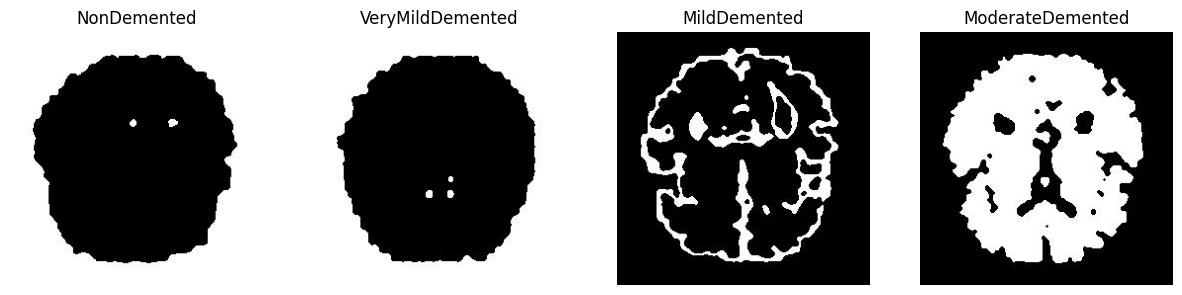

In [ ]:
#VISUALISATION

def display_sample_images_from_train_folder(output_dir):
    # Define a function to display sample images from the specified output directory

    train_dir = os.path.join(output_dir, "train")
    # Define the path to the 'train' subdirectory within the output directory

    if not os.path.exists(train_dir):
        # Check if the 'train' subdirectory exists
        print(f"The directory {train_dir} does not exist.")
        # Print a message if the directory does not exist
        return
        # Exit the function early if the directory is not found

    folder_images = []
    # Initialize an empty list to store paths of images

    folder_names = []
    # Initialize an empty list to store names of folders

    for root, dirs, files in os.walk(train_dir):
        # Walk through the directory tree under 'train_dir'
        added_image = False
        # Initialize a flag to check if an image has been added from this folder

        for file in files:
            # Iterate over each file in the directory
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                # Check if the file is an image with the specified extensions
                folder_images.append(os.path.join(root, file))
                # Add the full path of the image file to the 'folder_images' list

                folder_names.append(os.path.basename(root))
                # Add the name of the current folder to the 'folder_names' list

                added_image = True
                # Set the flag to True indicating an image has been added

                break  # Exit the loop after adding the first image from this folder
        if added_image:
            continue
            # Skip the rest of the loop if an image has been added

    # Display the images
    num_samples = len(folder_images)
    # Get the number of sample images

    plt.figure(figsize=(15, 10))
    # Create a new figure for displaying images with the specified size

    for i, image_path in enumerate(folder_images, 1):
        # Iterate over the images and their indices
        image = cv2.imread(image_path)
        # Read the image from the file path

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Convert the image from BGR to RGB for proper display with matplotlib

        plt.subplot(1, num_samples, i)
        # Define the subplot position for the image in the figure

        plt.imshow(image)
        # Display the image

        plt.title(folder_names[i-1])
        # Set the title of the subplot to the name of the folder

        plt.axis('off')
        # Hide the axis for a cleaner display

    plt.show()
    # Render and show the figure with all the images

output_dir = r'/content/drive/MyDrive/Alzheimer_s_Smoothed_Binary_Output'
# Define the path to the directory containing the processed images

display_sample_images_from_train_folder(output_dir)
# Call the function to display sample images from the specified directory


**CONTRAST STRECHING**

Applying contrast stretching to binary images to enhance their contrast and improve visual clarity. It reads binary images from an input directory, applies contrast stretching, and saves the enhanced images to an output directory, preserving the original directory structure.

In [ ]:
#CONTRAST STRECHING

import os
import numpy as np
from skimage import io, img_as_float, img_as_ubyte
from skimage.exposure import rescale_intensity

# Define directories
input_dir = '/content/drive/MyDrive/Alzheimer_s_Smoothed_Binary_Output'
# Set the path for the input directory containing binary images

output_dir = '/content/drive/MyDrive/Alzheimer_s_Contrast_Enhanced_Output'
# Set the path for the output directory where contrast-enhanced images will be saved

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    # Check if the output directory exists, and if not, create it

# Function to perform contrast stretching on the binary image
def enhance_contrast(image_path, output_path):
    # Define a function to enhance the contrast of an image
    # 'image_path' is the path to the input image
    # 'output_path' is the directory where the output image will be saved

    # Read the binary image
    image = io.imread(image_path)
    # Load the image from the specified path

    image = img_as_float(image)
    # Convert the image to floating-point format for processing

    # Apply contrast stretching
    p2, p98 = np.percentile(image, (2, 98))
    # Compute the 2nd and 98th percentiles of pixel intensities

    contrast_stretched_image = rescale_intensity(image, in_range=(p2, p98))
    # Stretch the contrast of the image based on the computed percentiles

    # Save the contrast-stretched image
    base_filename = os.path.splitext(os.path.basename(image_path))[0]
    # Get the base filename without the extension from the image path

    output_file_path = os.path.join(output_path, f"{base_filename}_contrast_stretched.jpeg")
    # Create the full path for the output file with '_contrast_stretched' suffix

    io.imsave(output_file_path, img_as_ubyte(contrast_stretched_image))
    # Save the contrast-enhanced image as an 8-bit unsigned byte image

# Process each image in the directory
for root, dirs, files in os.walk(input_dir):
    # Walk through the directory tree under 'input_dir'
    for file in files:
        # Iterate over each file in the directory
        if file.lower().endswith(('.jpeg', '.jpg', '.png')):
            # Check if the file is an image with the specified extensions
            input_file_path = os.path.join(root, file)
            # Construct the full path to the input image file

            # Create the corresponding output path
            relative_path = os.path.relpath(root, input_dir)
            # Get the relative path of the current directory with respect to 'input_dir'

            output_folder_path = os.path.join(output_dir, relative_path)
            # Create the full output folder path for saving the processed image

            # Ensure the output directory exists
            os.makedirs(output_folder_path, exist_ok=True)
            # Create the output directory if it does not already exist

            # Enhance contrast and save the image
            enhance_contrast(input_file_path, output_folder_path)
            # Call the function to enhance the contrast of the image and save it


**CONTRAST STRECHING VISUALISATION**

TO CONFIRM CONTRAST STRECHING APPLICATION

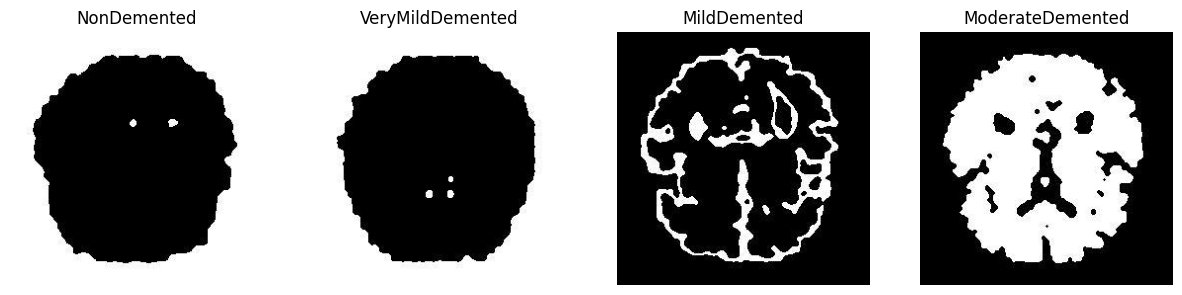

In [ ]:
#CONTRAST STRECHING VISUALISATION


def display_sample_images_from_train_folder(output_dir):
    # Define the function to display sample images from the specified output directory

    train_dir = os.path.join(output_dir, "train")
    # Create the full path to the 'train' subdirectory inside 'output_dir'

    if not os.path.exists(train_dir):
        # Check if the 'train' directory exists
        print(f"The directory {train_dir} does not exist.")
        # Print an error message if the directory is missing
        return
        # Exit the function if the directory does not exist

    folder_images = []
    folder_names = []
    # Initialize lists to store paths of images and their corresponding folder names

    for root, dirs, files in os.walk(train_dir):
        # Walk through the directory tree rooted at 'train_dir'
        added_image = False
        # Flag to ensure only the first image from each folder is added
        for file in files:
            # Iterate over each file in the current directory
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                # Check if the file is an image with a specified extension
                folder_images.append(os.path.join(root, file))
                # Add the full path of the image to 'folder_images'
                folder_names.append(os.path.basename(root))
                # Add the folder name (not the full path) to 'folder_names'
                added_image = True
                # Set the flag indicating that an image has been added
                break  # Only take the first image from this folder
        if added_image:
            # Continue to the next directory if an image was added
            continue

    # Display the images
    num_samples = len(folder_images)
    # Determine the number of images to display

    plt.figure(figsize=(15, 10))
    # Create a new figure for displaying images with a specified size

    for i, image_path in enumerate(folder_images, 1):
        # Iterate over the images and their indices
        image = cv2.imread(image_path)
        # Read the image from the specified path using OpenCV

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Convert the image from BGR (OpenCV format) to RGB (matplotlib format)

        plt.subplot(1, num_samples, i)
        # Create a subplot with 1 row and 'num_samples' columns for each image

        plt.imshow(image)
        # Display the image in the current subplot

        plt.title(folder_names[i-1])
        # Set the title of the subplot to the folder name

        plt.axis('off')
        # Turn off the axis for the subplot

    plt.show()
    # Render and display all the subplots in the figure

output_dir = '/content/drive/MyDrive/Alzheimer_s_Contrast_Enhanced_Output'
# Set the path for the output directory containing the images

display_sample_images_from_train_folder(output_dir)
# Call the function to display sample images from the specified output directory


**HISTOGRAM OF GRADIENTS**


The code is designed to process a set of images by computing Histogram of Oriented Gradients (HOG) features and saving visual representations of these features. The process begins by defining two primary functions. The first function, compute_hog, reads an image from a given path, converts it to grayscale, and computes HOG features using the skimage library. This function returns both the computed HOG features and a visual representation of these features, which highlights the gradient orientations across the image.

The second function, compute_hog_and_save,  starts by ensuring the output directory exists, creating it if necessary. It then traverses the input directory to process each image file with supported extensions. For each image, the function computes its HOG features and generates a visualization of these features. The resulting visualisations are saved to the output directory, preserving the original directory structure.

This approach is particularly useful in understanding the gradient orientations and edge structures. By automating the computation and saving of HOG visualisations, the code streamlines the workflow for analysing and interpreting image features.

In [ ]:
#HOG FEATURES EXTRACTION

import os
import matplotlib.pyplot as plt
from skimage import io, feature, exposure

def compute_hog(image_path):
    # Define a function to compute HOG features and visualization for a given image path

    # Load image
    image = io.imread(image_path, as_gray=True)
    # Read the image from the given path and convert it to grayscale

    # Compute HOG features
    hog_features, hog_image = feature.hog(image, visualize=True)
    # Compute HOG features and obtain the HOG visualisation image

    return hog_features, hog_image
    # Return the HOG features and the HOG visualisation image

def compute_hog_and_save(input_dir, output_dir):
    # Define a function to compute HOG features for all images in the input directory and save the visualizations

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        # Create the output directory if it does not exist

    for root, _, files in os.walk(input_dir):
        # Walk through the directory tree rooted at 'input_dir'
        for file in files:
            # Iterate over each file in the current directory
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                # Check if the file is an image with a specified extension
                input_path = os.path.join(root, file)
                # Construct the full path to the input image file
                relative_path = os.path.relpath(input_path, input_dir)
                # Compute the relative path of the image file from the input directory
                output_path = os.path.join(output_dir, relative_path)
                # Construct the full path to the output directory

                output_subdir = os.path.dirname(output_path)
                # Get the directory name from the output path
                if not os.path.exists(output_subdir):
                    os.makedirs(output_subdir)
                    # Create the output subdirectory if it does not exist

                # Compute HOG features and visualization
                hog_features, hog_image = compute_hog(input_path)
                # Call the compute_hog function to get HOG features and the visualisation image

                # Save HOG visualization
                plt.imsave(output_path, hog_image, cmap='gray')
                # Save the HOG visualization image to the specified path with grayscale colormap

input_dir = '/content/drive/MyDrive/Alzheimer_s_Contrast_Enhanced_Output'
# Set the path for the input directory containing the images

output_dir = '/content/drive/MyDrive/Alzheimer_sDataset_HOG_Visualisations'
# Set the path for the output directory where HOG visualisations will be saved

compute_hog_and_save(input_dir, output_dir)
# Call the function to compute HOG features for all images in the input directory and save the visualisations


**VISUALISATION OF HISTOGRAM OF GRAIDENTS**

SAMPLE IMAGES WERE DISPLAYED TO COMFIRM SUCCESFUL FEATURE EXTRACTION.

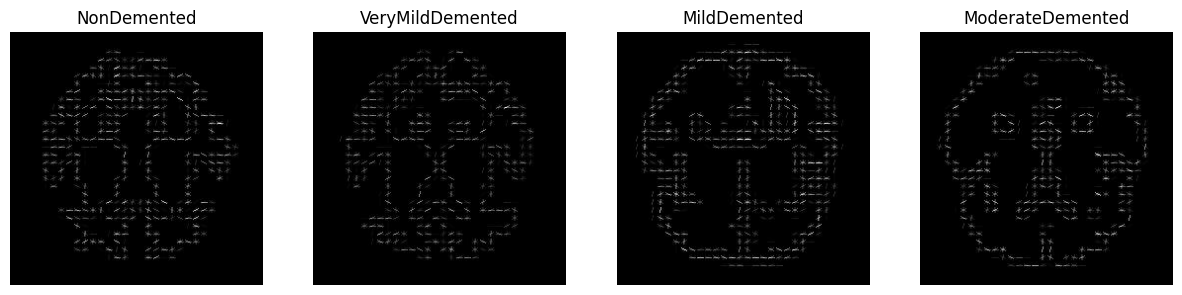

In [ ]:
#VISUALISATION OF HISTOGRAM OF GRAIDENTS

import cv2
# Import the OpenCV library for image processing functions

def display_sample_images_from_train_folder(output_dir):
    # Define a function to display sample images from a specified folder

    train_dir = os.path.join(output_dir, "train")
    # Construct the path to the "train" directory within the output directory

    if not os.path.exists(train_dir):
        # Check if the "train" directory exists
        print(f"The directory {train_dir} does not exist.")
        # Print a message if the directory does not exist
        return
        # Exit the function if the directory does not exist

    folder_images = []
    folder_names = []
    # Initialize lists to store paths to images and folder names

    for root, dirs, files in os.walk(train_dir):
        # Walk through the directory tree rooted at 'train_dir'
        added_image = False
        # Flag to check if an image has been added from the current folder
        for file in files:
            # Iterate over each file in the current directory
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                # Check if the file is an image with a supported extension
                folder_images.append(os.path.join(root, file))
                # Append the full path of the image file to folder_images
                folder_names.append(os.path.basename(root))
                # Append the name of the folder to folder_names
                added_image = True
                # Set the flag indicating an image has been added
                break  # Only take the first image from this folder
        if added_image:
            continue
            # Continue to the next directory if an image was added

    # Display the images
    num_samples = len(folder_images)
    # Determine the number of images to be displayed
    plt.figure(figsize=(15, 10))
    # Create a new figure for plotting images with a specified size
    for i, image_path in enumerate(folder_images, 1):
        # Iterate over each image path, starting index from 1
        image = cv2.imread(image_path)
        # Read the image from the file path using OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Convert the image from BGR (OpenCV default) to RGB (matplotlib default) for correct color display
        plt.subplot(1, num_samples, i)
        # Create a subplot for each image in a single row
        plt.imshow(image)
        # Display the image in the subplot
        plt.title(folder_names[i-1])
        # Set the title of the subplot to the name of the folder
        plt.axis('off')
        # Hide the axis of the subplot

    plt.show()
    # Show the figure with all the subplots

output_dir = '/content/drive/MyDrive/Alzheimer_sDataset_HOG_Visualisations'
# Define the output directory path

display_sample_images_from_train_folder(output_dir)
# Call the function to display sample images from the specified directory


In [ ]:

#Building data pipline after HOG Extraction
data = tf.keras.utils.image_dataset_from_directory(r'/content/drive/MyDrive/Alzheimer_sDataset_HOG_Visualisations')

Found 6400 files belonging to 2 classes.


**LOCAL BINARY PATTERN**

The code processes images to compute Local Binary Pattern (LBP) features and save their visualisations. It reads grayscale images, calculates LBP features using a specified configuration, and normalises the resulting histogram of LBP values. The LBP image, which highlights texture patterns, is then saved to an output directory that mirrors the input directory structure.

This process is valuable for texture analysis and pattern recognition in images. By visualising LBP features, the process provides insights into local texture variations, which is useful for task at hand.

In [ ]:
#LBP

import os
# Import the os module for interacting with the operating system, such as file and directory operations

import matplotlib.pyplot as plt
# Import the pyplot module from matplotlib for plotting and saving images

from skimage import io, feature
# Import io for reading images and feature for computing LBP features from the skimage library

import numpy as np
# Import numpy for numerical operations, including histogram calculations

def compute_lbp(image_path):
    # Define a function to compute LBP features from an image

    # Load image
    image = io.imread(image_path, as_gray=True)
    # Read the image from the file path in grayscale mode

    # Compute LBP features
    lbp = feature.local_binary_pattern(image, P=8, R=1, method='uniform')
    # Compute Local Binary Patterns with 8 neighbors, radius of 1, and uniform method

    # Calculate histogram of LBP and normalize
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 10), range=(0, 9))
    # Flatten the LBP image and calculate its histogram with bins from 0 to 9

    hist = hist.astype("float")
    # Convert histogram counts to float for further processing

    hist /= (hist.sum() + 1e-7)
    # Normalize the histogram by dividing by the sum of all histogram values plus a small constant to avoid division by zero

    return hist, lbp
    # Return the computed histogram and LBP image

def compute_lbp_and_save(input_dir, output_dir):
    # Define a function to compute LBP features for all images in a directory and save the LBP visualisations

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        # Create the output directory if it does not exist

    for root, _, files in os.walk(input_dir):
        # Walk through the directory tree rooted at 'input_dir'
        for file in files:
            # Iterate over each file in the current directory
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                # Check if the file is an image with a supported extension
                input_path = os.path.join(root, file)
                # Construct the full path to the image file

                relative_path = os.path.relpath(input_path, input_dir)
                # Get the relative path of the image file within the input directory

                output_path = os.path.join(output_dir, relative_path)
                # Construct the output path for saving the LBP visualisation

                output_subdir = os.path.dirname(output_path)
                # Get the directory part of the output path

                if not os.path.exists(output_subdir):
                    os.makedirs(output_subdir)
                    # Create the necessary output subdirectories if they do not exist

                # Compute LBP features and visualization
                hist, lbp_image = compute_lbp(input_path)
                # Compute the LBP features and LBP image for the current file

                # Save LBP visualization
                plt.imsave(output_path, lbp_image, cmap='gray')
                # Save the LBP image to the output path with grayscale colormap

input_dir = '/content/drive/MyDrive/Alzheimer_s_Contrast_Enhanced_Output'
# Define the path to the input directory containing images

output_dir = '/content/drive/MyDrive/Alzheimer_sDataset_LBP_Visualisations'
# Define the path to the output directory where LBP visualisations will be saved

compute_lbp_and_save(input_dir, output_dir)
# Call the function to compute LBP features for all images in the input directory and save the results to the output directory


**VISUALISATION OF LOCAL BINARY PATTERN**

DISPLAYED SAMPLE IMAGES TO CONFIRM FEATURE EXTRACTION EFFECT

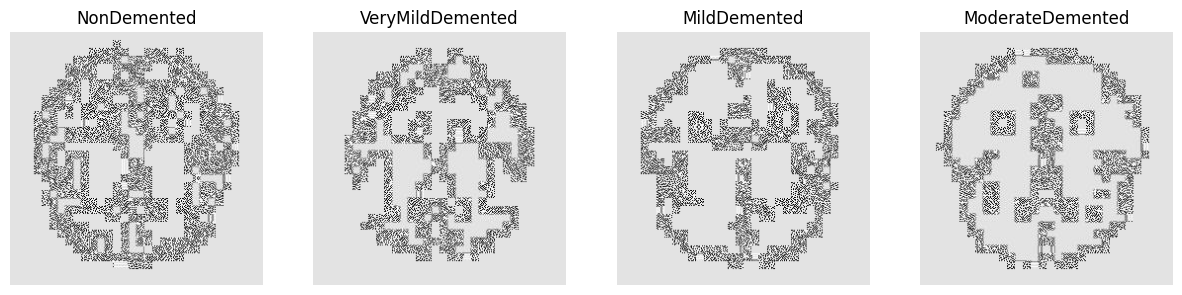

In [ ]:
#LBP SAMPLE IMAGE VISUALISATION

def display_sample_images_from_train_folder(output_dir):
    # Define a function to display sample images from a "train" subfolder within the given output directory

    train_dir = os.path.join(output_dir, "train")
    # Construct the path to the "train" subfolder within the output directory

    if not os.path.exists(train_dir):
        # Check if the "train" subfolder exists
        print(f"The directory {train_dir} does not exist.")
        # Print a message if the directory does not exist
        return
        # Exit the function if the directory is not found

    folder_images = []
    # Initialize a list to store paths of images

    folder_names = []
    # Initialize a list to store the names of the folders containing images

    for root, dirs, files in os.walk(train_dir):
        # Walk through the directory tree starting at 'train_dir'
        added_image = False
        # Flag to track whether an image has been added from the current folder
        for file in files:
            # Iterate over each file in the current directory
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                # Check if the file is an image with a supported extension
                folder_images.append(os.path.join(root, file))
                # Add the full path of the image file to the list
                folder_names.append(os.path.basename(root))
                # Add the name of the folder containing the image to the list
                added_image = True
                # Set the flag to True indicating that an image has been added
                break  # Only take the first image from this folder
        if added_image:
            continue
            # Skip to the next directory if an image has been added from the current directory

    # Display the images
    num_samples = len(folder_images)
    # Count the number of images to display
    plt.figure(figsize=(15, 10))
    # Create a new figure with a specified size for displaying images
    for i, image_path in enumerate(folder_images, 1):
        # Iterate over the list of image paths and their indices
        image = cv2.imread(image_path)
        # Read the image from the file using OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying correctly with matplotlib
        # Convert the image from BGR to RGB format
        plt.subplot(1, num_samples, i)
        # Create a subplot for each image, arranging them in a single row
        plt.imshow(image)
        # Display the image in the subplot
        plt.title(folder_names[i-1])
        # Set the title of the subplot to the name of the folder containing the image
        plt.axis('off')
        # Hide the axis for a cleaner display

    plt.show()
    # Display the figure with all the images

output_dir = '/content/drive/MyDrive/Alzheimer_sDataset_LBP_Visualisations'
# Define the path to the directory containing the images to display

display_sample_images_from_train_folder(output_dir)
# Call the function to display sample images from the specified directory


**Gray-Level Co-occurrence Matrix (GLCM)**

The code extracts Gray-Level Co-occurrence Matrix (GLCM) features from images to analyse texture properties. It reads images, converts them to grayscale if needed, and computes features such as contrast, dissimilarity, homogeneity, energy, and correlation using GLCM. The extracted features are then compiled into a CSV file.

This process provides valuable insights into the texture and patterns within images, which are important for  image classification and analysis.

In [ ]:
#GLCM FEATURE EXTRACTION

# Import necessary libraries
import os
import numpy as np
import pandas as pd
from skimage import io, color
from skimage.feature import graycomatrix, graycoprops

# Step 3: Define the function to extract GLCM features
def extract_glcm_features(image_path):
    try:
        # Attempt to process the image and extract features
        image = io.imread(image_path)
        # Read the image from the file path

        # Ensure the image is grayscale
        if len(image.shape) == 3 and image.shape[2] == 3:
            # If the image has three channels (RGB), convert it to grayscale
            gray_image = color.rgb2gray(image)
        elif len(image.shape) == 2:
            # If the image is already grayscale, use it directly
            gray_image = image
        else:
            # Raise an error if the image has an unsupported shape
            raise ValueError(f"Unsupported image shape: {image.shape}")

        gray_image = (gray_image * 255).astype(np.uint8)
        # Convert the grayscale image to 8-bit unsigned integer format

        distances = [1]  # You can use more distances
        # Define the distances for GLCM calculation (here, only 1 pixel distance)

        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
        # Define the angles for GLCM calculation (0°, 45°, 90°, 135°)

        glcm = graycomatrix(gray_image, distances=distances, angles=angles, symmetric=True, normed=True)
        # Compute the GLCM matrix with specified distances and angles

        features = {
            'contrast': graycoprops(glcm, 'contrast').mean(),
            # Compute the contrast property from GLCM and take its mean value
            'dissimilarity': graycoprops(glcm, 'dissimilarity').mean(),
            # Compute the dissimilarity property from GLCM and take its mean value
            'homogeneity': graycoprops(glcm, 'homogeneity').mean(),
            # Compute the homogeneity property from GLCM and take its mean value
            'energy': graycoprops(glcm, 'energy').mean(),
            # Compute the energy property from GLCM and take its mean value
            'correlation': graycoprops(glcm, 'correlation').mean()
            # Compute the correlation property from GLCM and take its mean value
        }

        return features
        # Return the extracted features as a dictionary
    except Exception as e:
        # Handle exceptions
        print(f"Error processing {image_path}: {e}")
        # Print an error message if there is an issue
        return None
        # Return None if an error occurs

# Step 4: Process all images in the input directory and save the results
def process_images(input_dir, output_csv):
    data = []
    # Initialize a list to store feature dictionaries

    for root, _, files in os.walk(input_dir):
        # Walk through the directory tree starting from 'input_dir'
        for file in files:
            # Iterate over each file in the current directory
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                # Check if the file is an image with a supported extension
                file_path = os.path.join(root, file)
                # Construct the full path to the image file
                features = extract_glcm_features(file_path)
                # Extract GLCM features from the image
                if features:
                    features['file_path'] = file_path
                    # Add the file path to the features dictionary
                    data.append(features)
                    # Append the features dictionary to the list

    df = pd.DataFrame(data)
    # Convert the list of feature dictionaries to a DataFrame

    df.to_csv(output_csv, index=False)
    # Save the DataFrame to a CSV file without row indices

# Define input and output paths
input_dir = '/content/drive/MyDrive/Alzheimer_s_Contrast_Enhanced_Output'
output_csv = '/content/drive/MyDrive/GLCM_Features.csv'

# Call the function to process images and save features
process_images(input_dir, output_csv)


CORRELATION MATRIX WITH GLCM BEFORE TRAINING

The code analyses the relationships between GLCM features by loading them from a CSV file, removing the non-numerical 'file_path' column, and calculating the correlation matrix. It then visualises these correlations using a heatmap. This helps identify how texture properties are interrelated, aiding in feature selection and analysis.

      contrast  dissimilarity  homogeneity    energy  correlation  \
0  7756.158823      33.337102     0.674731  0.575247     0.383692   
1  7179.855368      30.891215     0.697411  0.576126     0.391151   
2  6643.491428      28.744845     0.706030  0.589509     0.392260   
3  5423.174921      23.578738     0.748700  0.549319     0.415381   
4  5425.922008      23.331143     0.773091  0.620278     0.402768   

                                           file_path  
0  /content/drive/MyDrive/Alzheimer_s_Contrast_En...  
1  /content/drive/MyDrive/Alzheimer_s_Contrast_En...  
2  /content/drive/MyDrive/Alzheimer_s_Contrast_En...  
3  /content/drive/MyDrive/Alzheimer_s_Contrast_En...  
4  /content/drive/MyDrive/Alzheimer_s_Contrast_En...  
               contrast  dissimilarity  homogeneity    energy  correlation
contrast       1.000000       0.999896    -0.988570 -0.236953    -0.756356
dissimilarity  0.999896       1.000000    -0.990623 -0.242592    -0.756127
homogeneity   -0.988570      -

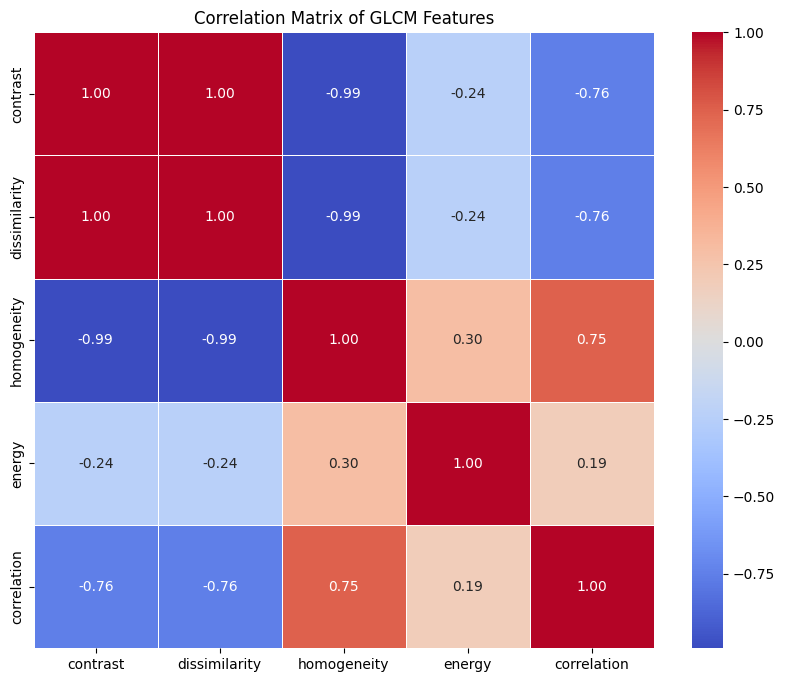

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the GLCM features from the CSV file
glcm_features_csv = '/content/drive/MyDrive/GLCM_Features.csv'
df = pd.read_csv(glcm_features_csv)
# Read the GLCM features from the specified CSV file into a DataFrame

# Display the first few rows of the dataframe to verify the content
print(df.head())
# Print the first few rows of the DataFrame to check the loaded data

# Drop the 'file_path' column as it is not a numerical feature
df = df.drop(columns=['file_path'])
# Remove the 'file_path' column from the DataFrame as it's not used for correlation analysis

# Calculate the correlation matrix
correlation_matrix = df.corr()
# Compute the correlation matrix for the numerical features in the DataFrame

# Print the correlation matrix
print(correlation_matrix)
# Print the correlation matrix to the console for inspection

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
# Create a new figure with a specified size for the heatmap

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
# Create a heatmap of the correlation matrix using seaborn with annotations, a color map, and formatting

plt.title('Correlation Matrix of GLCM Features')
# Set the title of the heatmap

plt.show()
# Display the heatmap


**MODEL TRAINING**

IN THIS SECTION THE 3 DIFFERENT EXTRACTED FEATURES(HOG,LBP AND GLCM WILL BE TRAIN WITH 3 DIFFERENT CLASSIFIERS(KNN SVM AND RF)

**VISUALISATION OF SAMLE IMAGE FROM EACH DIRECTORY**

Exploring directory: /content/drive/MyDrive/Alzheimer_sDataset_HOG_Visualisations/train

Category: NonDemented
Total images: 2560


<ipython-input-4-7784ec35cb11>:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


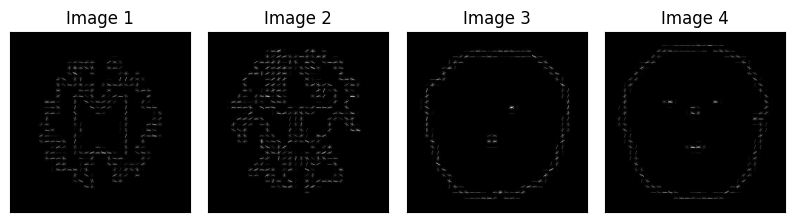


Category: VeryMildDemented
Total images: 1792


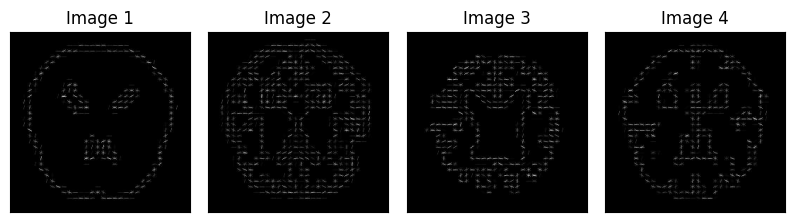


Category: MildDemented
Total images: 717


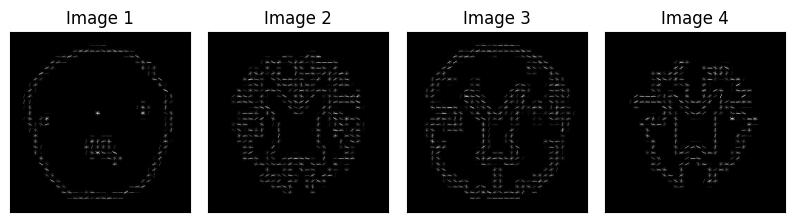


Category: ModerateDemented
Total images: 52


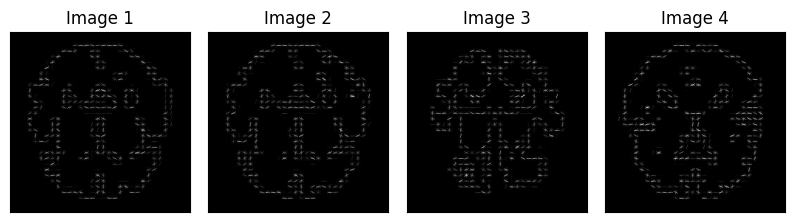

Exploring directory: /content/drive/MyDrive/Alzheimer_sDataset_HOG_Visualisations/test

Category: ModerateDemented
Total images: 12


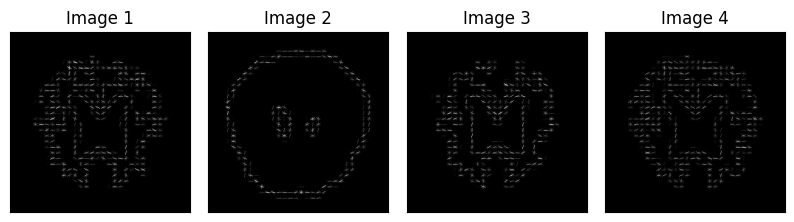


Category: MildDemented
Total images: 179


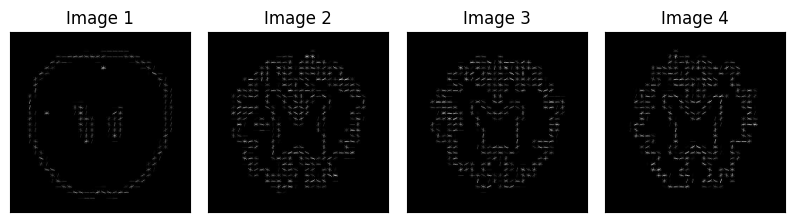


Category: VeryMildDemented
Total images: 448


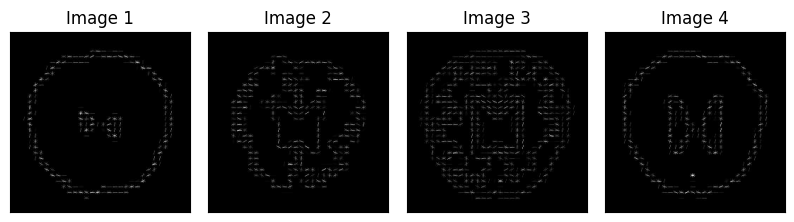


Category: NonDemented
Total images: 640


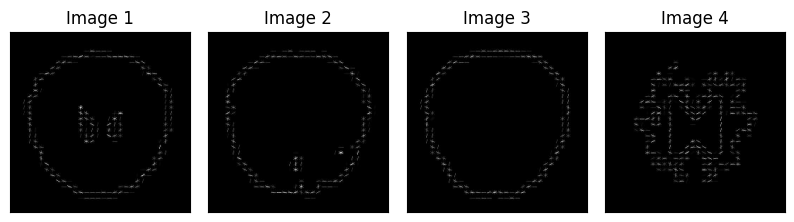

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random

# Directory paths
dataset_dir = '/content/drive/MyDrive/Alzheimer_sDataset_HOG_Visualisations'
# Define the path to the main dataset directory
train_dir = os.path.join(dataset_dir, 'train')
# Define the path to the training images directory within the dataset
test_dir = os.path.join(dataset_dir, 'test')
# Define the path to the testing images directory within the dataset

# Function to explore a specific directory
def explore_directory(directory):
    print(f"Exploring directory: {directory}")
    # Print the path of the directory being explored
    categories = os.listdir(directory)
    # List all categories (subdirectories) within the specified directory
    for category in categories:
        category_dir = os.path.join(directory, category)
        # Construct the full path for each category directory
        if os.path.isdir(category_dir):
            print(f"\nCategory: {category}")
            # Print the name of the category
            files = os.listdir(category_dir)
            # List all files (images) in the category directory
            print(f"Total images: {len(files)}")
            # Print the total number of images in the category

            # Display sample images
            sample_size = min(len(files), 4)
            # Determine the number of images to display (up to 4)
            fig = plt.figure(figsize=(10, 3))
            # Create a new figure with a specified size for displaying images
            gs = gridspec.GridSpec(1, sample_size, wspace=0.1, hspace=0.1)
            # Create a grid specification for arranging subplots in the figure
            for i, file in enumerate(random.sample(files, sample_size)):
                # Randomly select a subset of images to display
                img_path = os.path.join(category_dir, file)
                # Construct the full path to the image file
                img = plt.imread(img_path)
                # Read the image file
                ax = plt.subplot(gs[i])
                # Create a subplot within the grid
                ax.imshow(img)
                # Display the image in the subplot
                ax.set_xticks([])
                # Remove x-axis ticks
                ax.set_yticks([])
                # Remove y-axis ticks
                ax.set_title(f'Image {i+1}')
                # Set the title for each subplot
            plt.tight_layout()
            # Adjust subplot parameters to fit into the figure area
            plt.show()
            # Display the figure

# Explore the entire dataset
explore_directory(train_dir)
# Call the function to explore and visualize images in the training directory
explore_directory(test_dir)
# Call the function to explore and visualize images in the testing directory


**SUPPORT VECTOR MACHINE TRAINED WITH HOG FEATURES**


The code trains a Support Vector Machine (SVM) classifier to categorise images into different classes and evaluates its performance.

It begins by loading grayscale images from HOG directories and resizing them to a fixed size. These images, along with their labels, are then flattened into arrays suitable for SVM. The dataset is split into training and testing sets, and an SVM classifier with a linear kernel is trained using the training data.

After training, the script evaluates the model on the test set and computes predictions. It generates and visualises a confusion matrix to show the model’s performance across different classes. Additionally, it prints a classification report and calculates accuracy.

It calculates several performance metrics, including sensitivity, specificity, and F1 score, for each class. Finally, it saves the trained SVM model, training and test data, and confusion matrix to a file using pickle, ensuring that the model and its associated data can be easily reloaded for future use or deployment.


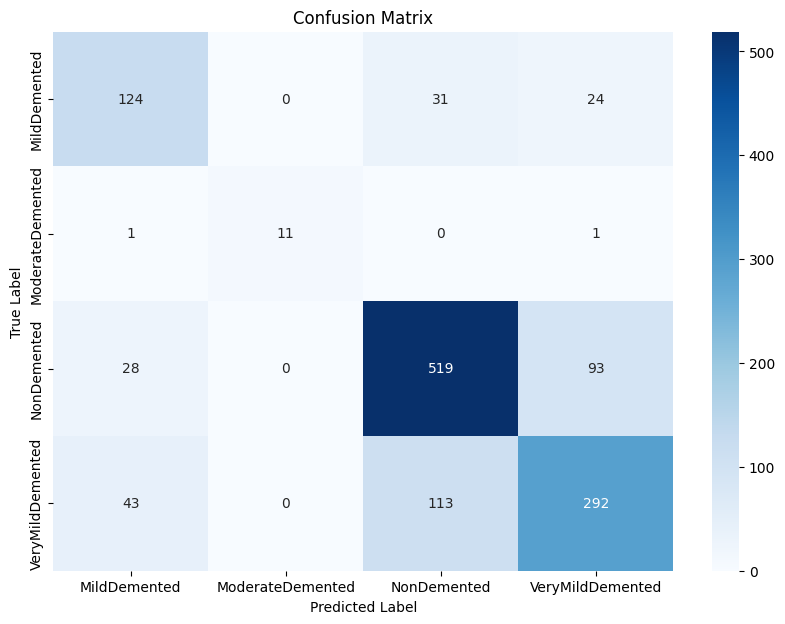

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.63      0.69      0.66       179
ModerateDemented       1.00      0.85      0.92        13
     NonDemented       0.78      0.81      0.80       640
VeryMildDemented       0.71      0.65      0.68       448

        accuracy                           0.74      1280
       macro avg       0.78      0.75      0.76      1280
    weighted avg       0.74      0.74      0.74      1280

Accuracy: 0.7391
Class: MildDemented
  Sensitivity (Recall): 0.6927
  Specificity: 0.9346
  F1 Score: 0.6613
Class: ModerateDemented
  Sensitivity (Recall): 0.8462
  Specificity: 1.0000
  F1 Score: 0.9167
Class: NonDemented
  Sensitivity (Recall): 0.8109
  Specificity: 0.7750
  F1 Score: 0.7966
Class: VeryMildDemented
  Sensitivity (Recall): 0.6518
  Specificity: 0.8582
  F1 Score: 0.6807
Model and data saved to /content/drive/MyDrive/svm_model_for_deployment.pkl


In [ ]:
#SVM AND HOG

import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the paths
data_path = '/content/drive/MyDrive/Alzheimer_sDataset_HOG_Visualisations'
# Set the path to the main dataset directory

# Initialize lists to hold images and labels
images = []
labels = []
# Create empty lists to store image data and corresponding labels

# Function to load images from a directory
def load_images_from_directory(directory):
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        # Construct the path to each category subdirectory
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                if filename.endswith('.jpeg'):
                    file_path = os.path.join(label_dir, filename)
                    # Construct the full path to each image file
                    try:
                        image = Image.open(file_path).convert('L')
                        # Open the image and convert it to grayscale
                        image = image.resize((256, 256))
                        # Resize the image to a fixed size (256x256 pixels)
                        image_array = np.array(image).flatten()
                        # Convert the image to a numpy array and flatten it
                        images.append(image_array)
                        labels.append(label)
                        # Append the image data and label to the lists
                    except Exception:
                        # Skip any images that cause an error without printing the error message
                        continue

# Load images from train and test directories
train_dir = os.path.join(data_path, 'train')
test_dir = os.path.join(data_path, 'test')
# Define paths to the training and testing directories

load_images_from_directory(train_dir)
load_images_from_directory(test_dir)
# Load images from the training and testing directories

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)
# Convert the lists of images and labels to numpy arrays

# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Split the dataset into training and testing sets with 80% training and 20% testing, ensuring class distribution is preserved

# Initialize and train the SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
# Create an SVM classifier with a linear kernel and train it on the training data

# Make predictions
y_pred = svm.predict(X_test)
# Use the trained SVM model to predict labels for the testing set

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
# Calculate the confusion matrix for the true and predicted labels

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Create a heatmap of the confusion matrix with annotations and labels

# Print the classification report with zero_division set to 0
report = classification_report(y_test, y_pred, target_names=np.unique(y_test), zero_division=0)
print("Classification Report:")
print(report)
# Generate and print a detailed classification report including precision, recall, and F1 score for each class

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# Calculate and print the accuracy of the model on the test set

# Calculate additional metrics
def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    # Calculate false positives, false negatives, true positives, and true negatives

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP / (TP + FN)
    # Specificity or true negative rate
    TNR = TN / (TN + FP)
    # Precision or positive predictive value
    PPV = TP / (TP + FP)
    # Negative predictive value
    NPV = TN / (TN + FN)
    # Fall out or false positive rate
    FPR = FP / (FP + TN)
    # False negative rate
    FNR = FN / (TP + FN)
    # False discovery rate
    FDR = FP / (TP + FP)
    # F1 score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    return TPR, TNR, F1
    # Return the calculated metrics: sensitivity, specificity, and F1 score

# Get the unique labels
labels = np.unique(y_test)
# Get the unique class labels from the test set

# Calculate metrics
sensitivity, specificity, f1_score = calculate_metrics(cm)
# Compute the sensitivity, specificity, and F1 score for each class

# Print metrics
for i, label in enumerate(labels):
    print(f"Class: {label}")
    print(f"  Sensitivity (Recall): {sensitivity[i]:.4f}")
    print(f"  Specificity: {specificity[i]:.4f}")
    print(f"  F1 Score: {f1_score[i]:.4f}")
# Print the calculated metrics for each class

import pickle

# Define the path where the model will be saved in Google Drive
model_path = '/content/drive/MyDrive/svm_model_for_deployment.pkl'

# Save the model and other components
with open(model_path, 'wb') as file:
    pickle.dump({
        'svm_model': svm,
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test,
        'cm': cm
    }, file)
# Save the trained SVM model, training/testing data, and confusion matrix to a file using pickle

print(f"Model and data saved to {model_path}")
# Print a confirmation message indicating where the model and data have been saved


**VISUALISATION OF METRICS**

The code trains an SVM classifier, evaluates its performance, and visualises the results. It loads and preprocesses images, trains the model, and assesses its accuracy using a confusion matrix and performance metrics like precision, recall, and F1 score. The results are summarised in a classification report and visualised with a bar chart to highlight overall model performance.

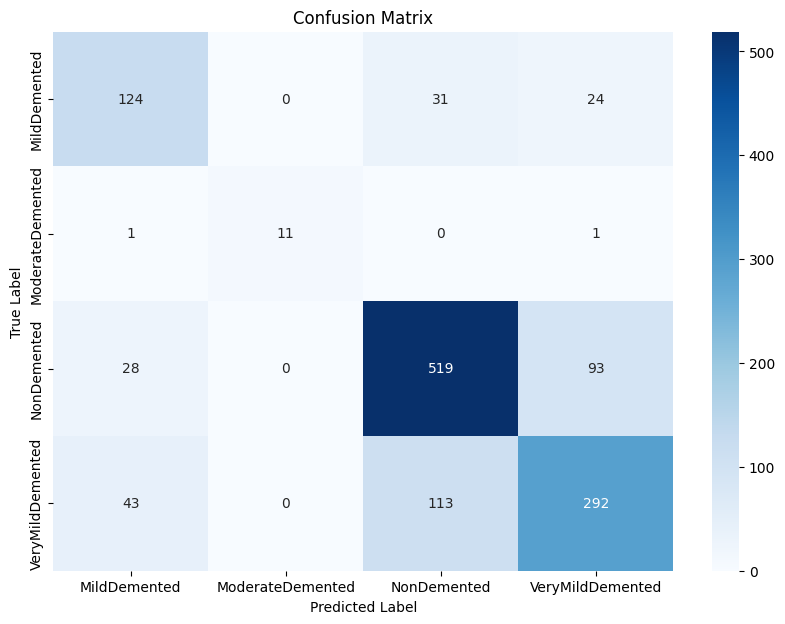

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.63      0.69      0.66       179
ModerateDemented       1.00      0.85      0.92        13
     NonDemented       0.78      0.81      0.80       640
VeryMildDemented       0.71      0.65      0.68       448

        accuracy                           0.74      1280
       macro avg       0.78      0.75      0.76      1280
    weighted avg       0.74      0.74      0.74      1280

Accuracy: 0.7391
Class: MildDemented
  Sensitivity (Recall): 0.6927
  Specificity: 0.9346
  F1 Score: 0.6613
Class: ModerateDemented
  Sensitivity (Recall): 0.8462
  Specificity: 1.0000
  F1 Score: 0.9167
Class: NonDemented
  Sensitivity (Recall): 0.8109
  Specificity: 0.7750
  F1 Score: 0.7966
Class: VeryMildDemented
  Sensitivity (Recall): 0.6518
  Specificity: 0.8582
  F1 Score: 0.6807


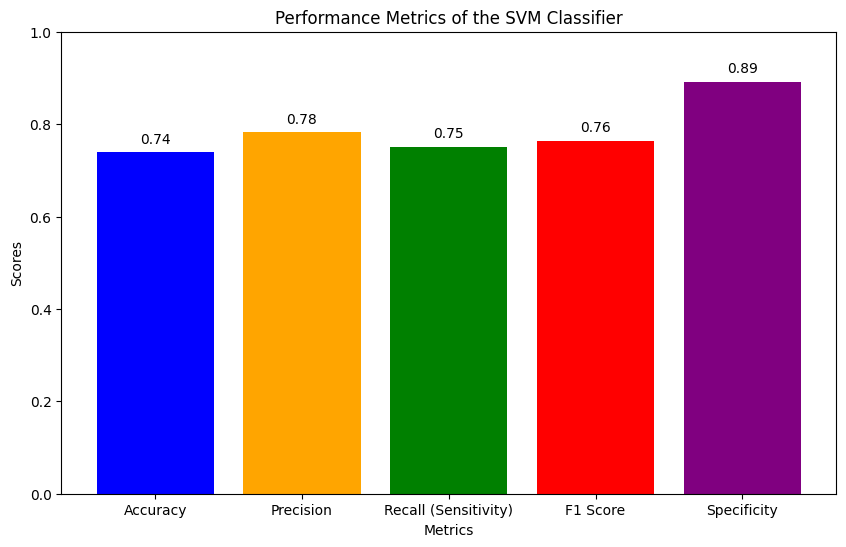

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the paths
data_path = '/content/drive/MyDrive/Alzheimer_sDataset_HOG_Visualisations'
# Set the path to the main directory containing the dataset

# Initialize lists to hold images and labels
images = []
labels = []
# Create empty lists to store image data and corresponding labels

# Function to load images from a directory
def load_images_from_directory(directory):
    for label in os.listdir(directory):  # Iterate over each subdirectory (label)
        label_dir = os.path.join(directory, label)
        # Construct the path to the label subdirectory
        if os.path.isdir(label_dir):  # Check if it's a directory
            for filename in os.listdir(label_dir):  # Iterate over each file in the label directory
                if filename.endswith('.jpeg'):  # Check if the file is a JPEG image
                    file_path = os.path.join(label_dir, filename)
                    # Construct the full path to the image file
                    try:
                        image = Image.open(file_path).convert('L')
                        # Open the image file and convert it to grayscale
                        image = image.resize((256, 256))
                        # Resize the image to a fixed size (256x256 pixels)
                        image_array = np.array(image).flatten()
                        # Convert the image to a numpy array and flatten it to 1D
                        images.append(image_array)
                        labels.append(label)
                        # Append the flattened image array and label to the lists
                    except Exception:
                        # Skip any images that cause an error without printing the error message
                        continue

# Load images from train and test directories
train_dir = os.path.join(data_path, 'train')
test_dir = os.path.join(data_path, 'test')
# Define paths to the training and testing directories

load_images_from_directory(train_dir)  # Load images from the training directory
load_images_from_directory(test_dir)  # Load images from the testing directory

# Convert lists to numpy arrays
X = np.array(images)  # Convert the list of image arrays to a numpy array
y = np.array(labels)  # Convert the list of labels to a numpy array

# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Split the dataset into training and testing sets with 80% of data for training and 20% for testing

# Initialize and train the SVM classifier
svm = SVC(kernel='linear', random_state=42)  # Create an SVM classifier with a linear kernel
svm.fit(X_train, y_train)  # Train the classifier on the training data

# Make predictions
y_pred = svm.predict(X_test)  # Predict labels for the test set

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
# Compute the confusion matrix using true and predicted labels

# Plot the confusion matrix
plt.figure(figsize=(10, 7))  # Set the size of the figure
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# Plot the confusion matrix as a heatmap with annotations
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.ylabel('True Label')  # Label for the y-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot

# Print the classification report with zero_division set to 0
report = classification_report(y_test, y_pred, target_names=np.unique(y_test), zero_division=0)
print("Classification Report:")
print(report)
# Print a detailed classification report including precision, recall, and F1-score for each class

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# Calculate and print the overall accuracy of the model

# Calculate additional metrics
def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)  # Calculate false positives
    FN = cm.sum(axis=1) - np.diag(cm)  # Calculate false negatives
    TP = np.diag(cm)  # Calculate true positives
    TN = cm.sum() - (FP + FN + TP)  # Calculate true negatives

    # Sensitivity (Recall or True Positive Rate)
    TPR = TP / (TP + FN)
    # Specificity (True Negative Rate)
    TNR = TN / (TN + FP)
    # Precision (Positive Predictive Value)
    PPV = TP / (TP + FP)
    # F1 Score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    return TPR, TNR, F1
    # Return sensitivity, specificity, and F1 score for each class

# Get the unique labels
labels = np.unique(y_test)
# Retrieve unique class labels from the test set

# Calculate metrics
sensitivity, specificity, f1 = calculate_metrics(cm)
# Compute sensitivity, specificity, and F1 scores using the confusion matrix

# Print metrics for each class
for i, label in enumerate(labels):
    print(f"Class: {label}")
    print(f"  Sensitivity (Recall): {sensitivity[i]:.4f}")
    print(f"  Specificity: {specificity[i]:.4f}")
    print(f"  F1 Score: {f1[i]:.4f}")
# Print sensitivity, specificity, and F1 score for each class

# Metrics dictionary for overall scores
metrics = {
    'Accuracy': accuracy,
    'Precision': np.mean(precision_score(y_test, y_pred, average=None, zero_division=0)),
    'Recall (Sensitivity)': np.mean(sensitivity),
    'F1 Score': np.mean(f1),
    'Specificity': np.mean(specificity)
}
# Create a dictionary to hold overall performance metrics

# Plot the metrics
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
# Create a bar chart for the performance metrics
plt.xlabel('Metrics')  # Label for the x-axis
plt.ylabel('Scores')  # Label for the y-axis
plt.title('Performance Metrics of the SVM Classifier')  # Title of the plot
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
for i, value in enumerate(metrics.values()):  # Add text labels to each bar
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center')

plt.show()  # Display the plot


**SVM TRAINED WITH LOCAL BINARY PATTERN**

The code trains an SVM classifier on LBP image features, processes images from directories, and evaluates model performance. It splits the data into training and testing sets, computes accuracy, precision,sensitivity recall, and F1 score, and visualises results with a confusion matrix and bar chart of metrics.

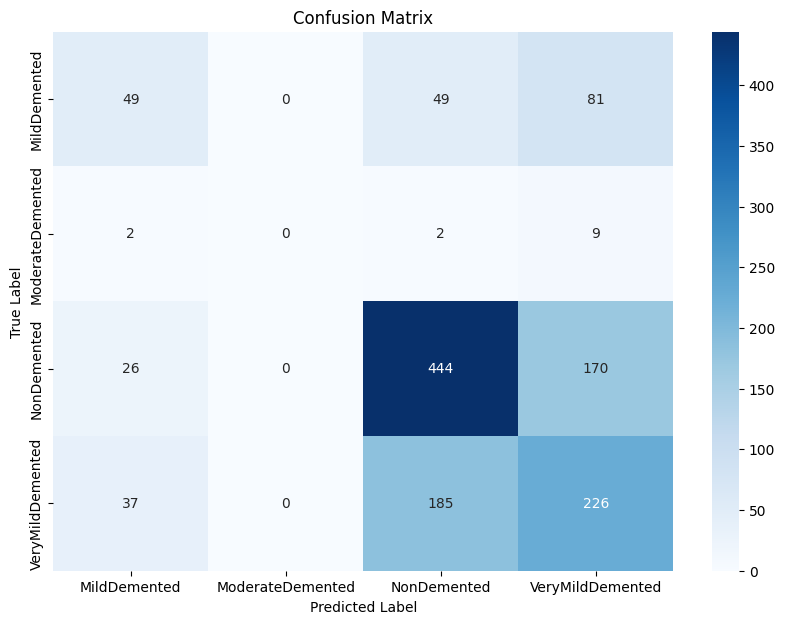

<ipython-input-5-65bef03d2e91>:95: RuntimeWarning: invalid value encountered in divide
  PPV = TP / (TP + FP)


Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.43      0.27      0.33       179
ModerateDemented       0.00      0.00      0.00        13
     NonDemented       0.65      0.69      0.67       640
VeryMildDemented       0.47      0.50      0.48       448

        accuracy                           0.56      1280
       macro avg       0.39      0.37      0.37      1280
    weighted avg       0.55      0.56      0.55      1280

Accuracy: 0.5617
Class: MildDemented
  Sensitivity (Recall): 0.2737
  Specificity: 0.9410
  Precision: 0.4298
  F1 Score: 0.3345
  Accuracy: 0.8477
Class: ModerateDemented
  Sensitivity (Recall): 0.0000
  Specificity: 1.0000
  Precision: nan
  F1 Score: nan
  Accuracy: 0.9898
Class: NonDemented
  Sensitivity (Recall): 0.6937
  Specificity: 0.6312
  Precision: 0.6529
  F1 Score: 0.6727
  Accuracy: 0.6625
Class: VeryMildDemented
  Sensitivity (Recall): 0.5045
  Specificity: 0.6875
  Precision: 0.4650
  F1 S

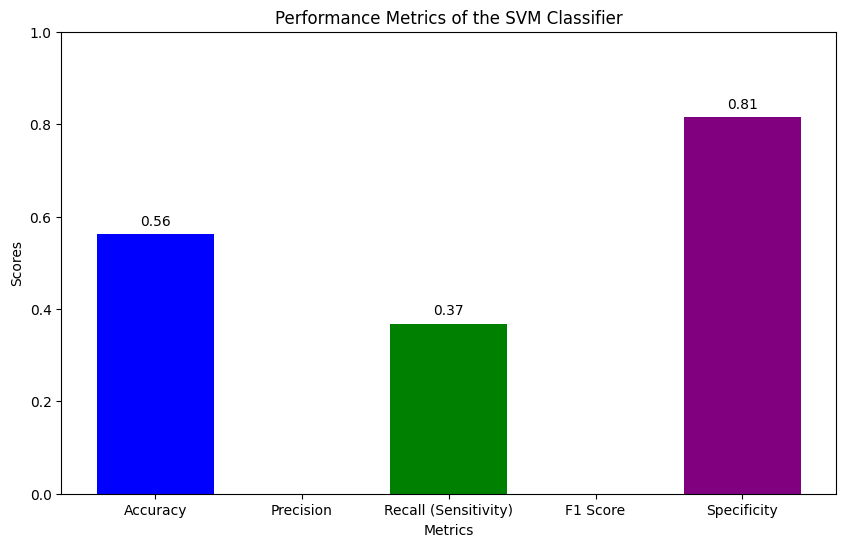

In [ ]:
#SVM AND LBP

# Import necessary libraries
import os  # For interacting with the operating system and file system
import numpy as np  # For numerical operations and array handling
from PIL import Image  # For image processing
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.svm import SVC  # For Support Vector Classification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score  # For evaluating model performance
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced plotting, particularly heatmaps

# Define the paths to your dataset
data_path = '/content/drive/MyDrive/Alzheimer_sDataset_LBP_Visualisations'
# Set the path to the main directory containing the dataset

# Initialize lists to hold images and labels
images = []  # List to store image data
labels = []  # List to store labels corresponding to the images

# Function to load images from a directory
def load_images_from_directory(directory):
    for label in os.listdir(directory):  # Iterate over each subdirectory (representing a class)
        label_dir = os.path.join(directory, label)  # Construct the full path to the label directory
        if os.path.isdir(label_dir):  # Check if it's a directory
            for filename in os.listdir(label_dir):  # Iterate over each file in the label directory
                if filename.endswith('.jpeg'):  # Check if the file is a JPEG image
                    file_path = os.path.join(label_dir, filename)  # Construct the full path to the image file
                    try:
                        image = Image.open(file_path).convert('L')  # Open the image and convert it to grayscale
                        image = image.resize((256, 256))  # Resize the image to 256x256 pixels
                        image_array = np.array(image).flatten()  # Convert the image to a numpy array and flatten it to a 1D array
                        images.append(image_array)  # Append the image data to the list
                        labels.append(label)  # Append the corresponding label to the list
                    except Exception:
                        # Skip any images that cause an error
                        continue

# Load images from both the training and testing directories
train_dir = os.path.join(data_path, 'train')  # Define the path to the training directory
test_dir = os.path.join(data_path, 'test')  # Define the path to the testing directory

load_images_from_directory(train_dir)  # Load images from the training directory
load_images_from_directory(test_dir)  # Load images from the testing directory

# Convert lists to numpy arrays for further processing
X = np.array(images)  # Convert the list of image arrays to a numpy array
y = np.array(labels)  # Convert the list of labels to a numpy array

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Split the dataset into training and testing sets with 80% of data for training and 20% for testing, stratified by labels

# Initialize and train the SVM classifier with a linear kernel
svm = SVC(kernel='linear', random_state=42)  # Create an SVM classifier with a linear kernel
svm.fit(X_train, y_train)  # Train the classifier on the training data

# Make predictions on the test set
y_pred = svm.predict(X_test)  # Predict labels for the test data

# Compute the confusion matrix to evaluate the performance
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
# Compute the confusion matrix using true and predicted labels

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))  # Set the size of the figure
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# Plot the confusion matrix as a heatmap with annotations
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.ylabel('True Label')  # Label for the y-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot

# Print the classification report including precision, recall, F1-score, etc.
report = classification_report(y_test, y_pred, target_names=np.unique(y_test), zero_division=0)
print("Classification Report:")  # Print statement
print(report)  # Print the classification report

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
print(f"Accuracy: {accuracy:.4f}")  # Print the accuracy, formatted to 4 decimal places

# Define a function to calculate additional metrics such as sensitivity, specificity, precision, F1 score, and accuracy
def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)  # False positives
    FN = cm.sum(axis=1) - np.diag(cm)  # False negatives
    TP = np.diag(cm)  # True positives
    TN = cm.sum() - (FP + FN + TP)  # True negatives

    # Sensitivity or true positive rate
    TPR = TP / (TP + FN)
    # Specificity or true negative rate
    TNR = TN / (TN + FP)
    # Precision or positive predictive value
    PPV = TP / (TP + FP)
    # F1 score calculation
    F1 = 2 * (PPV * TPR) / (PPV + TPR)
    # Accuracy calculation
    ACC = (TP + TN) / (TP + TN + FP + FN)

    return TPR, TNR, PPV, F1, ACC
    # Return sensitivity, specificity, precision, F1 score, and accuracy for each class

# Get the unique labels from the test set
labels = np.unique(y_test)  # Retrieve unique class labels from the test set

# Calculate the sensitivity, specificity, precision, F1 score, and accuracy for each class
sensitivity, specificity, precision, f1_score, accuracy = calculate_metrics(cm)

# Print the calculated metrics for each class
for i, label in enumerate(labels):
    print(f"Class: {label}")  # Print class label
    print(f"  Sensitivity (Recall): {sensitivity[i]:.4f}")  # Print sensitivity for the class
    print(f"  Specificity: {specificity[i]:.4f}")  # Print specificity for the class
    print(f"  Precision: {precision[i]:.4f}")  # Print precision for the class
    print(f"  F1 Score: {f1_score[i]:.4f}")  # Print F1 score for the class
    print(f"  Accuracy: {accuracy[i]:.4f}")  # Print accuracy for the class

# Metrics dictionary for overall scores
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': np.mean(precision),
    'Recall (Sensitivity)': np.mean(sensitivity),
    'F1 Score': np.mean(f1_score),
    'Specificity': np.mean(specificity)
}
# Create a dictionary to hold overall performance metrics

# Plot the metrics
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red', 'purple'])  # Create a bar chart for the metrics
plt.xlabel('Metrics')  # Label for the x-axis
plt.ylabel('Scores')  # Label for the y-axis
plt.title('Performance Metrics of the SVM Classifier')  # Title of the plot
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
for i, value in enumerate(metrics.values()):  # Add text labels to each bar
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center')

plt.show()  # Display the plot


**SVM WITH GLCM**

Accuracy: 0.25


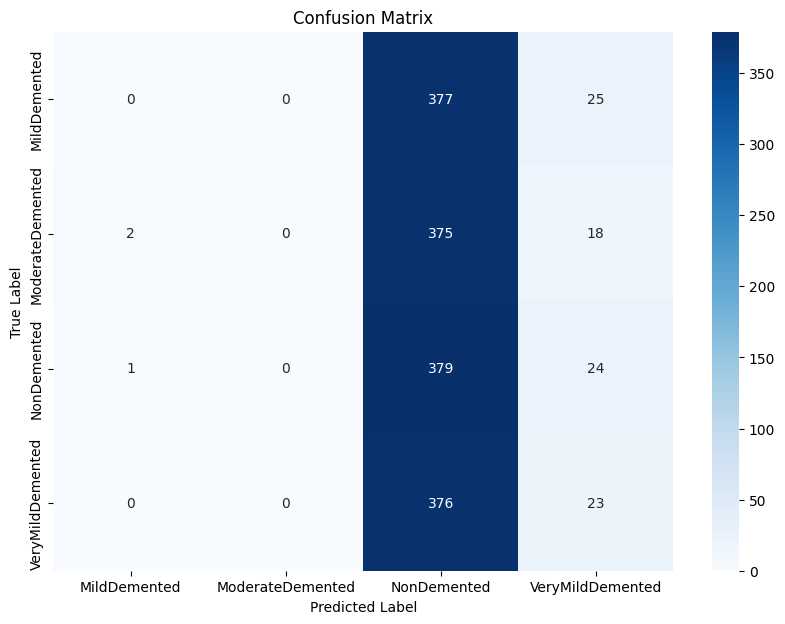

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       402
ModerateDemented       0.00      0.00      0.00       395
     NonDemented       0.25      0.94      0.40       404
VeryMildDemented       0.26      0.06      0.09       399

        accuracy                           0.25      1600
       macro avg       0.13      0.25      0.12      1600
    weighted avg       0.13      0.25      0.12      1600

Average Sensitivity (Recall): 0.25
Average Specificity: 0.75


In [ ]:
import pandas as pd  # For data manipulation and reading CSV files
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  # For splitting data, cross-validation, and hyperparameter tuning
from sklearn.svm import SVC  # For Support Vector Classification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score  # For evaluating model performance
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced plotting, particularly heatmaps
import numpy as np  # For numerical operations and array handling

# Load GLCM features from the CSV file
csv_path = '/content/drive/MyDrive/GLCM_Features.csv'  # Path to the CSV file containing GLCM features
glcm_data = pd.read_csv(csv_path)  # Read the CSV file into a pandas DataFrame

# Generate dummy labels for demonstration purposes
glcm_data['label'] = np.random.choice(['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'], size=len(glcm_data))
# Create a new column 'label' with random labels for demonstration

# Define features and labels
X = glcm_data[['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']].values  # Extract feature columns and convert to numpy array
y = glcm_data['label'].values  # Extract label column and convert to numpy array

# Split the dataset into training and testing sets (80/20) using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# Split the data into training (75%) and testing (25%) sets, maintaining the proportion of labels

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 5, 10, 50],  # Regularization parameter values to test
    'degree': [2, 3, 4, 5],  # Degree of the polynomial kernel to test
    'kernel': ['poly']  # Use polynomial kernel only
}

# Initialize the SVM classifier
svm = SVC()  # Create an SVM classifier object

# Use GridSearchCV with StratifiedKFold for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Define cross-validation strategy with 5 folds
grid_search = GridSearchCV(svm, param_grid, cv=cv, scoring='accuracy')  # Initialize GridSearchCV for hyperparameter tuning
grid_search.fit(X_train, y_train)  # Fit GridSearchCV to the training data

# Get the best estimator
best_svm = grid_search.best_estimator_  # Retrieve the best SVM model from GridSearchCV

# Make predictions on the test dataset
y_pred = best_svm.predict(X_test)  # Predict labels for the test set using the best model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Compute the accuracy score of the predictions
print(f"Accuracy: {accuracy:.2f}")  # Print the accuracy, formatted to 2 decimal places

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))  # Compute the confusion matrix

# Plot the confusion matrix
plt.figure(figsize=(10, 7))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# Plot the confusion matrix as a heatmap with annotations for each cell
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.ylabel('True Label')  # Label for the y-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot

# Print the classification report with zero_division set to 0
report = classification_report(y_test, y_pred, target_names=np.unique(y_test), zero_division=0)
# Generate a classification report with precision, recall, F1-score, etc.
print("Classification Report:")  # Print statement
print(report)  # Print the classification report

# Calculate sensitivity (recall) and specificity
# Sensitivity (Recall) for each class
class_recall = recall_score(y_test, y_pred, average=None)  # Compute recall for each class
sensitivity = np.mean(class_recall)  # Calculate average sensitivity (recall) across all classes
print(f"Average Sensitivity (Recall): {sensitivity:.2f}")  # Print the average sensitivity, formatted to 2 decimal places

# Specificity for each class
specificity_list = []  # Initialize list to store specificity for each class
for i in range(len(cm)):  # Iterate over each class
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    # Calculate true negatives
    fp = np.sum(cm[:, i]) - cm[i, i]  # Calculate false positives
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Compute specificity, handle division by zero
    specificity_list.append(specificity)  # Append the specificity to the list

# Average specificity
specificity = np.mean(specificity_list)  # Calculate average specificity across all classes
print(f"Average Specificity: {specificity:.2f}")  # Print the average specificity, formatted to 2 decimal places


RANDOM FOREST AND GLCM

**KNN TRAINED WITH HOG FEATURES**

The code trains and evaluates a k-Nearest Neighbors (k-NN) classifieron the HOG features. It starts by loading and preprocessing images, then performs hyperparameter tuning using GridSearchCV to find the best k-NN parameters. The classifier is evaluated on accuracy, precision, recall, F1 score, and specificity. The results, including the best parameters and performance metrics, are printed, providing a comprehensive evaluation of the model’s effectiveness.


In [ ]:
import os  # For interacting with the operating system (e.g., file and directory operations)
import numpy as np  # For numerical operations and handling arrays
from PIL import Image  # For image processing tasks
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  # For data splitting, cross-validation, and hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier  # For the k-Nearest Neighbors classifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For model evaluation metrics

# Define the paths to your dataset
data_path = '/content/drive/MyDrive/Alzheimer_sDataset_HOG_Visualisations'  # Path to the dataset directory

# Initialize lists to hold images and labels
images = []  # List to store image data
labels = []  # List to store corresponding labels

# Function to load images from a directory
def load_images_from_directory(directory):
    for label in os.listdir(directory):  # Iterate over each label directory
        label_dir = os.path.join(directory, label)  # Path to the label directory
        if os.path.isdir(label_dir):  # Check if it is a directory
            for filename in os.listdir(label_dir):  # Iterate over each file in the directory
                if filename.endswith('.jpeg'):  # Process only .jpeg files
                    file_path = os.path.join(label_dir, filename)  # Path to the image file
                    try:
                        image = Image.open(file_path).convert('L')  # Open the image and convert it to grayscale
                        image = image.resize((64, 64))  # Resize the image to 64x64 pixels
                        image_array = np.array(image).flatten()  # Flatten the image into a 1D array
                        images.append(image_array)  # Append the image data to the list
                        labels.append(label)  # Append the corresponding label to the list
                    except Exception:
                        # Skip any images that cause an error
                        continue

# Load images from the train and test directories
train_dir = os.path.join(data_path, 'train')  # Path to the training images directory
test_dir = os.path.join(data_path, 'test')  # Path to the testing images directory

load_images_from_directory(train_dir)  # Load training images
load_images_from_directory(test_dir)  # Load testing images

# Convert lists to numpy arrays for further processing
X = np.array(images)  # Convert the list of image data to a numpy array
y = np.array(labels)  # Convert the list of labels to a numpy array

# Split the dataset into training and testing sets (80/20) using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Split the data into training (80%) and testing (20%) sets, maintaining the proportion of labels

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': np.arange(1, 31)}  # Grid of values for the number of neighbors to test

# Initialize the k-NN classifier
knn = KNeighborsClassifier()  # Create a k-NN classifier object

# Use GridSearchCV with StratifiedKFold for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Define cross-validation strategy with 5 folds
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')  # Initialize GridSearchCV for hyperparameter tuning
grid_search.fit(X_train, y_train)  # Fit GridSearchCV to the training data

# Get the best parameters and the best estimator
best_params = grid_search.best_params_  # Retrieve the best parameters from GridSearchCV
best_knn = grid_search.best_estimator_  # Retrieve the best k-NN model from GridSearchCV

# Make predictions on the test dataset
y_pred = best_knn.predict(X_test)  # Predict labels for the test set using the best model

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)  # Compute the accuracy score of the predictions
precision = precision_score(y_test, y_pred, average='weighted')  # Compute the weighted average precision score
recall = recall_score(y_test, y_pred, average='weighted')  # Compute the weighted average recall score
f1 = f1_score(y_test, y_pred, average='weighted')  # Compute the weighted average F1 score

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))  # Compute the confusion matrix

# Calculate per-class sensitivity (recall) and specificity
# Sensitivity (Recall) for each class
class_recall = recall_score(y_test, y_pred, average=None)  # Compute recall for each class
sensitivity = np.mean(class_recall)  # Calculate average sensitivity (recall) across all classes

# Specificity for each class
specificity_list = []  # Initialize list to store specificity for each class
for i in range(len(cm)):  # Iterate over each class
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    # Calculate true negatives
    fp = np.sum(cm[:, i]) - cm[i, i]  # Calculate false positives
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Compute specificity, handle division by zero
    specificity_list.append(specificity)  # Append the specificity to the list

# Average specificity
specificity = np.mean(specificity_list)  # Calculate average specificity across all classes

# Print the results
print(f"Best Parameters: {best_params}")  # Print the best parameters from GridSearchCV
print(f"Accuracy: {accuracy:.2f}")  # Print the accuracy score, formatted to 2 decimal places
print(f"Precision: {precision:.2f}")  # Print the precision score, formatted to 2 decimal places
print(f"Recall (Sensitivity): {sensitivity:.2f}")  # Print the average sensitivity (recall), formatted to 2 decimal places
print(f"F1 Score: {f1:.2f}")  # Print the F1 score, formatted to 2 decimal places
print(f"Specificity: {specificity:.2f}")  # Print the average specificity, formatted to 2 decimal places


Best Parameters: {'n_neighbors': 1}
Accuracy: 0.95
Precision: 0.95
Recall (Sensitivity): 0.96
F1 Score: 0.95
Specificity: 0.98


**VISUALISATION OF CLASSIFICATION REPORT AND CONFUSION MATRIX FOR KNN AND HOG**

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.96      0.96      0.96       179
ModerateDemented       0.93      1.00      0.96        13
     NonDemented       0.95      0.96      0.95       640
VeryMildDemented       0.95      0.94      0.94       448

        accuracy                           0.95      1280
       macro avg       0.95      0.96      0.95      1280
    weighted avg       0.95      0.95      0.95      1280


Sensitivity (Recall) for each class:
Class MildDemented: 0.96
Class ModerateDemented: 1.00
Class NonDemented: 0.96
Class VeryMildDemented: 0.94

Specificity for each class:
Class MildDemented: 0.96
Class ModerateDemented: 0.93
Class NonDemented: 0.95
Class VeryMildDemented: 0.95


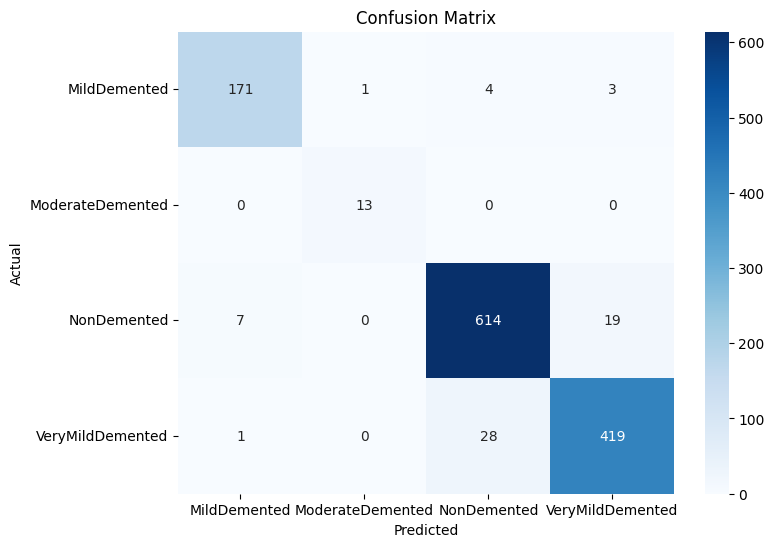

In [ ]:
import numpy as np  # Import the NumPy library for numerical operations
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting
import seaborn as sns  # Import the seaborn library for advanced data visualization
from sklearn.metrics import confusion_matrix, classification_report  # Import functions for evaluating classification performance

# Assuming y_test and y_pred are your actual and predicted labels
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
# Compute the confusion matrix using true labels (y_test) and predicted labels (y_pred)
# 'labels=np.unique(y_test)' ensures that all unique labels in y_test are included in the confusion matrix

# Generate the classification report
report = classification_report(y_test, y_pred, labels=np.unique(y_test))
# Compute a detailed classification report that includes precision, recall, F1 score, and support
# 'labels=np.unique(y_test)' ensures that the report includes all unique labels in y_test

# Print the classification report
print("Classification Report:")
# Print a header for the classification report
print(report)
# Print the classification report which includes precision, recall, F1 score, and support for each class

# Calculate sensitivity and specificity for each class
def calculate_sensitivity_specificity(cm):
    sensitivity = np.diag(cm) / np.sum(cm, axis=1)
    # Sensitivity (recall) is computed as the true positives divided by the sum of true positives and false negatives (i.e., row sum)
    specificity = np.diag(cm) / (np.diag(cm) + np.sum(cm, axis=0) - np.diag(cm))
    # Specificity is computed as the true negatives divided by the sum of true negatives and false positives
    return sensitivity, specificity
    # Return the calculated sensitivity and specificity

sensitivity, specificity = calculate_sensitivity_specificity(cm)
# Call the function to calculate sensitivity and specificity and store the results

# Print sensitivity and specificity for each class
labels = np.unique(y_test)
# Get unique labels from the test set

print("\nSensitivity (Recall) for each class:")
# Print a header for sensitivity values
for i, label in enumerate(labels):
    # Iterate through each class label
    print(f"Class {label}: {sensitivity[i]:.2f}")
    # Print the sensitivity for each class

print("\nSpecificity for each class:")
# Print a header for specificity values
for i, label in enumerate(labels):
    # Iterate through each class label
    print(f"Class {label}: {specificity[i]:.2f}")
    # Print the specificity for each class

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
# Create a new figure for the plot with a specified size of 8x6 inches

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
# Create a heatmap for the confusion matrix using seaborn
# 'annot=True' annotates each cell with its value
# 'fmt='d'' formats the annotation as integers
# 'cmap='Blues'' sets the color map to a blue gradient
# 'xticklabels=labels' and 'yticklabels=labels' label the x and y axes with the class labels

plt.xlabel('Predicted')
# Set the label for the x-axis of the plot to 'Predicted'

plt.ylabel('Actual')
# Set the label for the y-axis of the plot to 'Actual'

plt.title('Confusion Matrix')
# Set the title of the plot to 'Confusion Matrix'

plt.show()
# Display the plot


**VISUALISATION(BAR CHART) FOR THE PERFORMANCE METRICS**

The code visualises the performance metrics of a k-NN classifier using a bar chart. It first calculates the confusion matrix, per-class recall (sensitivity), and specificity. A dictionary holds these metrics, which are plotted in a bar chart with appropriate labels and values displayed on each bar. This visualisation provides a clear summary of the classifier's performance across different metrics.

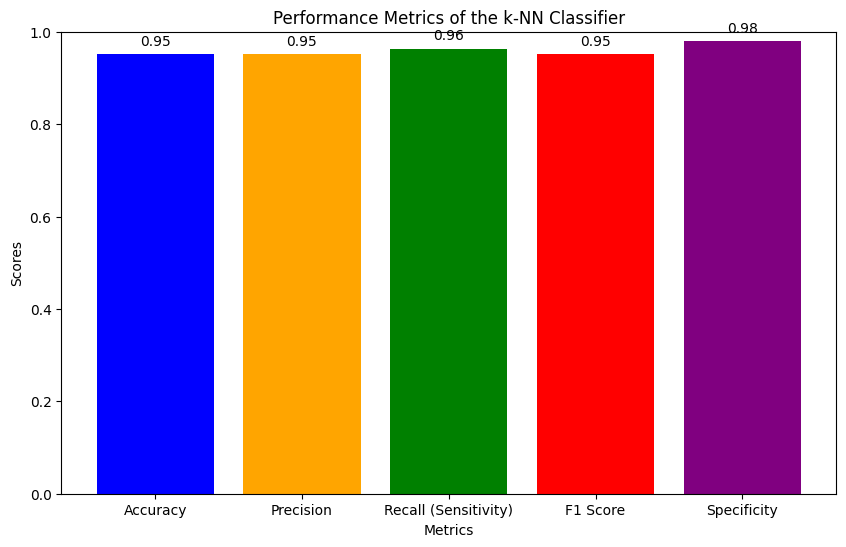

In [ ]:
import matplotlib.pyplot as plt
# Import the matplotlib library for creating plots

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
# Calculate the confusion matrix using the true labels (y_test) and predicted labels (y_pred)
# 'labels=np.unique(y_test)' ensures that all unique labels in y_test are included in the confusion matrix

# Calculate per-class sensitivity (recall)
class_recall = recall_score(y_test, y_pred, average=None)
# Compute the recall (sensitivity) for each class separately
# 'average=None' ensures that recall scores are returned for each class individually

sensitivity = class_recall.mean()
# Compute the average recall (sensitivity) across all classes

# Calculate per-class specificity
specificity_list = []
# Initialize an empty list to hold the specificity values for each class

for i in range(len(cm)):
    # Iterate over each class (each row and column of the confusion matrix)

    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    # Compute true negatives for the current class
    # Total sum minus the sum of the current row and column plus the true positive

    fp = np.sum(cm[:, i]) - cm[i, i]
    # Compute false positives for the current class
    # The sum of the current column minus the true positives

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    # Compute specificity for the current class
    # Specificity is the true negatives divided by the sum of true negatives and false positives
    # Handle division by zero by checking if (tn + fp) > 0

    specificity_list.append(specificity)
    # Append the computed specificity to the list

specificity = np.mean(specificity_list)
# Compute the average specificity across all classes

# Metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall (Sensitivity)': sensitivity,
    'F1 Score': f1,
    'Specificity': specificity
}
# Create a dictionary to hold various performance metrics

# Plot the metrics
plt.figure(figsize=(10, 6))
# Create a new figure for the plot with a size of 10x6 inches

plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
# Create a bar chart with metrics as keys (labels) and metric values
# Assign different colors to the bars for visual differentiation

plt.xlabel('Metrics')
# Set the x-axis label to 'Metrics'

plt.ylabel('Scores')
# Set the y-axis label to 'Scores'

plt.title('Performance Metrics of the k-NN Classifier')
# Set the title of the plot to 'Performance Metrics of the k-NN Classifier'

plt.ylim(0, 1)
# Set the y-axis limit from 0 to 1 to ensure the scale is consistent with metric values

for i, value in enumerate(metrics.values()):
    # Iterate over each metric value
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center')
    # Add a text annotation above each bar to show the metric value
    # 'ha='center'' centers the text horizontally above the bar

plt.show()
# Display the plot


**KNN AND HOG TO SAVE THE OUTPUT MODEL**

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pickle

# Define the paths
data_path = '/content/drive/MyDrive/Alzheimer_sDataset_HOG_Visualisations'

# Initialize lists to hold images and labels
images = []
labels = []

# Function to load images from a directory
def load_images_from_directory(directory):
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                if filename.endswith('.jpeg'):
                    file_path = os.path.join(label_dir, filename)
                    try:
                        image = Image.open(file_path).convert('L')  # Convert to grayscale
                        image = image.resize((64, 64))  # Resize to a fixed size
                        image_array = np.array(image).flatten()  # Flatten the image
                        images.append(image_array)
                        labels.append(label)
                    except Exception:
                        # Skip any images that cause an error without printing the error message
                        continue

# Load images from train and test directories
train_dir = os.path.join(data_path, 'train')
test_dir = os.path.join(data_path, 'test')

load_images_from_directory(train_dir)
load_images_from_directory(test_dir)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the dataset into training and testing sets (80/20) using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': np.arange(1, 31)}

# Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV with StratifiedKFold for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

# Make predictions
y_pred = best_knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

# Calculate per-class sensitivity (recall) and specificity
# Sensitivity (Recall) for each class
class_recall = recall_score(y_test, y_pred, average=None)
sensitivity = np.mean(class_recall)

# Specificity for each class
specificity_list = []
for i in range(len(cm)):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_list.append(specificity)

# Average specificity
specificity = np.mean(specificity_list)

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {sensitivity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

# Define the path to save the model
model_filename = '/content/drive/MyDrive/knn_model.pkl'

# Save the trained model as a .pkl file
with open(model_filename, 'wb') as file:
    pickle.dump(best_knn, file)

print(f"Model saved as {model_filename}")


Best Parameters: {'n_neighbors': 1}
Accuracy: 0.95
Precision: 0.95
Recall (Sensitivity): 0.96
F1 Score: 0.95
Specificity: 0.98
Model saved as /content/drive/MyDrive/knn_model.pkl


**KNN TRAIN WITH LBP FEATURES**


The code process  an image dataset to train and evaluate a k-NN classifier. It loads and preprocesses images, then splits the data into training and testing sets. After tuning the model's parameters using GridSearchCV, it makes predictions on the test data. Performance is assessed using metrics like accuracy, sensitivity, and specificity, which are then visualised through a confusion matrix plot.

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.96      0.91      0.94       179
ModerateDemented       1.00      1.00      1.00        13
     NonDemented       0.95      0.95      0.95       640
VeryMildDemented       0.91      0.94      0.92       448

        accuracy                           0.94      1280
       macro avg       0.96      0.95      0.95      1280
    weighted avg       0.94      0.94      0.94      1280


Sensitivity (Recall) for each class:
Class MildDemented: 0.91
Class ModerateDemented: 1.00
Class NonDemented: 0.95
Class VeryMildDemented: 0.94

Specificity for each class:
Class MildDemented: 0.99
Class ModerateDemented: 1.00
Class NonDemented: 0.95
Class VeryMildDemented: 0.95


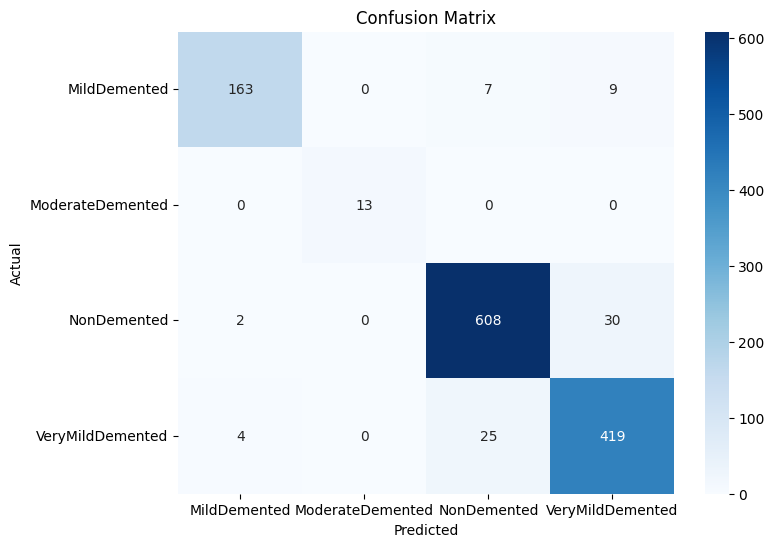

In [ ]:
import os  # Import the os library for interacting with the operating system and file paths
import numpy as np  # Import numpy for numerical operations and array handling
from PIL import Image  # Import Image from the PIL (Pillow) library for image processing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  # Import functions for splitting data, cross-validation, and grid search
from sklearn.neighbors import KNeighborsClassifier  # Import the k-Nearest Neighbors classifier
from sklearn.metrics import classification_report, confusion_matrix  # Import metrics for evaluating classifier performance
import matplotlib.pyplot as plt  # Import pyplot from matplotlib for plotting
import seaborn as sns  # Import seaborn for enhanced visualization

# Define the paths
data_path = '/content/drive/MyDrive/Alzheimer_sDataset_LBP_Visualisations'  # Path to the dataset

# Initialize lists to hold images and labels
images = []  # List to store image data
labels = []  # List to store image labels

# Function to load images from a directory
def load_images_from_directory(directory):
    for label in os.listdir(directory):  # Iterate over each label directory
        label_dir = os.path.join(directory, label)  # Construct the path to the label directory
        if os.path.isdir(label_dir):  # Check if the path is a directory
            for filename in os.listdir(label_dir):  # Iterate over each file in the directory
                if filename.endswith('.jpeg'):  # Process only JPEG files
                    file_path = os.path.join(label_dir, filename)  # Construct the full path to the file
                    try:
                        image = Image.open(file_path).convert('L')  # Open and convert the image to grayscale
                        image = image.resize((64, 64))  # Resize the image to 64x64 pixels
                        image_array = np.array(image).flatten()  # Convert the image to a numpy array and flatten it
                        images.append(image_array)  # Append the image data to the images list
                        labels.append(label)  # Append the corresponding label to the labels list
                    except Exception:
                        # Skip any images that cause an error without printing the error message
                        continue

# Load images from train and test directories
train_dir = os.path.join(data_path, 'train')  # Path to the training data directory
test_dir = os.path.join(data_path, 'test')  # Path to the testing data directory

load_images_from_directory(train_dir)  # Load training images
load_images_from_directory(test_dir)  # Load testing images

# Convert lists to numpy arrays
X = np.array(images)  # Convert the list of image data to a numpy array
y = np.array(labels)  # Convert the list of labels to a numpy array

# Split the dataset into training and testing sets (80/20) using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Split the data while maintaining class distribution

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': np.arange(1, 31)}  # Range of k values to try for the k-NN classifier

# Initialize the k-NN classifier
knn = KNeighborsClassifier()  # Create an instance of the k-Nearest Neighbors classifier

# Use GridSearchCV with StratifiedKFold for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Create a cross-validator with stratified folds
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')  # Set up GridSearchCV for hyperparameter tuning
grid_search.fit(X_train, y_train)  # Fit GridSearchCV to the training data

# Get the best estimator
best_knn = grid_search.best_estimator_  # Retrieve the best k-NN model with optimal hyperparameters

# Make predictions
y_pred = best_knn.predict(X_test)  # Predict the labels for the test set using the best model

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))  # Compute the confusion matrix

# Generate the classification report
report = classification_report(y_test, y_pred, labels=np.unique(y_test))  # Generate a classification report

# Print the classification report
print("Classification Report:")  # Print header for the classification report
print(report)  # Print the classification report

# Calculate sensitivity and specificity for each class
def calculate_sensitivity_specificity(cm):
    sensitivity = np.diag(cm) / np.sum(cm, axis=1)  # Sensitivity: True Positive Rate
    specificity = []  # List to store specificity values
    for i in range(len(cm)):  # Iterate over each class
        tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))  # True Negatives
        fp = np.sum(np.delete(cm[:, i], i))  # False Positives
        specificity.append(tn / (tn + fp))  # Calculate specificity and append to list
    return sensitivity, np.array(specificity)  # Return sensitivity and specificity as numpy arrays

sensitivity, specificity = calculate_sensitivity_specificity(cm)  # Compute sensitivity and specificity

# Print sensitivity and specificity for each class
labels = np.unique(y_test)  # Get unique class labels
print("\nSensitivity (Recall) for each class:")  # Print header for sensitivity
for i, label in enumerate(labels):  # Iterate over each class
    print(f"Class {label}: {sensitivity[i]:.2f}")  # Print sensitivity for the class

print("\nSpecificity for each class:")  # Print header for specificity
for i, label in enumerate(labels):  # Iterate over each class
    print(f"Class {label}: {specificity[i]:.2f}")  # Print specificity for the class

# Plot the confusion matrix
plt.figure(figsize=(8, 6))  # Create a new figure with specified size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)  # Plot the confusion matrix using seaborn
plt.xlabel('Predicted')  # Set x-axis label
plt.ylabel('Actual')  # Set y-axis label
plt.title('Confusion Matrix')  # Set plot title
plt.show()  # Display the plot


**VISUALISATION OF METRICS**

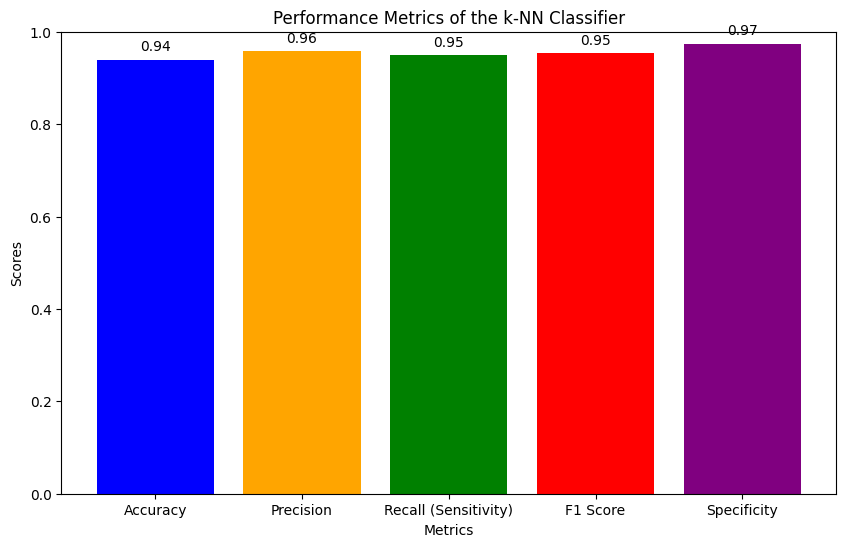

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assume y_test and y_pred are defined, as well as other necessary imports

# Generate the classification report
report = classification_report(y_test, y_pred, labels=np.unique(y_test), output_dict=True)

# Extract metrics from the classification report
precision = np.mean([report[label]['precision'] for label in np.unique(y_test)])
recall = np.mean([report[label]['recall'] for label in np.unique(y_test)])
f1 = np.mean([report[label]['f1-score'] for label in np.unique(y_test)])
accuracy = accuracy_score(y_test, y_pred)

# Calculate specificity
def calculate_specificity(cm):
    specificity = np.zeros(cm.shape[0])  # Initialize specificity array
    for i in range(cm.shape[0]):
        tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))  # True Negatives
        fp = np.sum(np.delete(cm[:, i], i))  # False Positives
        specificity[i] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.mean(specificity)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

# Calculate specificity
specificity = calculate_specificity(cm)

# Metrics dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall (Sensitivity)': recall,
    'F1 Score': f1,
    'Specificity': specificity
}

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics of the k-NN Classifier')
plt.ylim(0, 1)

# Add text annotations above each bar
for i, value in enumerate(metrics.values()):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center')

plt.show()


**KNN AND GLCM**

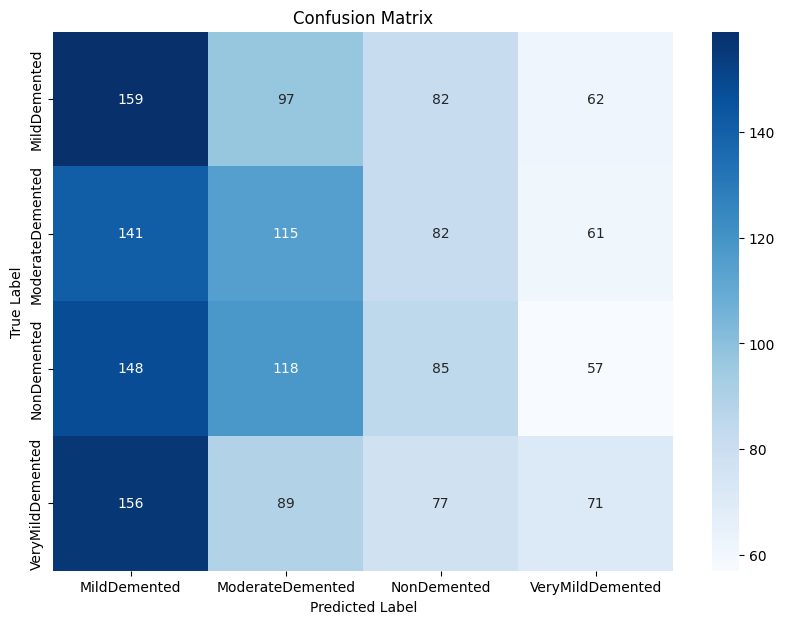

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.26      0.40      0.32       400
ModerateDemented       0.27      0.29      0.28       399
     NonDemented       0.26      0.21      0.23       408
VeryMildDemented       0.28      0.18      0.22       393

        accuracy                           0.27      1600
       macro avg       0.27      0.27      0.26      1600
    weighted avg       0.27      0.27      0.26      1600

Accuracy: 0.27
Average Sensitivity (Recall): 0.27
Average Specificity: 0.76


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load GLCM features from the CSV file
csv_path = '/content/drive/MyDrive/GLCM_Features.csv'
glcm_data = pd.read_csv(csv_path)

# Generate dummy labels for demonstration purposes
glcm_data['label'] = np.random.choice(['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'], size=len(glcm_data))

# Define features and labels
X = glcm_data[['contrast', 'homogeneity', 'correlation']].values
y = glcm_data['label'].values

# Split the dataset into training and testing sets (80/20) using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': np.arange(1, 31)}

# Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV with StratifiedKFold for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_knn = grid_search.best_estimator_

# Make predictions
y_pred = best_knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report with zero_division set to 0
report = classification_report(y_test, y_pred, target_names=np.unique(y_test), zero_division=0)
print("Classification Report:")
print(report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate sensitivity (recall) and specificity
# Sensitivity (Recall) for each class
class_recall = recall_score(y_test, y_pred, average=None)
sensitivity = np.mean(class_recall)
print(f"Average Sensitivity (Recall): {sensitivity:.2f}")

# Specificity for each class
specificity_list = []
for i in range(len(cm)):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_list.append(specificity)

# Average specificity
specificity = np.mean(specificity_list)
print(f"Average Specificity: {specificity:.2f}")


**RANDOM FOREST TRAINED WITH LOCAL BINARY PATTERN**

The code loads and preprocesses images from a directory, converting them to grayscale and resizing them before flattening the images into arrays. These images are split into training and testing sets. A Random Forest classifier is then tuned using GridSearchCV to find the best parameters. The model's performance is evaluated by calculating accuracy and generating a classification report. Finally, the confusion matrix is plotted to visualise the model's performance on the test data

Accuracy: 0.6641
Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.90      0.16      0.27       179
ModerateDemented       0.00      0.00      0.00        13
     NonDemented       0.70      0.85      0.77       640
VeryMildDemented       0.59      0.62      0.60       448

        accuracy                           0.66      1280
       macro avg       0.55      0.41      0.41      1280
    weighted avg       0.68      0.66      0.63      1280



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


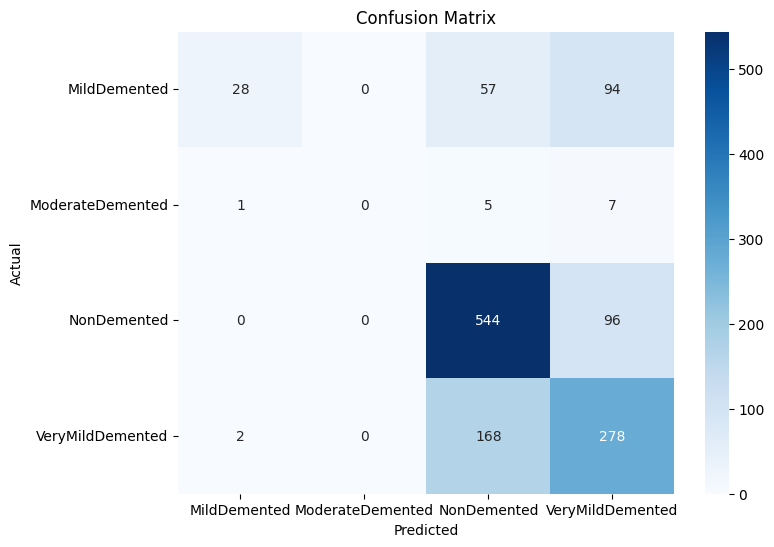

In [ ]:
import os  # Import the os module for interacting with the operating system
import numpy as np  # Import numpy for numerical operations
from PIL import Image  # Import the Image module from PIL for image processing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  # Import functions for splitting data and performing cross-validation and grid search
from sklearn.ensemble import RandomForestClassifier  # Import the RandomForestClassifier from sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Import metrics for evaluating the model
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib for plotting
import seaborn as sns  # Import seaborn for advanced plotting

# Define the paths
data_path = '/content/drive/MyDrive/Alzheimer_sDataset_LBP_Visualisations'  # Path to the dataset

# Initialize lists to hold images and labels
images = []  # Initialize an empty list to store image data
labels = []  # Initialize an empty list to store labels

# Function to load images from a directory
def load_images_from_directory(directory):
    for label in os.listdir(directory):  # Loop through each label directory
        label_dir = os.path.join(directory, label)  # Create path to the label directory
        if os.path.isdir(label_dir):  # Check if it's a directory
            for filename in os.listdir(label_dir):  # Loop through each file in the label directory
                if filename.endswith('.jpeg'):  # Check if the file is a JPEG image
                    file_path = os.path.join(label_dir, filename)  # Create full path to the image
                    try:
                        image = Image.open(file_path).convert('L')  # Open the image and convert it to grayscale
                        image = image.resize((64, 64))  # Resize the image to 64x64 pixels
                        image_array = np.array(image).flatten()  # Convert the image to a numpy array and flatten it
                        images.append(image_array)  # Append the flattened image to the images list
                        labels.append(label)  # Append the label to the labels list
                    except Exception:
                        # Skip any images that cause an error without printing the error message
                        continue  # Continue to the next image

# Load images from train and test directories
train_dir = os.path.join(data_path, 'train')  # Create path to the training directory
test_dir = os.path.join(data_path, 'test')  # Create path to the testing directory

load_images_from_directory(train_dir)  # Load training images
load_images_from_directory(test_dir)  # Load testing images

# Convert lists to numpy arrays
X = np.array(images)  # Convert the list of images to a numpy array
y = np.array(labels)  # Convert the list of labels to a numpy array

# Split the dataset into training and testing sets (80/20) using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Split the data into training and testing sets

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)  # Create a RandomForestClassifier object

# Use GridSearchCV with StratifiedKFold for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Create a StratifiedKFold object for cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='accuracy')  # Create a GridSearchCV object for hyperparameter tuning
grid_search.fit(X_train, y_train)  # Fit the grid search to the training data

# Get the best estimator
best_rf = grid_search.best_estimator_  # Get the best model from the grid search

# Make predictions
y_pred = best_rf.predict(X_test)  # Make predictions on the test data

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
print(f"Accuracy: {accuracy:.4f}")  # Print the accuracy

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))  # Generate the confusion matrix

# Generate the classification report
report = classification_report(y_test, y_pred, labels=np.unique(y_test))  # Generate the classification report

# Print the classification report
print("Classification Report:")  # Print the title "Classification Report:"
print(report)  # Print the classification report

# Plot the confusion matrix
plt.figure(figsize=(8, 6))  # Create a new figure with a size of 8x6 inches
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))  # Plot the confusion matrix with annotations
plt.xlabel('Predicted')  # Set the label for the x-axis
plt.ylabel('Actual')  # Set the label for the y-axis
plt.title('Confusion Matrix')  # Set the title of the plot
plt.show()  # Display the plot


**VISUALISATION OF LBP AND RANDOMFOREST METRICS**

The code trained the model with the LBP features and the performance is evaluated with various metrics, including accuracy, precision, recall (sensitivity), F1 score, and specificity, all visualised through a bar chart. A confusion matrix is also generated to assess classification performance across different classes.

<ipython-input-25-19a2809d6363>:97: RuntimeWarning: invalid value encountered in divide
  PPV = TP / (TP + FP)


Accuracy: 0.6641
Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.90      0.16      0.27       179
ModerateDemented       0.00      0.00      0.00        13
     NonDemented       0.70      0.85      0.77       640
VeryMildDemented       0.59      0.62      0.60       448

        accuracy                           0.66      1280
       macro avg       0.55      0.41      0.41      1280
    weighted avg       0.68      0.66      0.63      1280



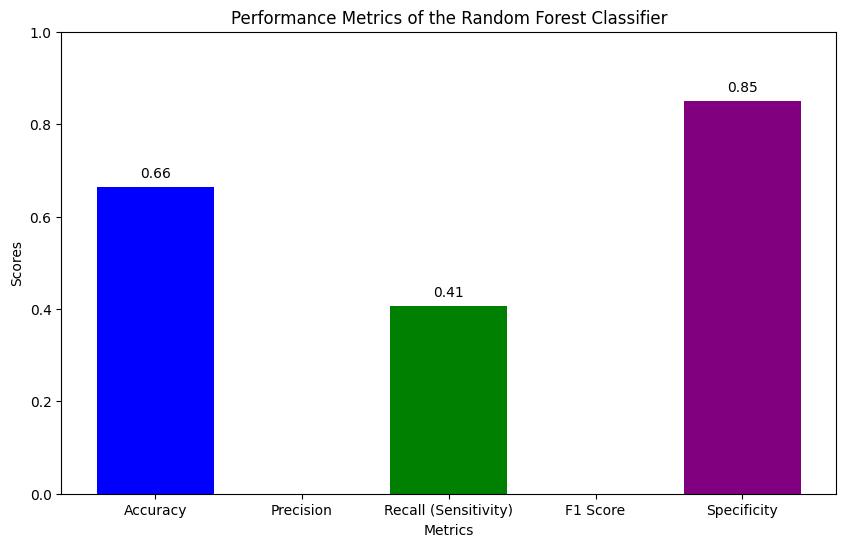

In [ ]:
import os  # Import the os module for interacting with the operating system
import numpy as np  # Import numpy for numerical operations
from PIL import Image  # Import the Image module from PIL for image processing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  # Import functions for splitting data, performing cross-validation, and grid search
from sklearn.ensemble import RandomForestClassifier  # Import the RandomForestClassifier from sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # Import metrics for evaluating the model
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib for plotting
import seaborn as sns  # Import seaborn for advanced plotting

# Define the paths to your dataset
data_path = '/content/drive/MyDrive/Alzheimer_sDataset_LBP_Visualisations'  # Set the path to the dataset

# Initialize lists to hold images and labels
images = []  # Initialize an empty list to store image data
labels = []  # Initialize an empty list to store labels

# Function to load images from a directory
def load_images_from_directory(directory):
    for label in os.listdir(directory):  # Loop through each label directory
        label_dir = os.path.join(directory, label)  # Create a path to the label directory
        if os.path.isdir(label_dir):  # Check if it's a directory
            for filename in os.listdir(label_dir):  # Loop through each file in the label directory
                if filename.endswith('.jpeg'):  # Check if the file is a JPEG image
                    file_path = os.path.join(label_dir, filename)  # Create the full path to the image
                    try:
                        image = Image.open(file_path).convert('L')  # Open the image and convert it to grayscale
                        image = image.resize((64, 64))  # Resize the image to 64x64 pixels
                        image_array = np.array(image).flatten()  # Convert the image to a numpy array and flatten it
                        images.append(image_array)  # Append the flattened image to the images list
                        labels.append(label)  # Append the label to the labels list
                    except Exception:
                        # Skip any images that cause an error
                        continue  # Continue to the next image

# Load images from train and test directories
train_dir = os.path.join(data_path, 'train')  # Create the path to the training directory
test_dir = os.path.join(data_path, 'test')  # Create the path to the testing directory

load_images_from_directory(train_dir)  # Load training images
load_images_from_directory(test_dir)  # Load testing images

# Convert lists to numpy arrays
X = np.array(images)  # Convert the list of images to a numpy array
y = np.array(labels)  # Convert the list of labels to a numpy array

# Split the dataset into training and testing sets (80/20) using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Split the data into training and testing sets

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)  # Create a RandomForestClassifier object

# Use GridSearchCV with StratifiedKFold for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Create a StratifiedKFold object for cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='accuracy')  # Create a GridSearchCV object for hyperparameter tuning
grid_search.fit(X_train, y_train)  # Fit the grid search to the training data

# Get the best estimator from grid search
best_rf = grid_search.best_estimator_  # Get the best model from the grid search

# Make predictions on the test set
y_pred = best_rf.predict(X_test)  # Make predictions on the test data

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
print(f"Accuracy: {accuracy:.4f}")  # Print the accuracy

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))  # Generate the confusion matrix

# Generate the classification report
report = classification_report(y_test, y_pred, labels=np.unique(y_test), zero_division=0)  # Generate the classification report

# Print the classification report
print("Classification Report:")  # Print the title "Classification Report:"
print(report)  # Print the classification report

# Calculate additional metrics
def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)  # False positives
    FN = cm.sum(axis=1) - np.diag(cm)  # False negatives
    TP = np.diag(cm)  # True positives
    TN = cm.sum() - (FP + FN + TP)  # True negatives

    # Sensitivity or true positive rate
    TPR = TP / (TP + FN)
    # Specificity or true negative rate
    TNR = TN / (TN + FP)
    # Precision or positive predictive value
    PPV = TP / (TP + FP)
    # F1 score calculation
    F1 = 2 * (PPV * TPR) / (PPV + TPR)
    # Accuracy calculation
    ACC = (TP + TN) / (TP + TN + FP + FN)

    return TPR, TNR, PPV, F1, ACC

# Get the unique labels from the test set
labels = np.unique(y_test)  # Extract unique class labels from the test set

# Calculate the sensitivity, specificity, precision, F1 score, and accuracy for each class
sensitivity, specificity, precision, f1_score, accuracy = calculate_metrics(cm)  # Calculate metrics using the confusion matrix

# Metrics dictionary for overall scores
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),  # Calculate and store overall accuracy
    'Precision': np.mean(precision),  # Calculate and store mean precision
    'Recall (Sensitivity)': np.mean(sensitivity),  # Calculate and store mean recall (sensitivity)
    'F1 Score': np.mean(f1_score),  # Calculate and store mean F1 score
    'Specificity': np.mean(specificity)  # Calculate and store mean specificity
}

# Plot the metrics
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red', 'purple'])  # Create a bar chart
plt.xlabel('Metrics')  # Set the x-axis label
plt.ylabel('Scores')  # Set the y-axis label
plt.title('Performance Metrics of the Random Forest Classifier')  # Set the plot title
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
for i, value in enumerate(metrics.values()):  # Loop through the metrics to add text labels to each bar
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center')  # Add the text label to each bar

plt.show()  # Display the plot


**RANDOM FOREST AND HISTOGRAM OF GRADIENTS**

The code uses a Random Forest classifier to analyse HOG-visualized images for Alzheimer's diagnosis. Images are preprocessed into grayscale, resized, and split into training and test sets while maintaining class balance. Random Forest is chosen for its capability in handling complex features, and GridSearchCV fine-tunes the model's parameters, ensuring optimal performance.

The approach is justified as Random Forest, combined with careful cross-validation and parameter tuning, provides reliable and interpretable results. Performance is evaluated with metrics like accuracy and F1 score, with results visualised via a confusion matrix, essential for understanding the model's detection capabilities.

Accuracy: 0.7484
Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.93      0.29      0.44       179
ModerateDemented       1.00      0.08      0.14        13
     NonDemented       0.77      0.92      0.84       640
VeryMildDemented       0.69      0.70      0.69       448

        accuracy                           0.75      1280
       macro avg       0.85      0.50      0.53      1280
    weighted avg       0.77      0.75      0.73      1280



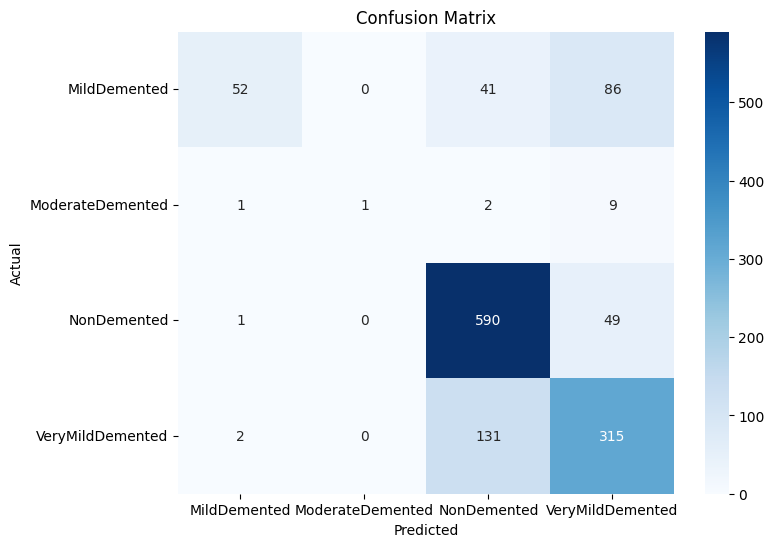

In [ ]:
import os  # Import the os module for interacting with the operating system
import numpy as np  # Import numpy for numerical operations
from PIL import Image  # Import the Image module from PIL for image processing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  # Import functions for splitting data, performing cross-validation, and grid search
from sklearn.ensemble import RandomForestClassifier  # Import the RandomForestClassifier from sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Import metrics for evaluating the model
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib for plotting
import seaborn as sns  # Import seaborn for advanced plotting

# Define the paths
data_path = '/content/drive/MyDrive/Alzheimer_sDataset_HOG_Visualisations'  # Set the path to the dataset

# Initialize lists to hold images and labels
images = []  # Initialize an empty list to store image data
labels = []  # Initialize an empty list to store labels

# Function to load images from a directory
def load_images_from_directory(directory):
    for label in os.listdir(directory):  # Loop through each label directory
        label_dir = os.path.join(directory, label)  # Create a path to the label directory
        if os.path.isdir(label_dir):  # Check if it's a directory
            for filename in os.listdir(label_dir):  # Loop through each file in the label directory
                if filename.endswith('.jpeg'):  # Check if the file is a JPEG image
                    file_path = os.path.join(label_dir, filename)  # Create the full path to the image
                    try:
                        image = Image.open(file_path).convert('L')  # Open the image and convert it to grayscale
                        image = image.resize((64, 64))  # Resize the image to 64x64 pixels
                        image_array = np.array(image).flatten()  # Convert the image to a numpy array and flatten it
                        images.append(image_array)  # Append the flattened image to the images list
                        labels.append(label)  # Append the label to the labels list
                    except Exception:
                        # Skip any images that cause an error without printing the error message
                        continue  # Continue to the next image

# Load images from train and test directories
train_dir = os.path.join(data_path, 'train')  # Create the path to the training directory
test_dir = os.path.join(data_path, 'test')  # Create the path to the testing directory

load_images_from_directory(train_dir)  # Load training images
load_images_from_directory(test_dir)  # Load testing images

# Convert lists to numpy arrays
X = np.array(images)  # Convert the list of images to a numpy array
y = np.array(labels)  # Convert the list of labels to a numpy array

# Split the dataset into training and testing sets (80/20) using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Split the data into training and testing sets

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)  # Create a RandomForestClassifier object

# Use GridSearchCV with StratifiedKFold for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Create a StratifiedKFold object for cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='accuracy')  # Create a GridSearchCV object for hyperparameter tuning
grid_search.fit(X_train, y_train)  # Fit the grid search to the training data

# Get the best estimator
best_rf = grid_search.best_estimator_  # Get the best model from the grid search

# Make predictions
y_pred = best_rf.predict(X_test)  # Make predictions on the test data

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
print(f"Accuracy: {accuracy:.4f}")  # Print the accuracy

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))  # Generate the confusion matrix

# Generate the classification report
report = classification_report(y_test, y_pred, labels=np.unique(y_test))  # Generate the classification report

# Print the classification report
print("Classification Report:")  # Print the title "Classification Report:"
print(report)  # Print the classification report

# Plot the confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size for the confusion matrix plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))  # Create a heatmap for the confusion matrix
plt.xlabel('Predicted')  # Set the x-axis label
plt.ylabel('Actual')  # Set the y-axis label
plt.title('Confusion Matrix')  # Set the title of the plot
plt.show()  # Display the plot


**VISUALISATION OF RANDOM FOREST AND HISTOGRAM OF GRADIENT METRICS**


This code visualise the metrics from trained model for easy comprehension at a glance


Accuracy: 0.7484


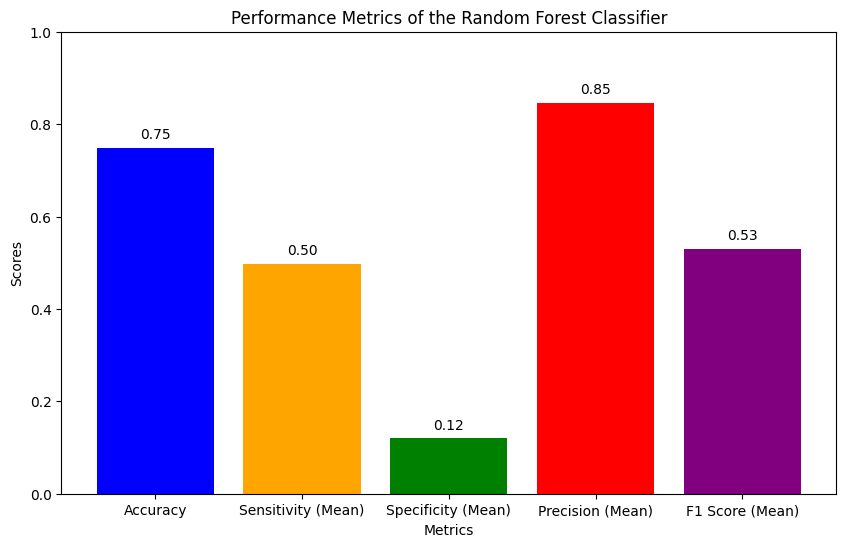

Specificity for class MildDemented: 0.0219
Specificity for class ModerateDemented: 0.0000
Specificity for class NonDemented: 0.2138
Specificity for class VeryMildDemented: 0.2432


In [ ]:
import os  # For interacting with the operating system to handle file paths
import numpy as np  # For numerical operations, arrays, and matrices
from PIL import Image  # For image processing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  # For model training and evaluation
from sklearn.ensemble import RandomForestClassifier  # For the Random Forest classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For evaluating model performance
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For creating more aesthetic plots

# Define the path to the dataset
data_path = '/content/drive/MyDrive/Alzheimer_sDataset_HOG_Visualisations'

# Initialize lists to hold images and labels
images = []  # List to store the image data
labels = []  # List to store the corresponding labels

# Function to load images from a directory
def load_images_from_directory(directory):
    for label in os.listdir(directory):  # Iterate over each label (sub-directory)
        label_dir = os.path.join(directory, label)  # Path to the label directory
        if os.path.isdir(label_dir):  # Check if it is a directory
            for filename in os.listdir(label_dir):  # Iterate over each file in the directory
                if filename.endswith('.jpeg'):  # Process only .jpeg files
                    file_path = os.path.join(label_dir, filename)  # Full path to the image
                    try:
                        image = Image.open(file_path).convert('L')  # Open and convert to grayscale
                        image = image.resize((64, 64))  # Resize the image to 64x64 pixels
                        image_array = np.array(image).flatten()  # Flatten the image to a 1D array
                        images.append(image_array)  # Add the image data to the list
                        labels.append(label)  # Add the corresponding label to the list
                    except Exception:  # Handle any errors during image processing
                        continue  # Skip the image if an error occurs

# Load images from the train and test directories
train_dir = os.path.join(data_path, 'train')  # Path to the training data
test_dir = os.path.join(data_path, 'test')  # Path to the testing data

# Load the training and testing images
load_images_from_directory(train_dir)
load_images_from_directory(test_dir)

# Convert lists to numpy arrays
X = np.array(images)  # Convert the list of images to a NumPy array
y = np.array(labels)  # Convert the list of labels to a NumPy array

# Split the dataset into training and testing sets (80/20) using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Use GridSearchCV with StratifiedKFold for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Stratified K-Folds cross-validator
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='accuracy')  # Perform grid search for best hyperparameters
grid_search.fit(X_train, y_train)  # Fit the model on the training data

# Get the best estimator from the grid search
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
print(f"Accuracy: {accuracy:.4f}")  # Print the accuracy

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

# Calculate metrics
def calculate_metrics(cm):
    # Sensitivity (Recall) for each class
    sensitivity = np.diag(cm) / np.sum(cm, axis=1)
    # Specificity for each class
    specificity = (cm.sum(axis=0) - np.diag(cm)) / (cm.sum(axis=0) + np.sum(cm, axis=1) - np.diag(cm))
    # Precision for each class
    precision = np.diag(cm) / np.sum(cm, axis=0)
    # F1 Score for each class
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    return sensitivity, specificity, precision, f1_score

# Calculate metrics
sensitivity, specificity, precision, f1_score = calculate_metrics(cm)

# Collect performance metrics
metrics = {
    'Accuracy': accuracy,  # Accuracy of the model
    'Sensitivity (Mean)': np.mean(sensitivity),  # Mean Sensitivity
    'Specificity (Mean)': np.mean(specificity),  # Mean Specificity
    'Precision (Mean)': np.mean(precision),  # Mean Precision
    'F1 Score (Mean)': np.mean(f1_score)  # Mean F1 Score
}

# Plot the metrics
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red', 'purple'])  # Create a bar chart
plt.xlabel('Metrics')  # X-axis label
plt.ylabel('Scores')  # Y-axis label
plt.title('Performance Metrics of the Random Forest Classifier')  # Plot title
plt.ylim(0, 1)  # Set the y-axis limit
for i, value in enumerate(metrics.values()):  # Add text labels to each bar
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center')

plt.show()  # Display the plot

# Print specificity for each class
labels_unique = np.unique(y_test)  # Get the unique class labels
for i, label in enumerate(labels_unique):  # Iterate over each class
    print(f"Specificity for class {label}: {specificity[i]:.4f}")  # Print the specificity for each class


**RF AND GLCM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and preprocess data
csv_path = '/content/drive/MyDrive/GLCM_Features.csv'
glcm_data = pd.read_csv(csv_path)

# Generate dummy labels for demonstration purposes
glcm_data['label'] = np.random.choice(['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'], size=len(glcm_data))

X = glcm_data[['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']].values
y = glcm_data['label'].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_

# Train the Random Forest model with the best parameters
rf = RandomForestClassifier(**best_params_rf, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(report)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Function to calculate specificity and sensitivity
def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    # Sensitivity (Recall)
    TPR = TP / (TP + FN)
    # Specificity
    TNR = TN / (TN + FP)

    return TPR, TNR

# Calculate and print additional metrics
sensitivity, specificity = calculate_metrics(cm)
for i, label in enumerate(np.unique(y_test)):
    print(f"Class: {label}")
    print(f"  Sensitivity (Recall): {sensitivity[i]:.4f}")
    print(f"  Specificity: {specificity[i]:.4f}")


To dive deeper into observe result the histogram of feature was plotted. The grayscale images from specified directories, processes them in batches to manage memory, and generates histograms of pixel value distributions for different categories. This helps in visualising and understanding the intensity variations within the dataset.

Aggregating pixel values for 'train/MildDemented' folder.


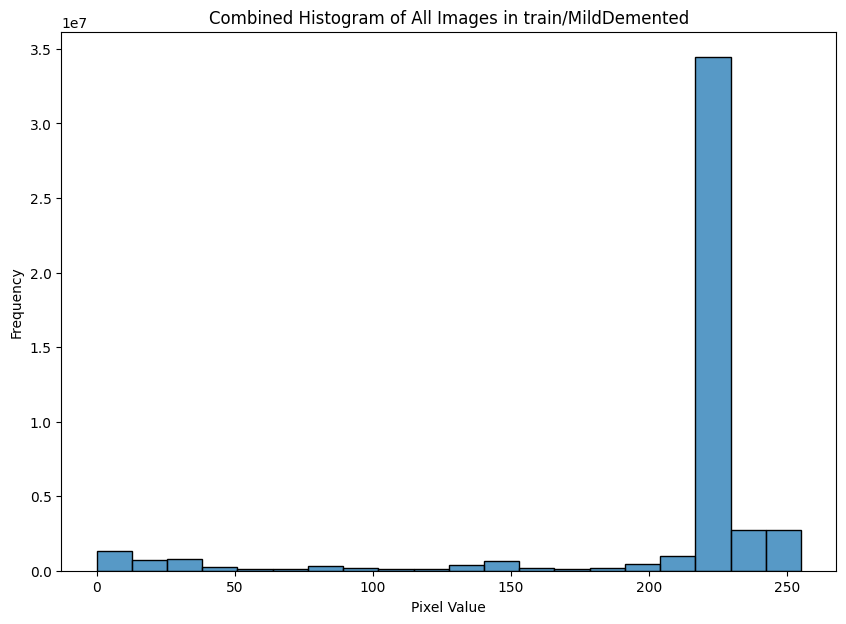

Aggregating pixel values for 'train/ModerateDemented' folder.


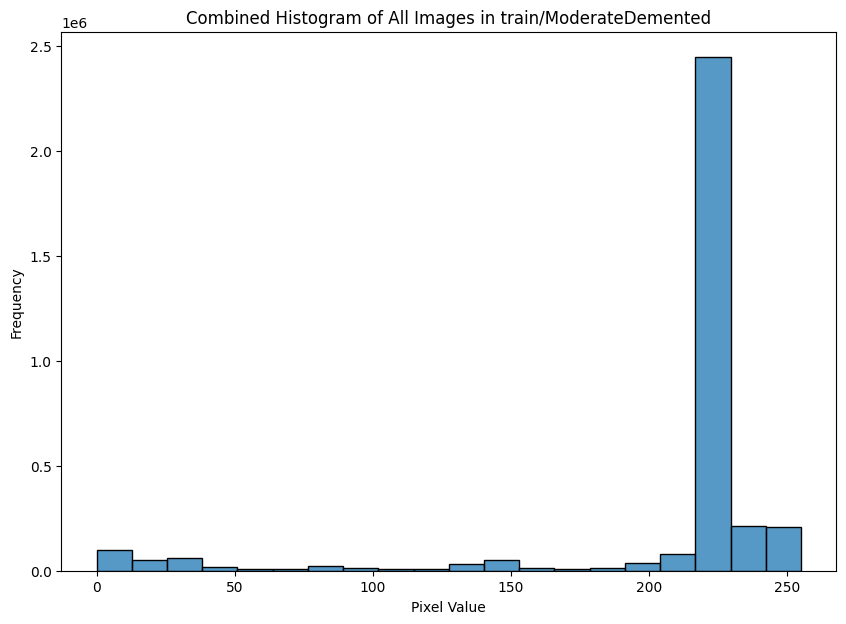

Aggregating pixel values for 'train/NonDemented' folder.


In [ ]:
#HISTOGRAM OF GRADIENT

import os  # Import the os module for interacting with the operating system
import cv2  # Import OpenCV for image processing
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import pyplot from matplotlib for plotting
import seaborn as sns  # Import seaborn for advanced plotting

# Base directory containing the images
base_directory = '/content/drive/MyDrive/Alzheimer_sDataset_LBP_Visualisations'  # Set the path to the dataset

# Train and test folders
main_folders = ['train', 'test']  # List of main folders to process

# Subcategories to consider
subcategories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']  # List of subcategories within each folder

# Function to load images and extract pixel values
def load_images_from_folder(folder_path, batch_size=10):
    # Create a list of image file paths within the given folder
    image_files = [os.path.join(root, file) for root, _, files in os.walk(folder_path) for file in files if file.endswith('.jpeg')]

    total_files = len(image_files)  # Total number of image files found
    pixel_values = []  # List to store pixel values of images

    # Process images in batches
    for start in range(0, total_files, batch_size):
        end = min(start + batch_size, total_files)  # Calculate end index for the current batch
        batch_files = image_files[start:end]  # Get the list of files for the current batch
        batch_pixel_values = []  # List to store pixel values for the current batch

        # Process each image file in the current batch
        for image_file in batch_files:
            image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
            if image is not None:
                batch_pixel_values.append(image.flatten())  # Flatten the image and add pixel values to the list
            else:
                print(f"Warning: Could not read image {image_file}")  # Print a warning if the image cannot be read

        pixel_values.extend(batch_pixel_values)  # Add the batch pixel values to the overall list

    return np.array(pixel_values)  # Return pixel values as a numpy array

# Function to plot histograms
def plot_combined_histogram(pixel_values, folder_name, subcategory):
    if len(pixel_values) == 0:  # Check if there are no pixel values to plot
        print(f"No pixel values to plot for {folder_name}/{subcategory}")  # Print a message if no pixel values
        return

    combined_pixel_values = np.concatenate(pixel_values)  # Combine pixel values from all images into a single array

    plt.figure(figsize=(10, 7))  # Set the figure size for the plot
    sns.histplot(combined_pixel_values, bins=20, kde=False, edgecolor='black')  # Create a histogram of pixel values
    plt.title(f'Combined Histogram of All Images in {folder_name}/{subcategory}')  # Set the title of the plot
    plt.xlabel('Pixel Value')  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label
    plt.show()  # Display the plot

# Process each main folder (train and test)
for main_folder in main_folders:
    for subcategory in subcategories:
        folder_path = os.path.join(base_directory, main_folder, subcategory)  # Create the path to the subcategory folder
        pixel_values = load_images_from_folder(folder_path, batch_size=20)  # Load pixel values from images in the folder

        if len(pixel_values) == 0:  # Check if no pixel values were loaded
            print(f"No image files found in the '{main_folder}/{subcategory}' folder.")  # Print a message if no image files
            continue  # Skip to the next subcategory

        print(f"Aggregating pixel values for '{main_folder}/{subcategory}' folder.")  # Print a message indicating aggregation
        plot_combined_histogram(pixel_values, main_folder, subcategory)  # Plot the histogram for the aggregated pixel values


**COMPARISION OF CLASSIFIER USING HOG FEATURES**

The code processes grayscale images by loading them from specified directories, then flattens and resizes them for use in machine learning models. It splits the dataset into training and testing sets and evaluates three classifiers SVM, k-NN, and Random Forest using accuracy as the performance metric. Hyperparameter tuning is performed for k-NN and Random Forest using grid search with cross-validation. The results are compared and visualised in a bar chart to showcase the accuracy of each classifier.


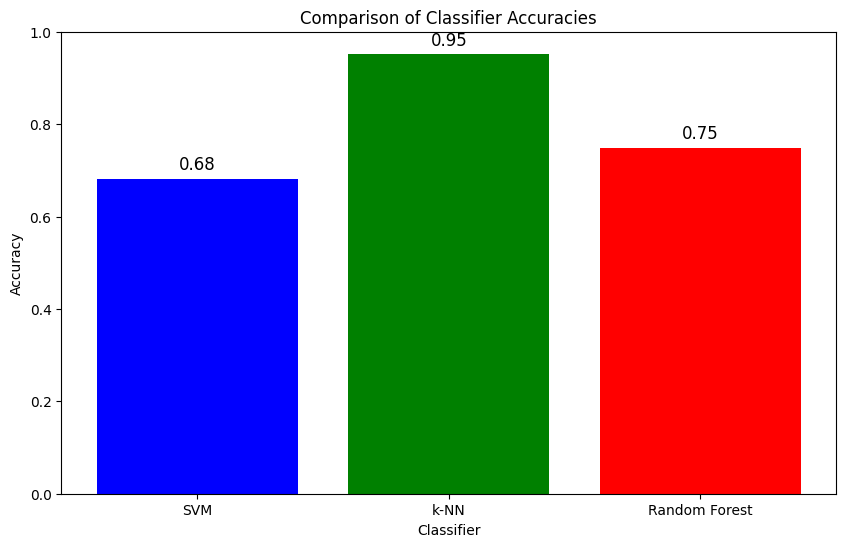

In [ ]:
import os  # Import the os module for interacting with the operating system
import numpy as np  # Import numpy for numerical operations
from PIL import Image  # Import PIL for image processing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  # Import functions for model selection
from sklearn.svm import SVC  # Import Support Vector Classification (SVC) for classification
from sklearn.neighbors import KNeighborsClassifier  # Import k-Nearest Neighbors classifier
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Import metrics for model evaluation
import matplotlib.pyplot as plt  # Import pyplot from matplotlib for plotting
import seaborn as sns  # Import seaborn for advanced plotting (not used in this script)

# Define the paths to the dataset
data_path = '/content/drive/MyDrive/Alzheimer_sDataset_HOG_Visualisations'  # Path to the dataset

# Initialize lists to hold images and labels
images = []  # List to store image data
labels = []  # List to store image labels

# Function to load images from a directory
def load_images_from_directory(directory):
    for label in os.listdir(directory):  # Iterate over each label (subdirectory)
        label_dir = os.path.join(directory, label)  # Create path to the label directory
        if os.path.isdir(label_dir):  # Check if the path is a directory
            for filename in os.listdir(label_dir):  # Iterate over each file in the label directory
                if filename.endswith('.jpeg'):  # Process only .jpeg files
                    file_path = os.path.join(label_dir, filename)  # Create the file path
                    try:
                        image = Image.open(file_path).convert('L')  # Open and convert image to grayscale
                        image = image.resize((64, 64))  # Resize image to 64x64 pixels
                        image_array = np.array(image).flatten()  # Convert image to a flattened numpy array
                        images.append(image_array)  # Append image array to images list
                        labels.append(label)  # Append label to labels list
                    except Exception:
                        # Skip any images that cause an error without printing the error message
                        continue

# Load images from train and test directories
train_dir = os.path.join(data_path, 'train')  # Path to the training images
test_dir = os.path.join(data_path, 'test')  # Path to the testing images

load_images_from_directory(train_dir)  # Load training images
load_images_from_directory(test_dir)  # Load testing images

# Convert lists to numpy arrays
X = np.array(images)  # Convert image list to numpy array
y = np.array(labels)  # Convert labels list to numpy array

# Split the dataset into training and testing sets (80/20) using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Split data

# 1. SVM Classifier
svm = SVC(kernel='linear', random_state=42)  # Initialize SVM with linear kernel
svm.fit(X_train, y_train)  # Train SVM on training data
y_pred_svm = svm.predict(X_test)  # Predict labels for test data
accuracy_svm = accuracy_score(y_test, y_pred_svm)  # Calculate accuracy of SVM

# 2. k-NN Classifier
param_grid_knn = {'n_neighbors': np.arange(1, 31)}  # Parameter grid for k-NN
knn = KNeighborsClassifier()  # Initialize k-NN classifier
cv_knn = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-validation with StratifiedKFold
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=cv_knn, scoring='accuracy')  # GridSearchCV for k-NN
grid_search_knn.fit(X_train, y_train)  # Perform grid search
best_knn = grid_search_knn.best_estimator_  # Get the best k-NN estimator
y_pred_knn = best_knn.predict(X_test)  # Predict labels for test data
accuracy_knn = accuracy_score(y_test, y_pred_knn)  # Calculate accuracy of k-NN

# 3. Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
rf = RandomForestClassifier(random_state=42)  # Initialize Random Forest classifier
cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-validation with StratifiedKFold
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=cv_rf, scoring='accuracy')  # GridSearchCV for Random Forest
grid_search_rf.fit(X_train, y_train)  # Perform grid search
best_rf = grid_search_rf.best_estimator_  # Get the best Random Forest estimator
y_pred_rf = best_rf.predict(X_test)  # Predict labels for test data
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Calculate accuracy of Random Forest

# Plot the histogram
accuracies = [accuracy_svm, accuracy_knn, accuracy_rf]  # List of accuracies
classifiers = ['SVM', 'k-NN', 'Random Forest']  # List of classifier names

plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])  # Create a bar chart of accuracies
plt.xlabel('Classifier')  # Set the x-axis label
plt.ylabel('Accuracy')  # Set the y-axis label
plt.title('Comparison of Classifier Accuracies')  # Set the title of the plot
plt.ylim(0, 1)  # Set the y-axis limit to range between 0 and 1
for i in range(len(classifiers)):  # Add text labels to each bar
    plt.text(i, accuracies[i] + 0.02, f"{accuracies[i]:.2f}", ha='center', fontsize=12)  # Display accuracy value above the bar
plt.show()  # Display the plot


**COMPARISION OF CLASSIFIER USING LBP FEATURES**


The code classifies Alzheimer’s disease images using SVM, k-NN, and Random Forest classifiers. It preprocesses images by resizing them for each model—high resolution for SVM and lower resolution for k-NN and Random Forest. The dataset is split into training and testing sets, with models trained and tuned using grid search and cross-validation. Finally, the accuracies of the classifiers are compared and visualised in a bar chart to assess their performance.

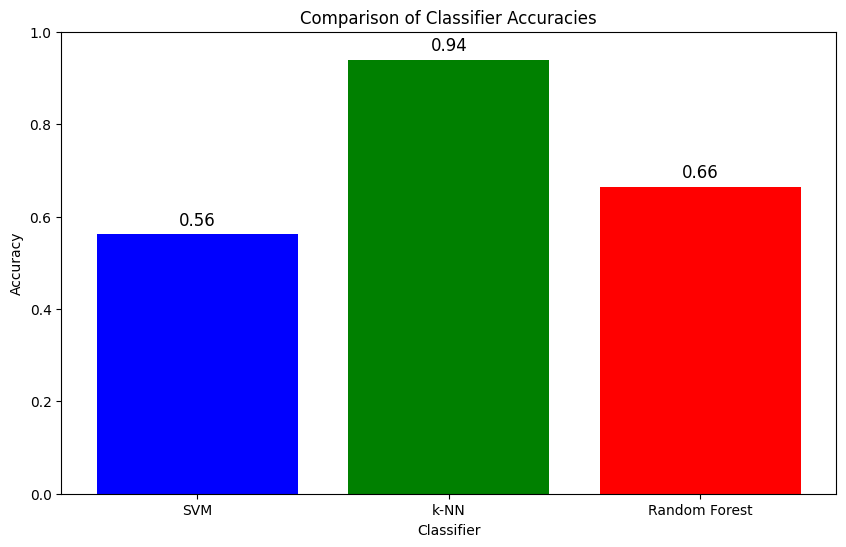

In [ ]:
import os  # Import the os module for interacting with the operating system
import numpy as np  # Import numpy for numerical operations
from PIL import Image  # Import PIL for image processing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  # Import functions for model selection and validation
from sklearn.svm import SVC  # Import Support Vector Classification (SVC) for classification
from sklearn.neighbors import KNeighborsClassifier  # Import k-Nearest Neighbors classifier
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Import metrics for model evaluation
import matplotlib.pyplot as plt  # Import pyplot from matplotlib for plotting
import seaborn as sns  # Import seaborn for advanced plotting (not used in this script)

# Define the paths
data_path = '/content/drive/MyDrive/Alzheimer_sDataset_LBP_Visualisations'  # Path to the dataset

# Initialize lists to hold images and labels
images_svm = []  # List to store images for SVM classifier
labels_svm = []  # List to store labels for SVM classifier
images_knn_rf = []  # List to store images for k-NN and Random Forest classifiers
labels_knn_rf = []  # List to store labels for k-NN and Random Forest classifiers

# Function to load images from a directory with a specified size
def load_images_from_directory(directory, size, images_list, labels_list):
    for label in os.listdir(directory):  # Iterate over each label (subdirectory)
        label_dir = os.path.join(directory, label)  # Create path to the label directory
        if os.path.isdir(label_dir):  # Check if the path is a directory
            for filename in os.listdir(label_dir):  # Iterate over each file in the label directory
                if filename.endswith('.jpeg'):  # Process only .jpeg files
                    file_path = os.path.join(label_dir, filename)  # Create the file path
                    try:
                        image = Image.open(file_path).convert('L')  # Open and convert image to grayscale
                        image = image.resize(size)  # Resize image to the specified size
                        image_array = np.array(image).flatten()  # Convert image to a flattened numpy array
                        images_list.append(image_array)  # Append image array to the appropriate list
                        labels_list.append(label)  # Append label to the appropriate list
                    except Exception:
                        # Skip any images that cause an error without printing the error message
                        continue

# Load images from train and test directories
train_dir = os.path.join(data_path, 'train')  # Path to the training images
test_dir = os.path.join(data_path, 'test')  # Path to the testing images

# Load images with different sizes for SVM and other classifiers
load_images_from_directory(train_dir, (256, 256), images_svm, labels_svm)  # Load images for SVM with size 256x256
load_images_from_directory(test_dir, (256, 256), images_svm, labels_svm)  # Load test images for SVM with size 256x256
load_images_from_directory(train_dir, (64, 64), images_knn_rf, labels_knn_rf)  # Load images for k-NN and Random Forest with size 64x64
load_images_from_directory(test_dir, (64, 64), images_knn_rf, labels_knn_rf)  # Load test images for k-NN and Random Forest with size 64x64

# Convert lists to numpy arrays
X_svm = np.array(images_svm)  # Convert image list for SVM to numpy array
y_svm = np.array(labels_svm)  # Convert label list for SVM to numpy array
X_knn_rf = np.array(images_knn_rf)  # Convert image list for k-NN and Random Forest to numpy array
y_knn_rf = np.array(labels_knn_rf)  # Convert label list for k-NN and Random Forest to numpy array

# Split the datasets into training and testing sets (80/20) using stratified splitting
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42, stratify=y_svm)  # Split data for SVM
X_train_knn_rf, X_test_knn_rf, y_train_knn_rf, y_test_knn_rf = train_test_split(X_knn_rf, y_knn_rf, test_size=0.2, random_state=42, stratify=y_knn_rf)  # Split data for k-NN and Random Forest

# 1. SVM Classifier
svm = SVC(kernel='linear', random_state=42)  # Initialize SVM with a linear kernel
svm.fit(X_train_svm, y_train_svm)  # Train SVM on the training data
y_pred_svm = svm.predict(X_test_svm)  # Predict labels for the test data
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)  # Calculate accuracy of SVM

# 2. k-NN Classifier
param_grid_knn = {'n_neighbors': np.arange(1, 31)}  # Parameter grid for k-NN
knn = KNeighborsClassifier()  # Initialize k-NN classifier
cv_knn = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-validation with StratifiedKFold
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=cv_knn, scoring='accuracy')  # GridSearchCV for k-NN
grid_search_knn.fit(X_train_knn_rf, y_train_knn_rf)  # Perform grid search
best_knn = grid_search_knn.best_estimator_  # Get the best k-NN estimator
y_pred_knn = best_knn.predict(X_test_knn_rf)  # Predict labels for the test data
accuracy_knn = accuracy_score(y_test_knn_rf, y_pred_knn)  # Calculate accuracy of k-NN

# 3. Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
rf = RandomForestClassifier(random_state=42)  # Initialize Random Forest classifier
cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-validation with StratifiedKFold
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=cv_rf, scoring='accuracy')  # GridSearchCV for Random Forest
grid_search_rf.fit(X_train_knn_rf, y_train_knn_rf)  # Perform grid search
best_rf = grid_search_rf.best_estimator_  # Get the best Random Forest estimator
y_pred_rf = best_rf.predict(X_test_knn_rf)  # Predict labels for the test data
accuracy_rf = accuracy_score(y_test_knn_rf, y_pred_rf)  # Calculate accuracy of Random Forest

# Plot the histogram
accuracies = [accuracy_svm, accuracy_knn, accuracy_rf]  # List of accuracies for each classifier
classifiers = ['SVM', 'k-NN', 'Random Forest']  # List of classifier names

plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])  # Create a bar chart of accuracies
plt.xlabel('Classifier')  # Set the x-axis label
plt.ylabel('Accuracy')  # Set the y-axis label
plt.title('Comparison of Classifier Accuracies')  # Set the title of the plot
plt.ylim(0, 1)  # Set the y-axis limit to range between 0 and 1
for i in range(len(classifiers)):  # Add text labels to each bar
    plt.text(i, accuracies[i] + 0.02, f"{accuracies[i]:.2f}", ha='center', fontsize=12)  # Display accuracy value above the bar
plt.show()  # Display the plot


**CONCLUSION**

In conclusion,base on the analysis carried out i have been able to deduce that particularly the high accuracy achieved with KNN and HOG features, contribute meaningfully to the growing body of evidence supporting the potential of computational methods in enhancing AD detection. However, the challenges encountered, such as the lower performance of SVM with LBP features, emphasise the complication of applying advanced analytical techniques to neurological disorders and the need for continued modification of these methods.

This work has also clarified the essential role of data preprocessing in improving classification accuracy, a finding with broad implications for medical imaging research.